In [1]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install opacus
%pip install syft

Note: you may need to restart the kernel to use updated packages.
  Using cached syft-0.9.5-py2.py3-none-any.whl.metadata (17 kB)
  Using cached bcrypt-4.1.2-cp39-abi3-win_amd64.whl.metadata (9.8 kB)
  Using cached boto3-1.34.56-py3-none-any.whl.metadata (6.6 kB)
  Using cached forbiddenfruit-0.1.4.tar.gz (43 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pyarrow-17.0.0.tar.gz (1.1 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finishe

ERROR: Exception:
Traceback (most recent call last):
  File "c:\Users\almir\ai-privacy\.venv\Lib\site-packages\pip\_internal\cli\base_command.py", line 107, in _run_wrapper
    status = _inner_run()
  File "c:\Users\almir\ai-privacy\.venv\Lib\site-packages\pip\_internal\cli\base_command.py", line 98, in _inner_run
    return self.run(options, args)
           ~~~~~~~~^^^^^^^^^^^^^^^
  File "c:\Users\almir\ai-privacy\.venv\Lib\site-packages\pip\_internal\cli\req_command.py", line 85, in wrapper
    return func(self, options, args)
  File "c:\Users\almir\ai-privacy\.venv\Lib\site-packages\pip\_internal\commands\install.py", line 388, in run
    requirement_set = resolver.resolve(
        reqs, check_supported_wheels=not options.target_dir
    )
  File "c:\Users\almir\ai-privacy\.venv\Lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 99, in resolve
    result = self._result = resolver.resolve(
                            ~~~~~~~~~~~~~~~~^
        collected.requireme

In [4]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [7]:
# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X_db = cdc_diabetes_health_indicators.data.features
y_db = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

df_diabetes = pd.concat([X_db, y_db], axis=1)
df_diabetes.head()

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


In [8]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X_ad = adult.data.features
y_ad = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

df_adult = pd.concat([X_ad, y_ad], axis=1)
df_adult.head()

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df_diabetes

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


In [10]:
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [11]:
df_adult.info()
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (t

In [12]:
print(df_diabetes.isnull().sum())
print(df_adult.isnull().sum())

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64
age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


In [13]:
df_adult.fillna(0, inplace=True)

In [14]:
df_diabetes.drop_duplicates(inplace=True)
df_adult.drop_duplicates(inplace=True)

In [15]:
df_diabetes

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


In [16]:
df_adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,0,321403,HS-grad,9,Widowed,0,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [17]:
#inspect data
def inspect_data(df, dataset_name):
  print(f"{dataset_name} Dataset:")
  print(f"Shape: {df.shape[0]} rows x {df.shape[1]} columns")
  print(f"\nColumn Names:")
  for i, col in enumerate(df.columns, 1):
        print(f"   {i:2d}. {col}")
  print(f"\nData Types:")
  print(df.dtypes.value_counts())
  print(f"\nMissing Values:")
  missing = df.isnull().sum()
  if missing.sum() > 0:
        print(missing[missing > 0])
  else:
        print("No missing values!")
  print(f"\nDataset Sample (first 3 rows):")
  print(df.head(3))

  return df


In [18]:
def identify_target_features(df, target_column_name):
  print(f"Target Column {target_column_name}")
  X = df.drop(target_column_name, axis=1)
  y = df[target_column_name]

  print("\nSeparated successfully.")
  print(f"Features (x): {X.shape[1]} columns, {X.shape[0]} rows")
  print(f"Target (y): {len(y)} values")

  print(f"\n Target Distribution")
  value_counts = y.value_counts()
  for value, count in value_counts.items():
    percentage = (count / len(y)) * 100
    print(f"Class {value}: {count:6d} samples ({percentage:5.2f}%)")

  imbalance_ratio = value_counts.max() / value_counts.min()
  print(f"Imbalance Ratio: {imbalance_ratio:.2f}:1")
  if imbalance_ratio > 3:
    print("WARNING: Significant class imbalance detected")
    print("Consider using class weights in model training.")
  else:
    print("Classes are reasonably balanced")

  return X, y

In [20]:
def encode_categorical(X, y=None, binary_target=False):
  X_encoded = X.copy()
  categorical_cols = X_encoded.select_dtypes(include=['object']).columns.tolist()
  if len(categorical_cols) == 0:
    print("No categorical columns found - all features are already numerical!")
  else:
    print(f"Found categorical Columns: {categorical_cols}")
    for col in categorical_cols:
      n_unique = X_encoded[col].nunique()
      print(f" - {col}: {n_unique} unique values")

    print("Encoding categorical columns")
    for col in categorical_cols:
      le = LabelEncoder()
      X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
      print(f"Encoded: {col}")

  encoders = {}
  y_encoded = y
  
  # Always encode target if it's not numeric
  if y is not None:
    if y.dtype == 'object' or not np.issubdtype(y.dtype, np.number):
        print(f"\nEncoding target variable...")
        
        # For binary classification, check if we need to map to binary
        if binary_target:
            unique_vals = y.unique()
            print(f"Original unique values: {unique_vals}")
            
            # For Adult Income, map <=50K to 0, >50K to 1
            if any('50K' in str(val) for val in unique_vals):
                y_encoded = pd.Series(
                    [0 if '<=50K' in str(val) or '<50K' in str(val) else 1 for val in y],
                    index=y.index
                )
                print(f"Binary mapping: <=50K → 0, >50K → 1")
                print(f"Result: {np.unique(y_encoded)}")
            else:
                # Standard label encoding
                le_target = LabelEncoder()
                y_encoded = pd.Series(le_target.fit_transform(y.astype(str)), index=y.index)
                encoders['target'] = le_target
                print(f"Target encoded: {unique_vals[:5]} → {np.unique(y_encoded)}")
        else:
            # Standard label encoding
            le_target = LabelEncoder()
            y_encoded = pd.Series(le_target.fit_transform(y.astype(str)), index=y.index)
            encoders['target'] = le_target
            print(f"Target encoded: {y.unique()[:5]} → {np.unique(y_encoded)}")
    else:
        print(f"\nTarget variable is already numeric")

  return X_encoded, y_encoded if y is not None else (X_encoded, encoders)

In [21]:
print("inspecting data")
diabetes_inspected = inspect_data(df_diabetes, "CDC Diabetes")
adult_inspected = inspect_data(df_adult, "Adult Income")

print("target features")
print("\nCDC Diabetes Dataset:")
X_diabetes, y_diabetes = identify_target_features(df_diabetes, 'Diabetes_binary')
print("\nAdult Income Dataset:")
X_adult, y_adult = identify_target_features(df_adult, 'income')

print("encoding categories")
print("\nCDC Diabetes Dataset:")
X_diabetes_encoded, y_diabetes = encode_categorical(X_diabetes, y_diabetes, binary_target=False)
print("\nAdult Income Dataset:")
X_adult_encoded, y_adult = encode_categorical(X_adult, y_adult, binary_target=True)

inspecting data
CDC Diabetes Dataset:
Shape: 229474 rows x 22 columns

Column Names:
    1. HighBP
    2. HighChol
    3. CholCheck
    4. BMI
    5. Smoker
    6. Stroke
    7. HeartDiseaseorAttack
    8. PhysActivity
    9. Fruits
   10. Veggies
   11. HvyAlcoholConsump
   12. AnyHealthcare
   13. NoDocbcCost
   14. GenHlth
   15. MentHlth
   16. PhysHlth
   17. DiffWalk
   18. Sex
   19. Age
   20. Education
   21. Income
   22. Diabetes_binary

Data Types:
int64    22
Name: count, dtype: int64

Missing Values:
No missing values!

Dataset Sample (first 3 rows):
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...          

In [22]:
def split_data(X, y, test_size=0.2, val_size=0.1, random_state=42):
  X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
  val_size_adjusted = val_size / (1 - test_size)

  X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_size_adjusted,
        random_state=random_state, stratify=y_temp
    )
  print(f"\nData Split Summary:")
  print(f"Total samples: {len(X):6d} (100%)")
  print(f"Training set: {len(X_train):6d} ({len(X_train)/len(X)*100:5.1f}%)")
  print(f"Validation set: {len(X_val):6d} ({len(X_val)/len(X)*100:5.1f}%)")
  print(f"Test set: {len(X_test):6d} ({len(X_test)/len(X)*100:5.1f}%)")
  print(f"\nClass Distribution Check:")
  print(f"{'Split':<15} {'Class 0':<15} {'Class 1':<15}")

  for split_name, split_y in [('Training', y_train), ('Validation', y_val), ('Test', y_test)]:
        class_0 = (split_y == 0).sum()
        class_1 = (split_y == 1).sum()
        class_0_pct = class_0 / len(split_y) * 100
        class_1_pct = class_1 / len(split_y) * 100
        print(f"   {split_name:<15} {class_0:5d} ({class_0_pct:4.1f}%)  {class_1:5d} ({class_1_pct:4.1f}%)")

  print("\nStratification maintained class balance across splits!")

  return X_train, X_val, X_test, y_train, y_val, y_test

In [23]:
print("\nCDC Diabetes Dataset SPLIT:")
X_train_diabetes, X_val_diabetes, X_test_diabetes, \
y_train_diabetes, y_val_diabetes, y_test_diabetes = split_data(
    X_diabetes_encoded, y_diabetes, test_size=0.2, val_size=0.1
)

print("\nAdult Income Dataset SPLIT:")
X_train_adult, X_val_adult, X_test_adult, \
y_train_adult, y_val_adult, y_test_adult = split_data(
    X_adult_encoded, y_adult, test_size=0.2, val_size=0.1
)


CDC Diabetes Dataset SPLIT:

Data Split Summary:
Total samples: 229474 (100%)
Training set: 160631 ( 70.0%)
Validation set:  22948 ( 10.0%)
Test set:  45895 ( 20.0%)

Class Distribution Check:
Split           Class 0         Class 1        
   Training        136063 (84.7%)  24568 (15.3%)
   Validation      19438 (84.7%)   3510 (15.3%)
   Test            38876 (84.7%)   7019 (15.3%)

Stratification maintained class balance across splits!

Adult Income Dataset SPLIT:

Data Split Summary:
Total samples:  48813 (100%)
Training set:  34168 ( 70.0%)
Validation set:   4882 ( 10.0%)
Test set:   9763 ( 20.0%)

Class Distribution Check:
Split           Class 0         Class 1        
   Training        25989 (76.1%)   8179 (23.9%)
   Validation       3713 (76.1%)   1169 (23.9%)
   Test             7426 (76.1%)   2337 (23.9%)

Stratification maintained class balance across splits!


In [24]:
#feature scaling
def scale_features(X_train, X_val, X_test):
    print(f"\nApplying StandardScaler...")
    print(f"Method: Z-score normalization (mean=0, std=1)")
    scaler = StandardScaler()
    
    # Fit the scaler on training data
    X_train_scaled = scaler.fit_transform(X_train)
    
    print(f"\nLearned Statistics (from training data):")
    print(f"   Mean values (first 5 features):")
    for i, mean_val in enumerate(scaler.mean_[:5]):
        print(f"      Feature {i}: {mean_val:.4f}")
    
    print(f"\n   Standard deviation (first 5 features):")
    for i, std_val in enumerate(scaler.scale_[:5]):
        print(f"      Feature {i}: {std_val:.4f}")
    
    # Transform validation and test sets
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"\nScaling complete!")
    print(f"   Training set:   {X_train_scaled.shape}")
    print(f"   Validation set: {X_val_scaled.shape}")
    print(f"   Test set:       {X_test_scaled.shape}")
    
    # Verify scaling
    print(f"\nVerification (training set after scaling):")
    print(f"   Mean (should be ≈0):  {X_train_scaled.mean():.6f}")
    print(f"   Std  (should be ≈1):  {X_train_scaled.std():.6f}")
    
    return X_train_scaled, X_val_scaled, X_test_scaled, scaler

In [25]:
print("\nCDC Diabetes Dataset:")
X_train_diabetes_scaled, X_val_diabetes_scaled, X_test_diabetes_scaled, scaler_diabetes = scale_features(
    X_train_diabetes, X_val_diabetes, X_test_diabetes
)

print("\n Adult Income Dataset:")
X_train_adult_scaled, X_val_adult_scaled, X_test_adult_scaled, scaler_adult = scale_features(
    X_train_adult, X_val_adult, X_test_adult
)


CDC Diabetes Dataset:

Applying StandardScaler...
Method: Z-score normalization (mean=0, std=1)

Learned Statistics (from training data):
   Mean values (first 5 features):
      Feature 0: 0.4543
      Feature 1: 0.4424
      Feature 2: 0.9598
      Feature 3: 28.6831
      Feature 4: 0.4659

   Standard deviation (first 5 features):
      Feature 0: 0.4979
      Feature 1: 0.4967
      Feature 2: 0.1965
      Feature 3: 6.7566
      Feature 4: 0.4988

Scaling complete!
   Training set:   (160631, 21)
   Validation set: (22948, 21)
   Test set:       (45895, 21)

Verification (training set after scaling):
   Mean (should be ≈0):  0.000000
   Std  (should be ≈1):  1.000000

 Adult Income Dataset:

Applying StandardScaler...
Method: Z-score normalization (mean=0, std=1)

Learned Statistics (from training data):
   Mean values (first 5 features):
      Feature 0: 38.6023
      Feature 1: 4.8493
      Feature 2: 189787.6296
      Feature 3: 10.2776
      Feature 4: 10.0735

   Standard d

In [26]:
#calculate class weights
def calculate_class_weights(y_train):

    classes = np.unique(y_train)
    weights = class_weight.compute_class_weight(
        'balanced',
        classes=classes,
        y=y_train
    )
    
    class_weights_dict = dict(zip(classes, weights))
    
    print(f"\nClass Weights:")
    for cls, weight in class_weights_dict.items():
        print(f"   Class {cls}: {weight:.4f}")
    
    print(f"\nHigher weights for minority class to balance training.")
    
    return class_weights_dict

In [27]:

print("\nCDC Diabetes Dataset:")
class_weights_diabetes = calculate_class_weights(y_train_diabetes)

print("\nAdult Income Dataset:")
class_weights_adult = calculate_class_weights(y_train_adult)


CDC Diabetes Dataset:

Class Weights:
   Class 0: 0.5903
   Class 1: 3.2691

Higher weights for minority class to balance training.

Adult Income Dataset:

Class Weights:
   Class 0: 0.6574
   Class 1: 2.0888

Higher weights for minority class to balance training.


In [28]:
#preprocessing summary
def create_preprocessing_summary(X_train, X_val, X_test, y_train, y_val, y_test, 
                                 scaler, class_weights, dataset_name):
    summary = {
        'dataset_name': dataset_name,
        'n_features': X_train.shape[1],
        'n_samples_train': X_train.shape[0],
        'n_samples_val': X_val.shape[0],
        'n_samples_test': X_test.shape[0],
        'n_samples_total': X_train.shape[0] + X_val.shape[0] + X_test.shape[0],
        'X_train': X_train,
        'X_val': X_val,
        'X_test': X_test,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test,
        'scaler': scaler,
        'class_weights': class_weights,
        'feature_range': (X_train.min(), X_train.max()),
        'ready_for_training': True
    }
    print(f"\n{dataset_name} - Preprocessing Complete!")
    print(f"   Total samples:     {summary['n_samples_total']:,}")
    print(f"   Number of features: {summary['n_features']}")
    print(f"   Training samples:   {summary['n_samples_train']:,}")
    print(f"   Validation samples: {summary['n_samples_val']:,}")
    print(f"   Test samples:       {summary['n_samples_test']:,}")
    print(f"   Features scaled:    Yes (mean≈0, std≈1)")
    print(f"   Class weights:      Calculated")
    print(f"   Ready for FNN:      {summary['ready_for_training']}")
    
    return summary

# Create summaries
diabetes_preprocessed = create_preprocessing_summary(
    X_train_diabetes_scaled, X_val_diabetes_scaled, X_test_diabetes_scaled,
    y_train_diabetes, y_val_diabetes, y_test_diabetes,
    scaler_diabetes, class_weights_diabetes,
    "CDC Diabetes"
)

adult_preprocessed = create_preprocessing_summary(
    X_train_adult_scaled, X_val_adult_scaled, X_test_adult_scaled,
    y_train_adult, y_val_adult, y_test_adult,
    scaler_adult, class_weights_adult,
    "Adult Income"
)


CDC Diabetes - Preprocessing Complete!
   Total samples:     229,474
   Number of features: 21
   Training samples:   160,631
   Validation samples: 22,948
   Test samples:       45,895
   Features scaled:    Yes (mean≈0, std≈1)
   Class weights:      Calculated
   Ready for FNN:      True

Adult Income - Preprocessing Complete!
   Total samples:     48,813
   Number of features: 14
   Training samples:   34,168
   Validation samples: 4,882
   Test samples:       9,763
   Features scaled:    Yes (mean≈0, std≈1)
   Class weights:      Calculated
   Ready for FNN:      True


## Build Feedforward Neural Network (PyTorch)

Now we'll create the FNN architecture and training pipeline.

In [29]:
# Convert data to PyTorch tensors and create DataLoaders
def create_data_loaders(X_train, y_train, X_val, y_val, X_test, y_test, batch_size=64):
    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train)
    # Handle both Series and arrays, convert to int64
    y_train_vals = y_train.values if hasattr(y_train, 'values') else y_train
    y_train_tensor = torch.LongTensor(y_train_vals.astype(np.int64))
    
    X_val_tensor = torch.FloatTensor(X_val)
    y_val_vals = y_val.values if hasattr(y_val, 'values') else y_val
    y_val_tensor = torch.LongTensor(y_val_vals.astype(np.int64))
    
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_vals = y_test.values if hasattr(y_test, 'values') else y_test
    y_test_tensor = torch.LongTensor(y_test_vals.astype(np.int64))
    
    # Create TensorDatasets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    
    # Create DataLoaders with drop_last=True to avoid BatchNorm errors with batch_size=1
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=False)
    
    print(f"\nDataLoaders Created:")
    print(f"   Batch size: {batch_size}")
    print(f"   Training batches: {len(train_loader)}")
    print(f"   Validation batches: {len(val_loader)}")
    print(f"   Test batches: {len(test_loader)}")
    
    return train_loader, val_loader, test_loader

# Create DataLoaders for both datasets
print("\nCDC Diabetes Dataset:")
train_loader_diabetes, val_loader_diabetes, test_loader_diabetes = create_data_loaders(
    X_train_diabetes_scaled, y_train_diabetes,
    X_val_diabetes_scaled, y_val_diabetes,
    X_test_diabetes_scaled, y_test_diabetes,
    batch_size=64
)

print("\nAdult Income Dataset:")
train_loader_adult, val_loader_adult, test_loader_adult = create_data_loaders(
    X_train_adult_scaled, y_train_adult,
    X_val_adult_scaled, y_val_adult,
    X_test_adult_scaled, y_test_adult,
    batch_size=64
)


CDC Diabetes Dataset:

DataLoaders Created:
   Batch size: 64
   Training batches: 2509
   Validation batches: 359
   Test batches: 718

Adult Income Dataset:

DataLoaders Created:
   Batch size: 64
   Training batches: 533
   Validation batches: 77
   Test batches: 153


In [30]:
# Feedforward Neural Network Architecture
class FeedforwardNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size=2, dropout_rate=0.3):
        super(FeedforwardNN, self).__init__()
        
        layers = []
        prev_size = input_size
        
        # Create hidden layers
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(hidden_size))
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size
        
        # Output layer
        layers.append(nn.Linear(prev_size, output_size))
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

# Create models for both datasets
input_size_diabetes = X_train_diabetes_scaled.shape[1]
input_size_adult = X_train_adult_scaled.shape[1]

# Model configurations
hidden_sizes = [128, 64, 32]  # 3 hidden layers

model_diabetes = FeedforwardNN(input_size_diabetes, hidden_sizes, output_size=2, dropout_rate=0.3)
model_adult = FeedforwardNN(input_size_adult, hidden_sizes, output_size=2, dropout_rate=0.3)

print("\nCDC Diabetes Model Architecture:")
print(f"   Input features: {input_size_diabetes}")
print(f"   Hidden layers: {hidden_sizes}")
print(f"   Output classes: 2")
print(f"   Total parameters: {sum(p.numel() for p in model_diabetes.parameters()):,}")

print("\nAdult Income Model Architecture:")
print(f"   Input features: {input_size_adult}")
print(f"   Hidden layers: {hidden_sizes}")
print(f"   Output classes: 2")
print(f"   Total parameters: {sum(p.numel() for p in model_adult.parameters()):,}")

print("\nModel Summary:")
print(model_diabetes)


CDC Diabetes Model Architecture:
   Input features: 21
   Hidden layers: [128, 64, 32]
   Output classes: 2
   Total parameters: 13,666

Adult Income Model Architecture:
   Input features: 14
   Hidden layers: [128, 64, 32]
   Output classes: 2
   Total parameters: 12,770

Model Summary:
FeedforwardNN(
  (network): Sequential(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=32, out_features=2, bias

In [31]:
# Training function
def train_model(model, train_loader, val_loader, class_weights, epochs=50, learning_rate=0.001, device='cpu'):
    model = model.to(device)
    
    # Convert class weights to tensor
    weight_tensor = torch.FloatTensor([class_weights[0], class_weights[1]]).to(device)
    criterion = nn.CrossEntropyLoss(weight=weight_tensor)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # For tracking history
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': []
    }
    
    print(f"\nTraining on: {device}")
    print(f"Epochs: {epochs}, Learning Rate: {learning_rate}\n")
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += batch_y.size(0)
            train_correct += (predicted == batch_y).sum().item()
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += batch_y.size(0)
                val_correct += (predicted == batch_y).sum().item()
        
        # Calculate metrics
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        train_acc = 100 * train_correct / train_total
        val_acc = 100 * val_correct / val_total
        
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)
        
        # Print progress every 5 epochs
        if (epoch + 1) % 5 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
                  f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    
    print("\nTraining Complete!")
    return model, history

In [32]:
# Diagnostic: Check target variable values
print("Checking target variable values before training...")
print("\nCDC Diabetes targets:")
print(f"   Unique values in y_train: {np.unique(y_train_diabetes)}")
print(f"   Unique values in y_val: {np.unique(y_val_diabetes)}")
print(f"   Unique values in y_test: {np.unique(y_test_diabetes)}")
print(f"   Data type: {y_train_diabetes.dtype}")

print("\nAdult Income targets:")
print(f"   Unique values in y_train: {np.unique(y_train_adult)}")
print(f"   Unique values in y_val: {np.unique(y_val_adult)}")
print(f"   Unique values in y_test: {np.unique(y_test_adult)}")
print(f"   Data type: {y_train_adult.dtype}")

print("\nClass weights:")
print(f"   Diabetes: {class_weights_diabetes}")
print(f"   Adult: {class_weights_adult}")

# Check if any values are outside [0, 1] range
y_train_adult_vals = y_train_adult.values if hasattr(y_train_adult, 'values') else y_train_adult
if np.any((y_train_adult_vals < 0) | (y_train_adult_vals > 1)):
    print("\nWARNING: Adult Income targets contain values outside [0, 1] range!")
    print(f"   This will cause CUDA errors. Found values: {np.unique(y_train_adult_vals)}")
else:
    print("\n✓ All target values are in valid range [0, 1]")

Checking target variable values before training...

CDC Diabetes targets:
   Unique values in y_train: [0 1]
   Unique values in y_val: [0 1]
   Unique values in y_test: [0 1]
   Data type: int64

Adult Income targets:
   Unique values in y_train: [0 1]
   Unique values in y_val: [0 1]
   Unique values in y_test: [0 1]
   Data type: int64

Class weights:
   Diabetes: {np.int64(0): np.float64(0.5902817077383271), np.int64(1): np.float64(3.269110224682514)}
   Adult: {np.int64(0): np.float64(0.6573550348224249), np.int64(1): np.float64(2.0887639075681625)}

✓ All target values are in valid range [0, 1]


In [33]:
# Clear CUDA cache and force CPU mode
import torch
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print("CUDA cache cleared")

# Force CPU device
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
print("CUDA disabled - CPU only mode enabled")

CUDA cache cleared
CUDA disabled - CPU only mode enabled


In [34]:
# Use CPU for now to debug target variable issues
# (Switch back to CUDA after fixing: device = torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
device = torch.device('cpu')
print(f"Using device: {device} (CPU mode for debugging)")

# Train Diabetes model
print("\n" + "="*60)
print("TRAINING CDC DIABETES MODEL")
print("="*60)
model_diabetes_trained, history_diabetes = train_model(
    model_diabetes, 
    train_loader_diabetes, 
    val_loader_diabetes,
    class_weights_diabetes,
    epochs=50,
    learning_rate=0.001,
    device=device
)

# Train Adult Income model
print("\n" + "="*60)
print("TRAINING ADULT INCOME MODEL")
print("="*60)
model_adult_trained, history_adult = train_model(
    model_adult,
    train_loader_adult,
    val_loader_adult,
    class_weights_adult,
    epochs=50,
    learning_rate=0.001,
    device=device
)

Using device: cpu (CPU mode for debugging)

TRAINING CDC DIABETES MODEL

Training on: cpu
Epochs: 50, Learning Rate: 0.001


Training on: cpu
Epochs: 50, Learning Rate: 0.001

Epoch [5/50] - Train Loss: 0.5314, Train Acc: 70.78% | Val Loss: 0.5183, Val Acc: 72.63%
Epoch [5/50] - Train Loss: 0.5314, Train Acc: 70.78% | Val Loss: 0.5183, Val Acc: 72.63%
Epoch [10/50] - Train Loss: 0.5288, Train Acc: 70.92% | Val Loss: 0.5178, Val Acc: 70.25%
Epoch [10/50] - Train Loss: 0.5288, Train Acc: 70.92% | Val Loss: 0.5178, Val Acc: 70.25%
Epoch [15/50] - Train Loss: 0.5287, Train Acc: 71.04% | Val Loss: 0.5167, Val Acc: 73.47%
Epoch [15/50] - Train Loss: 0.5287, Train Acc: 71.04% | Val Loss: 0.5167, Val Acc: 73.47%
Epoch [20/50] - Train Loss: 0.5269, Train Acc: 70.74% | Val Loss: 0.5175, Val Acc: 73.43%
Epoch [20/50] - Train Loss: 0.5269, Train Acc: 70.74% | Val Loss: 0.5175, Val Acc: 73.43%
Epoch [25/50] - Train Loss: 0.5257, Train Acc: 71.07% | Val Loss: 0.5169, Val Acc: 72.98%
Epoch [25/50] - 

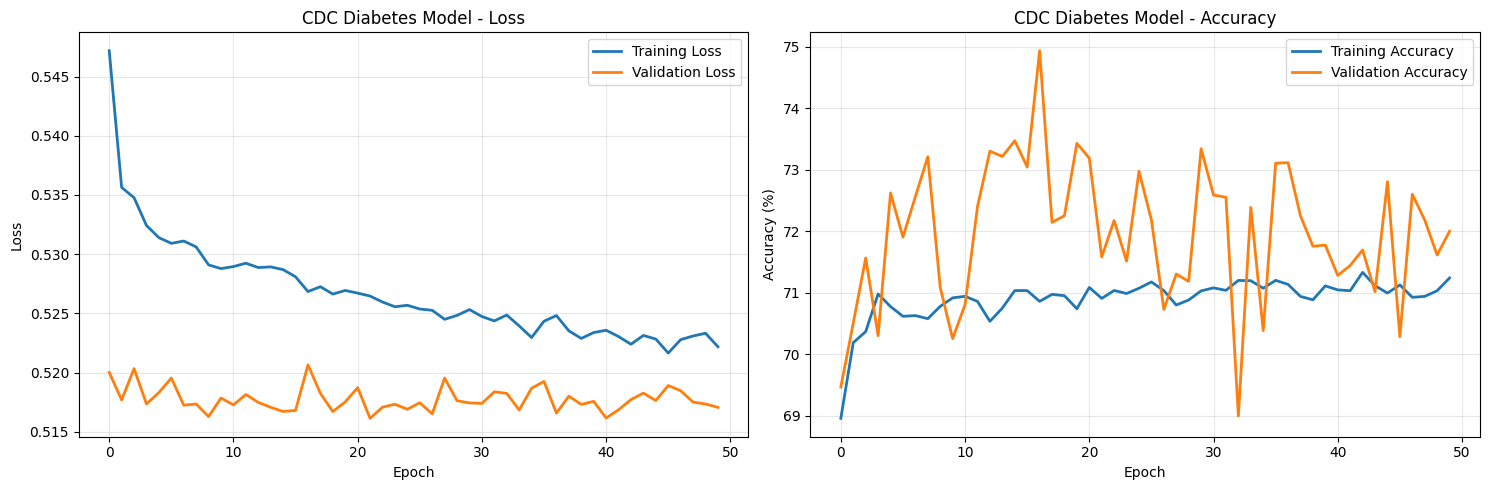

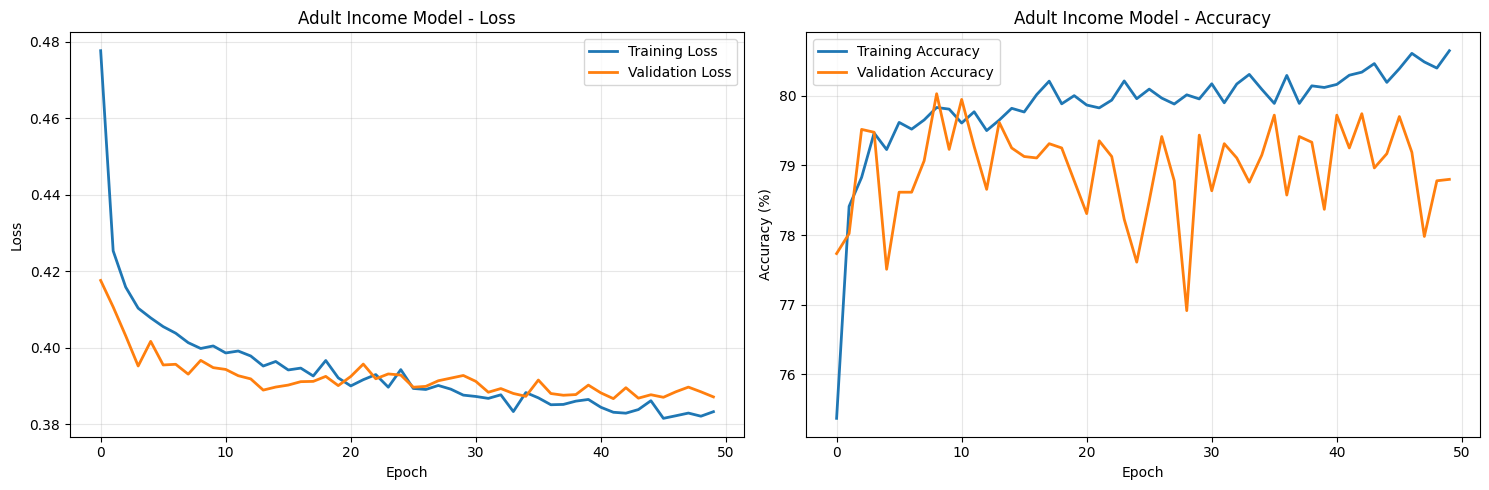

In [35]:
# Plot training history
def plot_training_history(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss plot
    ax1.plot(history['train_loss'], label='Training Loss', linewidth=2)
    ax1.plot(history['val_loss'], label='Validation Loss', linewidth=2)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.set_title(f'{title} - Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Accuracy plot
    ax2.plot(history['train_acc'], label='Training Accuracy', linewidth=2)
    ax2.plot(history['val_acc'], label='Validation Accuracy', linewidth=2)
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title(f'{title} - Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Plot both models
plot_training_history(history_diabetes, 'CDC Diabetes Model')
plot_training_history(history_adult, 'Adult Income Model')

## Model Evaluation

Evaluate the trained models on test data.

In [36]:
# Evaluation function
def evaluate_model(model, test_loader, device='cpu'):
    model.eval()
    model = model.to(device)
    
    all_predictions = []
    all_labels = []
    all_probabilities = []
    
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            outputs = model(batch_X)
            probabilities = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(outputs.data, 1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(batch_y.cpu().numpy())
            all_probabilities.extend(probabilities.cpu().numpy())
    
    return np.array(all_predictions), np.array(all_labels), np.array(all_probabilities)

# Evaluate both models on test sets
print("EVALUATING MODELS ON TEST SETS")

print("\nCDC Diabetes Model:")
predictions_diabetes, labels_diabetes, probs_diabetes = evaluate_model(
    model_diabetes_trained, test_loader_diabetes, device
)

print("\nAdult Income Model:")
predictions_adult, labels_adult, probs_adult = evaluate_model(
    model_adult_trained, test_loader_adult, device
)

print("\nEvaluation complete!")

EVALUATING MODELS ON TEST SETS

CDC Diabetes Model:

Adult Income Model:

Evaluation complete!

Adult Income Model:

Evaluation complete!


In [37]:
# Calculate comprehensive metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    
    print(f"\n{dataset_name} - Test Set Metrics:")
    print(f"   Accuracy:  {accuracy*100:.2f}%")
    print(f"   Precision: {precision*100:.2f}%")
    print(f"   Recall:    {recall*100:.2f}%")
    print(f"   F1-Score:  {f1*100:.2f}%")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# Calculate metrics for both models
metrics_diabetes = calculate_metrics(labels_diabetes, predictions_diabetes, "CDC Diabetes")
metrics_adult = calculate_metrics(labels_adult, predictions_adult, "Adult Income")


CDC Diabetes - Test Set Metrics:
   Accuracy:  71.69%
   Precision: 32.34%
   Recall:    77.93%
   F1-Score:  45.71%

Adult Income - Test Set Metrics:
   Accuracy:  79.68%
   Precision: 54.74%
   Recall:    87.21%
   F1-Score:  67.26%


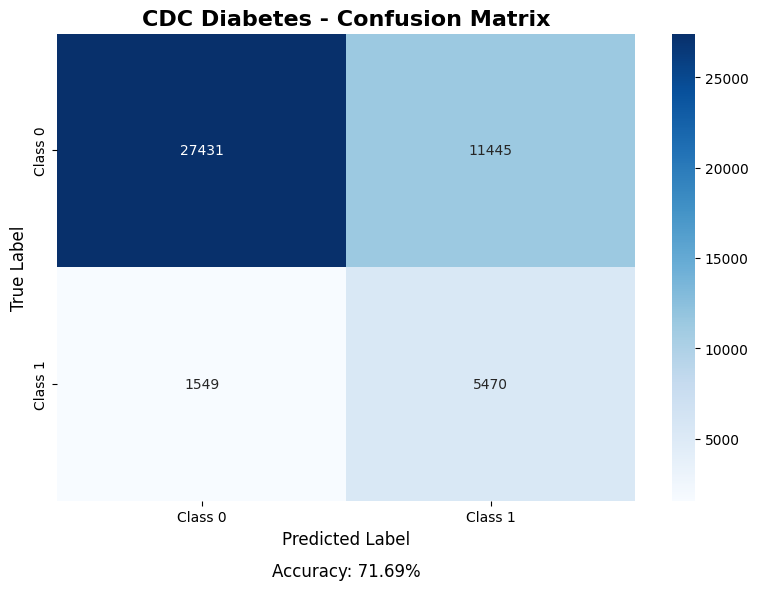


CDC Diabetes - Detailed Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.71      0.81     38876
     Class 1       0.32      0.78      0.46      7019

    accuracy                           0.72     45895
   macro avg       0.63      0.74      0.63     45895
weighted avg       0.85      0.72      0.75     45895



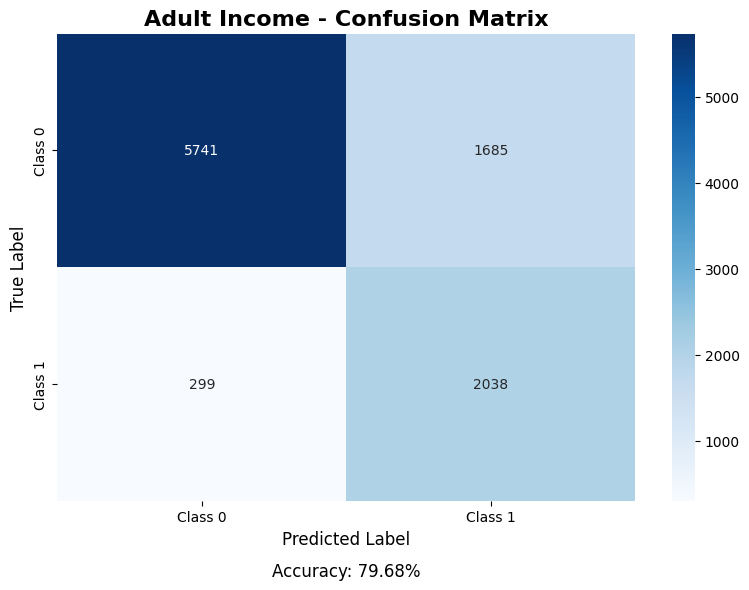


Adult Income - Detailed Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.77      0.85      7426
     Class 1       0.55      0.87      0.67      2337

    accuracy                           0.80      9763
   macro avg       0.75      0.82      0.76      9763
weighted avg       0.85      0.80      0.81      9763



In [38]:
from sklearn.metrics import confusion_matrix, classification_report

# Plot confusion matrices
def plot_confusion_matrix(y_true, y_pred, dataset_name):
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                xticklabels=['Class 0', 'Class 1'],
                yticklabels=['Class 0', 'Class 1'])
    plt.title(f'{dataset_name} - Confusion Matrix', fontsize=16, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    
    # Add text annotations
    total = cm.sum()
    accuracy = (cm[0,0] + cm[1,1]) / total
    plt.text(0.5, -0.15, f'Accuracy: {accuracy*100:.2f}%', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Print classification report
    print(f"\n{dataset_name} - Detailed Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1']))

# Plot confusion matrices for both models
plot_confusion_matrix(labels_diabetes, predictions_diabetes, "CDC Diabetes")
plot_confusion_matrix(labels_adult, predictions_adult, "Adult Income")

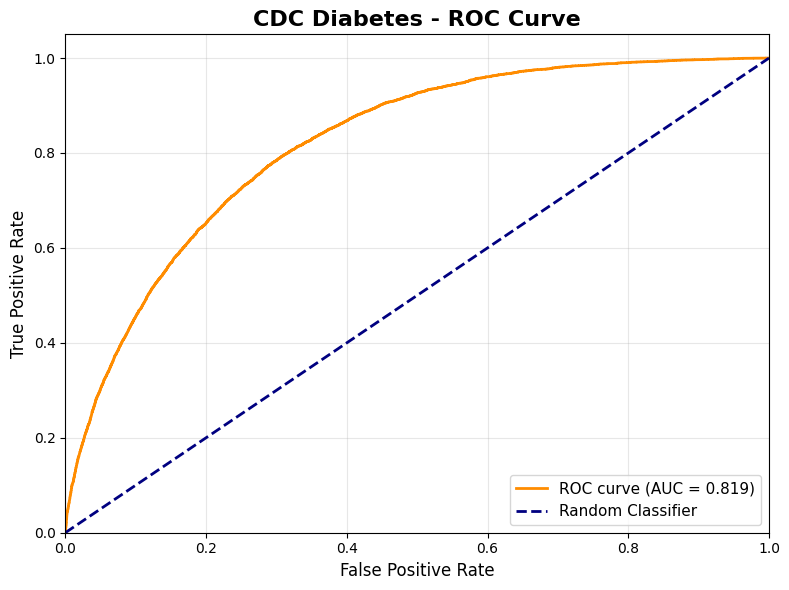


CDC Diabetes - AUC Score: 0.8190


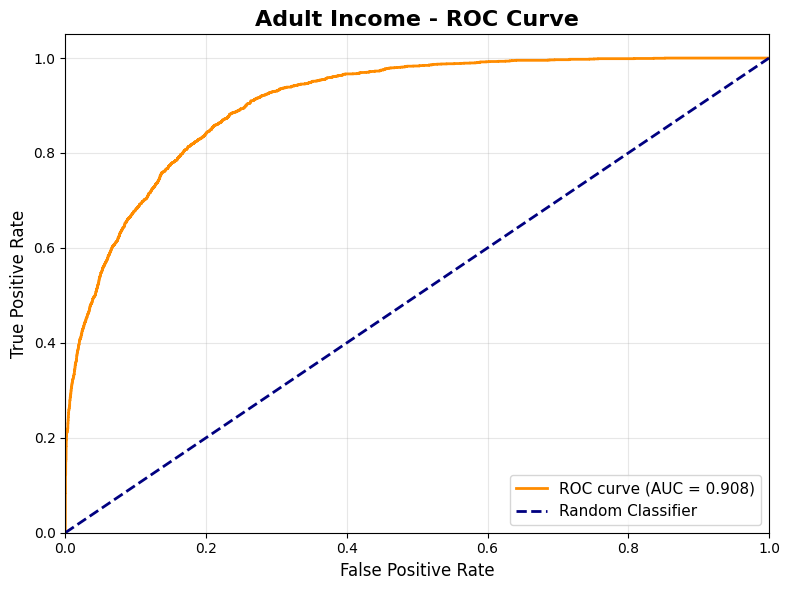


Adult Income - AUC Score: 0.9078


In [39]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Plot ROC curves
def plot_roc_curve(y_true, y_probs, dataset_name):
    # Get probabilities for positive class
    y_probs_pos = y_probs[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_probs_pos)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'{dataset_name} - ROC Curve', fontsize=16, fontweight='bold')
    plt.legend(loc="lower right", fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\n{dataset_name} - AUC Score: {roc_auc:.4f}")
    return roc_auc

# Plot ROC curves for both models
auc_diabetes = plot_roc_curve(labels_diabetes, probs_diabetes, "CDC Diabetes")
auc_adult = plot_roc_curve(labels_adult, probs_adult, "Adult Income")

In [40]:
# Create comprehensive comparison
def create_model_comparison():
    comparison_df = pd.DataFrame({
        'Dataset': ['CDC Diabetes', 'Adult Income'],
        'Accuracy (%)': [metrics_diabetes['accuracy']*100, metrics_adult['accuracy']*100],
        'Precision (%)': [metrics_diabetes['precision']*100, metrics_adult['precision']*100],
        'Recall (%)': [metrics_diabetes['recall']*100, metrics_adult['recall']*100],
        'F1-Score (%)': [metrics_diabetes['f1']*100, metrics_adult['f1']*100],
        'AUC': [auc_diabetes, auc_adult],
        'Train Samples': [diabetes_preprocessed['n_samples_train'], 
                          adult_preprocessed['n_samples_train']],
        'Test Samples': [diabetes_preprocessed['n_samples_test'], 
                         adult_preprocessed['n_samples_test']],
        'Features': [diabetes_preprocessed['n_features'], 
                     adult_preprocessed['n_features']]
    })
    
    print("FINAL MODEL COMPARISON")
    print(comparison_df.to_string(index=False))
    
    return comparison_df

comparison_results = create_model_comparison()

FINAL MODEL COMPARISON
     Dataset  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)      AUC  Train Samples  Test Samples  Features
CDC Diabetes     71.687548      32.338161   77.931329     45.709033 0.818987         160631         45895        21
Adult Income     79.678378      54.740800   87.205819     67.260726 0.907795          34168          9763        14


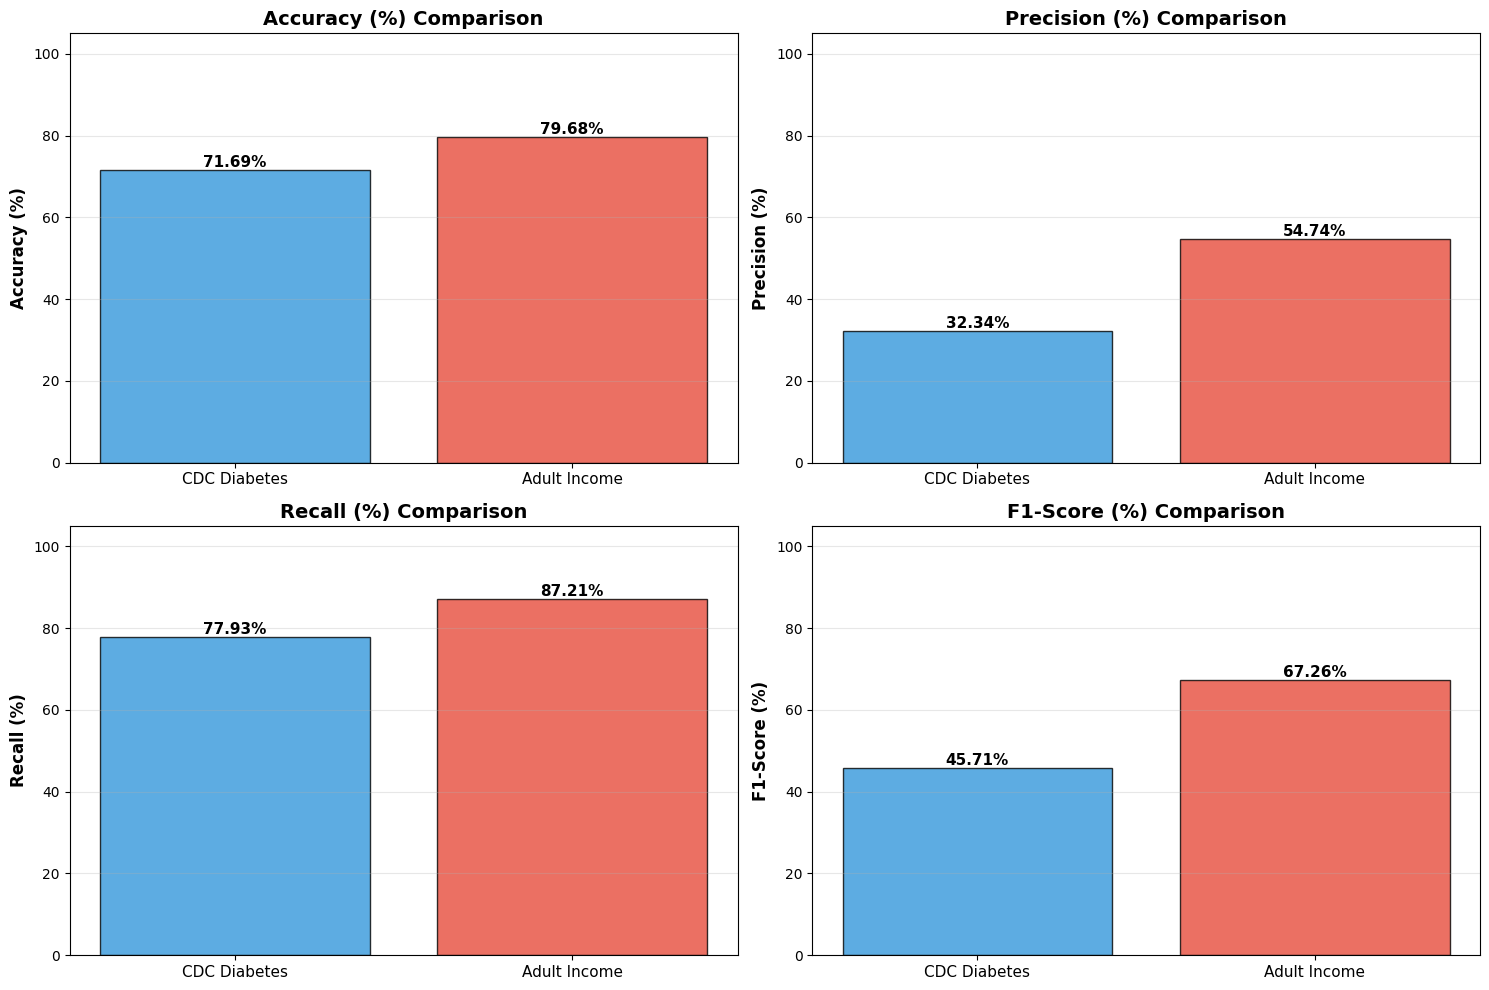

In [41]:
# Bar chart comparison of metrics
def plot_metrics_comparison(comparison_df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    metrics = ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)']
    colors = ['#3498db', '#e74c3c']
    
    for idx, metric in enumerate(metrics):
        ax = axes[idx // 2, idx % 2]
        x = np.arange(len(comparison_df))
        bars = ax.bar(x, comparison_df[metric], color=colors, alpha=0.8, edgecolor='black')
        
        ax.set_ylabel(metric, fontsize=12, fontweight='bold')
        ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
        ax.set_xticks(x)
        ax.set_xticklabels(comparison_df['Dataset'], fontsize=11)
        ax.set_ylim([0, 105])
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for i, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.2f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

plot_metrics_comparison(comparison_results)

In [42]:
# Save trained models
def save_model(model, filepath, dataset_info):
    torch.save({
        'model_state_dict': model.state_dict(),
        'dataset_info': dataset_info
    }, filepath)
    print(f"Model saved to: {filepath}")

# Save both models
save_model(model_diabetes_trained, 'model_diabetes.pth', {
    'dataset': 'CDC Diabetes',
    'features': diabetes_preprocessed['n_features'],
    'metrics': metrics_diabetes
})

save_model(model_adult_trained, 'model_adult.pth', {
    'dataset': 'Adult Income',
    'features': adult_preprocessed['n_features'],
    'metrics': metrics_adult
})

print("\nBoth models saved successfully!")
print("\nTo load a model later, use:")
print("checkpoint = torch.load('model_diabetes.pth')")
print("model.load_state_dict(checkpoint['model_state_dict'])")

Model saved to: model_diabetes.pth
Model saved to: model_adult.pth

Both models saved successfully!

To load a model later, use:
checkpoint = torch.load('model_diabetes.pth')
model.load_state_dict(checkpoint['model_state_dict'])


In [43]:
print("\nSummary:")
print(f"\n1. CDC DIABETES MODEL:")
print(f"   ✓ Training samples: {diabetes_preprocessed['n_samples_train']:,}")
print(f"   ✓ Test Accuracy: {metrics_diabetes['accuracy']*100:.2f}%")
print(f"   ✓ F1-Score: {metrics_diabetes['f1']*100:.2f}%")
print(f"   ✓ AUC: {auc_diabetes:.4f}")

print(f"\n2. ADULT INCOME MODEL:")
print(f"   ✓ Training samples: {adult_preprocessed['n_samples_train']:,}")
print(f"   ✓ Test Accuracy: {metrics_adult['accuracy']*100:.2f}%")
print(f"   ✓ F1-Score: {metrics_adult['f1']*100:.2f}%")
print(f"   ✓ AUC: {auc_adult:.4f}")



Summary:

1. CDC DIABETES MODEL:
   ✓ Training samples: 160,631
   ✓ Test Accuracy: 71.69%
   ✓ F1-Score: 45.71%
   ✓ AUC: 0.8190

2. ADULT INCOME MODEL:
   ✓ Training samples: 34,168
   ✓ Test Accuracy: 79.68%
   ✓ F1-Score: 67.26%
   ✓ AUC: 0.9078


Privacy Preservation

In [44]:
# Import Opacus for Differential Privacy
from opacus import PrivacyEngine
from opacus.validators import ModuleValidator
from opacus.accountants.rdp import RDPAccountant
from opacus.utils.batch_memory_manager import BatchMemoryManager

print("Opacus imported successfully for Differential Privacy")

Opacus imported successfully for Differential Privacy


In [45]:
# Opacus-compatible FNN (replaces BatchNorm with GroupNorm)
class FeedforwardNN_DP(nn.Module):
    """Differential Privacy compatible FNN using GroupNorm instead of BatchNorm"""
    def __init__(self, input_size, hidden_sizes, output_size=2, dropout_rate=0.3):
        super(FeedforwardNN_DP, self).__init__()
        
        layers = []
        prev_size = input_size
        
        # Create hidden layers with GroupNorm (Opacus compatible)
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(prev_size, hidden_size))
            layers.append(nn.ReLU())
            # Use GroupNorm instead of BatchNorm for DP compatibility
            num_groups = min(32, hidden_size)  # Ensure num_groups divides hidden_size
            while hidden_size % num_groups != 0:
                num_groups -= 1
            layers.append(nn.GroupNorm(num_groups, hidden_size))
            layers.append(nn.Dropout(dropout_rate))
            prev_size = hidden_size
        
        # Output layer
        layers.append(nn.Linear(prev_size, output_size))
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

# Test DP-compatible model
print("Testing DP-compatible model architecture...")
test_model_dp = FeedforwardNN_DP(input_size_diabetes, [128, 64, 32], output_size=2)

# Validate with Opacus
errors = ModuleValidator.validate(test_model_dp, strict=False)
if errors:
    print(f"⚠️ Validation warnings: {errors}")
    test_model_dp = ModuleValidator.fix(test_model_dp)
    print("✓ Model automatically fixed for Opacus compatibility")
else:
    print("✓ Model is compatible with Opacus")

print(f"\nDP-Compatible Model Summary:")
print(f"  Total parameters: {sum(p.numel() for p in test_model_dp.parameters()):,}")
print(test_model_dp)

Testing DP-compatible model architecture...
✓ Model is compatible with Opacus

DP-Compatible Model Summary:
  Total parameters: 13,666
FeedforwardNN_DP(
  (network): Sequential(
    (0): Linear(in_features=21, out_features=128, bias=True)
    (1): ReLU()
    (2): GroupNorm(32, 128, eps=1e-05, affine=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): GroupNorm(32, 64, eps=1e-05, affine=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): ReLU()
    (10): GroupNorm(32, 32, eps=1e-05, affine=True)
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=32, out_features=2, bias=True)
  )
)


In [46]:
# Differential Privacy Training Function
def train_model_with_dp(model, train_loader, val_loader, class_weights,
                        target_epsilon=3.0, delta=1e-5, max_grad_norm=1.0,
                        epochs=50, learning_rate=0.001, device='cpu'):
    """
    Train model with Differential Privacy using DP-SGD (Opacus).
    
    Args:
        model: PyTorch model (must be DP-compatible)
        train_loader: Training DataLoader
        val_loader: Validation DataLoader
        class_weights: Dictionary of class weights
        target_epsilon: Target privacy budget
        delta: Privacy parameter (typically 1/n²)
        max_grad_norm: Maximum gradient norm for clipping
        epochs: Number of training epochs
        learning_rate: Learning rate
        device: Device to train on
    
    Returns:
        model: Trained model
        history: Training history with privacy budget tracking
        privacy_engine: PrivacyEngine instance
    """
    model = model.to(device)
    
    # Setup optimizer
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Setup criterion with class weights
    weight_tensor = torch.FloatTensor([class_weights[0], class_weights[1]]).to(device)
    criterion = nn.CrossEntropyLoss(weight=weight_tensor)
    
    # Make model private with Opacus
    privacy_engine = PrivacyEngine()
    
    model, optimizer, train_loader = privacy_engine.make_private_with_epsilon(
        module=model,
        optimizer=optimizer,
        data_loader=train_loader,
        epochs=epochs,
        target_epsilon=target_epsilon,
        target_delta=delta,
        max_grad_norm=max_grad_norm,
    )
    
    print(f"\n🔒 DP-SGD Training Started")
    print(f"  Target ε: {target_epsilon}")
    print(f"  δ: {delta}")
    print(f"  Noise Multiplier: {optimizer.noise_multiplier:.4f}")
    print(f"  Max Grad Norm: {max_grad_norm}\n")
    
    # Training history
    history = {
        'train_loss': [],
        'val_loss': [],
        'train_acc': [],
        'val_acc': [],
        'epsilon_spent': []
    }
    
    for epoch in range(epochs):
        # Training phase with DP
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()  # DP noise added automatically here
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += batch_y.size(0)
            train_correct += (predicted == batch_y).sum().item()
        
        # Get current privacy budget spent
        epsilon = privacy_engine.get_epsilon(delta)
        
        # Validation phase (no DP)
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += batch_y.size(0)
                val_correct += (predicted == batch_y).sum().item()
        
        # Calculate metrics
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        train_acc = 100 * train_correct / train_total
        val_acc = 100 * val_correct / val_total
        
        # Store history
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)
        history['epsilon_spent'].append(epsilon)
        
        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] - "
                  f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
                  f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}% | "
                  f"ε spent: {epsilon:.2f}")
        
        # Early stopping if privacy budget exceeded
        if epsilon > target_epsilon * 1.1:  # 10% buffer
            print(f"\n⚠️ Privacy budget exceeded at epoch {epoch+1}!")
            print(f"   ε spent: {epsilon:.2f} > target: {target_epsilon}")
            break
    
    final_epsilon = privacy_engine.get_epsilon(delta)
    print(f"\n✓ DP Training Complete!")
    print(f"  Final ε spent: {final_epsilon:.4f}")
    print(f"  δ: {delta}")
    
    return model, history, privacy_engine

In [47]:
# Compare different epsilon budgets
def compare_epsilon_budgets(train_loader, val_loader, test_loader,
                           class_weights, input_size, hidden_sizes,
                           epsilon_values=[0.5, 1.0, 3.0, 10.0],
                           epochs=30, device='cpu', dataset_name='Dataset'):
    """
    Train multiple models with different epsilon budgets and compare results.
    """
    results = []
    models_dict = {}
    histories_dict = {}
    
    print(f"\n{'='*70}")
    print(f"EPSILON BUDGET COMPARISON - {dataset_name}")
    print(f"{'='*70}")
    
    for epsilon in epsilon_values:
        print(f"\n🔒 Training with ε = {epsilon}")
        print(f"-" * 50)
        
        # Create fresh DP-compatible model
        model = FeedforwardNN_DP(input_size, hidden_sizes, output_size=2, dropout_rate=0.3)
        
        # Train with DP
        delta = 1e-5
        model_trained, history, privacy_engine = train_model_with_dp(
            model, train_loader, val_loader, class_weights,
            target_epsilon=epsilon,
            delta=delta,
            max_grad_norm=1.0,
            epochs=epochs,
            learning_rate=0.001,
            device=device
        )
        
        # Evaluate on test set
        predictions, labels, probs = evaluate_model(model_trained, test_loader, device)
        
        # Calculate metrics
        from sklearn.metrics import roc_auc_score
        accuracy = accuracy_score(labels, predictions)
        f1 = f1_score(labels, predictions)
        precision = precision_score(labels, predictions)
        recall = recall_score(labels, predictions)
        auc_score = roc_auc_score(labels, probs[:, 1])
        
        final_epsilon = privacy_engine.get_epsilon(delta)
        
        # Store results
        results.append({
            'epsilon_target': epsilon,
            'epsilon_final': final_epsilon,
            'delta': delta,
            'accuracy': accuracy * 100,
            'f1_score': f1 * 100,
            'precision': precision * 100,
            'recall': recall * 100,
            'auc': auc_score,
            'final_val_acc': history['val_acc'][-1]
        })
        
        models_dict[f'epsilon_{epsilon}'] = model_trained
        histories_dict[f'epsilon_{epsilon}'] = history
    
    results_df = pd.DataFrame(results)
    
    print(f"\n{'='*70}")
    print(f"RESULTS SUMMARY - {dataset_name}")
    print(f"{'='*70}")
    print(results_df.to_string(index=False))
    
    return results_df, models_dict, histories_dict

In [48]:
# Visualize privacy-utility tradeoff
def plot_privacy_utility_tradeoff(results_df, dataset_name):
    """Visualize privacy-utility tradeoff across different epsilon values"""
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Epsilon vs Accuracy
    ax1 = axes[0, 0]
    ax1.plot(results_df['epsilon_target'], results_df['accuracy'], 
             marker='o', linewidth=2, markersize=10, color='#2ecc71')
    ax1.set_xlabel('Privacy Budget (ε)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    ax1.set_title('Privacy-Utility Tradeoff: Accuracy vs ε', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)
    ax1.set_xscale('log')
    
    for idx, row in results_df.iterrows():
        ax1.annotate(f"{row['accuracy']:.1f}%", 
                    (row['epsilon_target'], row['accuracy']),
                    textcoords="offset points", xytext=(0,10), ha='center')
    
    # Plot 2: Epsilon vs F1-Score
    ax2 = axes[0, 1]
    ax2.plot(results_df['epsilon_target'], results_df['f1_score'], 
             marker='s', linewidth=2, markersize=10, color='#3498db')
    ax2.set_xlabel('Privacy Budget (ε)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('F1-Score (%)', fontsize=12, fontweight='bold')
    ax2.set_title('Privacy-Utility Tradeoff: F1-Score vs ε', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3)
    ax2.set_xscale('log')
    
    # Plot 3: Multi-metric comparison
    ax3 = axes[1, 0]
    x = np.arange(len(results_df))
    width = 0.2
    
    ax3.bar(x - width*1.5, results_df['accuracy'], width, label='Accuracy', alpha=0.8)
    ax3.bar(x - width*0.5, results_df['f1_score'], width, label='F1-Score', alpha=0.8)
    ax3.bar(x + width*0.5, results_df['precision'], width, label='Precision', alpha=0.8)
    ax3.bar(x + width*1.5, results_df['recall'], width, label='Recall', alpha=0.8)
    
    ax3.set_xlabel('Privacy Budget (ε)', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Metric Value (%)', fontsize=12, fontweight='bold')
    ax3.set_title('All Metrics Comparison', fontsize=14, fontweight='bold')
    ax3.set_xticks(x)
    ax3.set_xticklabels([f'ε={e}' for e in results_df['epsilon_target']])
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    
    # Plot 4: Privacy Budget Consumption
    ax4 = axes[1, 1]
    bars = ax4.bar(range(len(results_df)), results_df['epsilon_final'], 
                   color='#e74c3c', alpha=0.7, edgecolor='black')
    target_line = ax4.plot(range(len(results_df)), results_df['epsilon_target'], 
                          color='green', linestyle='--', linewidth=2, 
                          marker='x', markersize=8, label='Target ε')[0]
    ax4.set_xlabel('Experiment', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Epsilon (ε)', fontsize=12, fontweight='bold')
    ax4.set_title('Privacy Budget: Target vs Actual', fontsize=14, fontweight='bold')
    ax4.set_xticks(range(len(results_df)))
    ax4.set_xticklabels([f'ε={e}' for e in results_df['epsilon_target']])
    ax4.legend()
    ax4.grid(True, alpha=0.3, axis='y')
    
    plt.suptitle(f'{dataset_name} - Differential Privacy Analysis', 
                 fontsize=16, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

Starting Differential Privacy experiments for CDC Diabetes dataset...

EPSILON BUDGET COMPARISON - CDC Diabetes

🔒 Training with ε = 0.5
--------------------------------------------------


12/09/2025 00:10:55:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 0.5
  δ: 1e-05
  Noise Multiplier: 1.0352
  Max Grad Norm: 1.0

Epoch [10/30] - Train Loss: 1.2148, Train Acc: 84.68% | Val Loss: 1.1781, Val Acc: 84.70% | ε spent: 0.28
Epoch [10/30] - Train Loss: 1.2148, Train Acc: 84.68% | Val Loss: 1.1781, Val Acc: 84.70% | ε spent: 0.28
Epoch [20/30] - Train Loss: 1.2542, Train Acc: 84.64% | Val Loss: 1.3045, Val Acc: 84.70% | ε spent: 0.40
Epoch [20/30] - Train Loss: 1.2542, Train Acc: 84.64% | Val Loss: 1.3045, Val Acc: 84.70% | ε spent: 0.40
Epoch [30/30] - Train Loss: 1.3142, Train Acc: 84.75% | Val Loss: 1.3171, Val Acc: 84.70% | ε spent: 0.49
Epoch [30/30] - Train Loss: 1.3142, Train Acc: 84.75% | Val Loss: 1.3171, Val Acc: 84.70% | ε spent: 0.49

✓ DP Training Complete!
  Final ε spent: 0.4916
  δ: 1e-05

✓ DP Training Complete!
  Final ε spent: 0.4916
  δ: 1e-05

🔒 Training with ε = 1.0
--------------------------------------------------

🔒 Training with ε = 1.0
----------------------------------------

12/09/2025 00:24:23:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 1.0
  δ: 1e-05
  Noise Multiplier: 0.7373
  Max Grad Norm: 1.0

Epoch [10/30] - Train Loss: 1.1491, Train Acc: 84.53% | Val Loss: 1.1749, Val Acc: 84.70% | ε spent: 0.58
Epoch [10/30] - Train Loss: 1.1491, Train Acc: 84.53% | Val Loss: 1.1749, Val Acc: 84.70% | ε spent: 0.58
Epoch [20/30] - Train Loss: 1.1307, Train Acc: 84.77% | Val Loss: 1.1344, Val Acc: 84.70% | ε spent: 0.81
Epoch [20/30] - Train Loss: 1.1307, Train Acc: 84.77% | Val Loss: 1.1344, Val Acc: 84.70% | ε spent: 0.81
Epoch [30/30] - Train Loss: 1.1995, Train Acc: 84.67% | Val Loss: 1.1676, Val Acc: 84.70% | ε spent: 0.99
Epoch [30/30] - Train Loss: 1.1995, Train Acc: 84.67% | Val Loss: 1.1676, Val Acc: 84.70% | ε spent: 0.99

✓ DP Training Complete!
  Final ε spent: 0.9947
  δ: 1e-05

✓ DP Training Complete!
  Final ε spent: 0.9947
  δ: 1e-05

🔒 Training with ε = 3.0
--------------------------------------------------

🔒 Training with ε = 3.0
----------------------------------------

12/09/2025 00:38:22:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 3.0
  δ: 1e-05
  Noise Multiplier: 0.5585
  Max Grad Norm: 1.0

Epoch [10/30] - Train Loss: 1.2033, Train Acc: 84.74% | Val Loss: 1.2431, Val Acc: 84.70% | ε spent: 2.19
Epoch [10/30] - Train Loss: 1.2033, Train Acc: 84.74% | Val Loss: 1.2431, Val Acc: 84.70% | ε spent: 2.19
Epoch [20/30] - Train Loss: 1.2495, Train Acc: 84.62% | Val Loss: 1.2623, Val Acc: 84.70% | ε spent: 2.64
Epoch [20/30] - Train Loss: 1.2495, Train Acc: 84.62% | Val Loss: 1.2623, Val Acc: 84.70% | ε spent: 2.64
Epoch [30/30] - Train Loss: 1.2291, Train Acc: 84.83% | Val Loss: 1.2536, Val Acc: 84.70% | ε spent: 2.99
Epoch [30/30] - Train Loss: 1.2291, Train Acc: 84.83% | Val Loss: 1.2536, Val Acc: 84.70% | ε spent: 2.99

✓ DP Training Complete!
  Final ε spent: 2.9903
  δ: 1e-05

✓ DP Training Complete!
  Final ε spent: 2.9903
  δ: 1e-05

🔒 Training with ε = 10.0
--------------------------------------------------

🔒 Training with ε = 10.0
--------------------------------------

12/09/2025 00:52:49:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 10.0
  δ: 1e-05
  Noise Multiplier: 0.4299
  Max Grad Norm: 1.0

Epoch [10/30] - Train Loss: 1.1434, Train Acc: 84.75% | Val Loss: 1.0818, Val Acc: 84.70% | ε spent: 6.99
Epoch [10/30] - Train Loss: 1.1434, Train Acc: 84.75% | Val Loss: 1.0818, Val Acc: 84.70% | ε spent: 6.99
Epoch [20/30] - Train Loss: 1.1634, Train Acc: 84.86% | Val Loss: 1.1702, Val Acc: 84.70% | ε spent: 8.64
Epoch [20/30] - Train Loss: 1.1634, Train Acc: 84.86% | Val Loss: 1.1702, Val Acc: 84.70% | ε spent: 8.64
Epoch [30/30] - Train Loss: 1.1381, Train Acc: 84.72% | Val Loss: 1.1184, Val Acc: 84.70% | ε spent: 10.00
Epoch [30/30] - Train Loss: 1.1381, Train Acc: 84.72% | Val Loss: 1.1184, Val Acc: 84.70% | ε spent: 10.00

✓ DP Training Complete!
  Final ε spent: 9.9964
  δ: 1e-05

✓ DP Training Complete!
  Final ε spent: 9.9964
  δ: 1e-05

RESULTS SUMMARY - CDC Diabetes
 epsilon_target  epsilon_final   delta  accuracy  f1_score  precision  recall      auc  final_val_acc
    

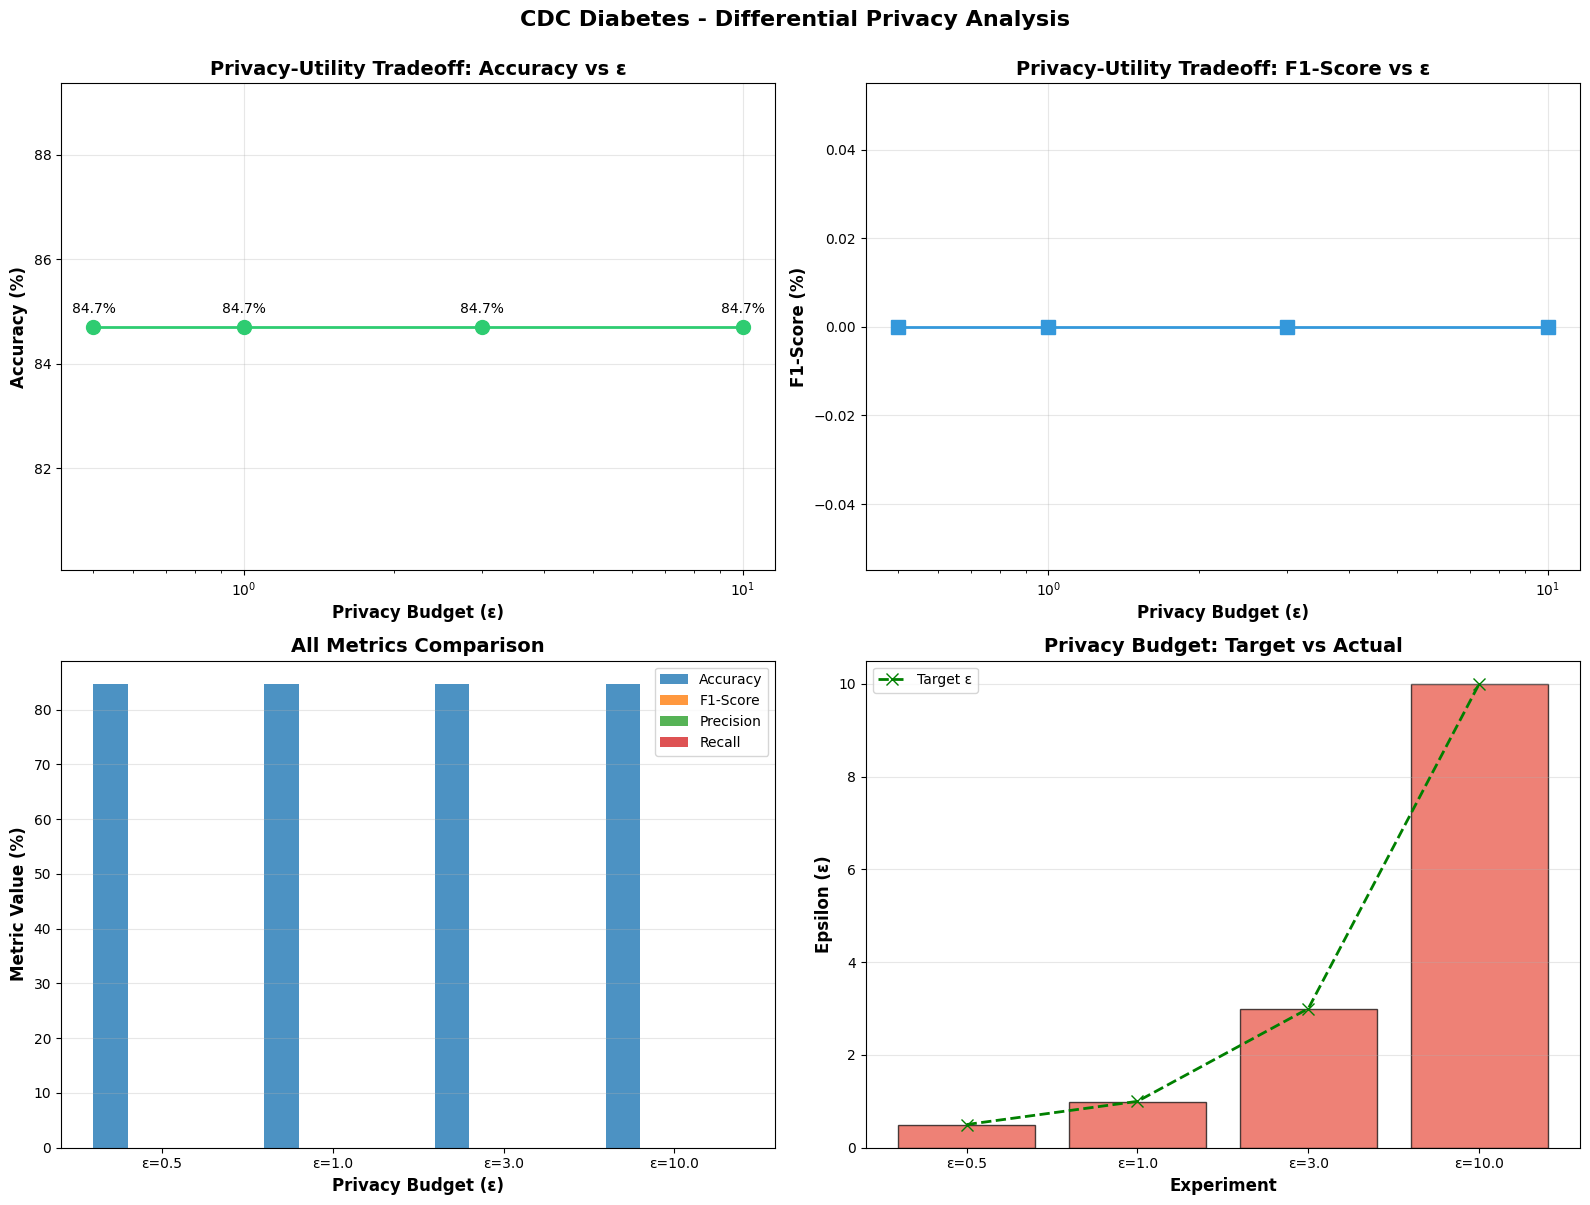

In [49]:
# Run DP experiments for CDC Diabetes
print("Starting Differential Privacy experiments for CDC Diabetes dataset...")
dp_results_diabetes, dp_models_diabetes, dp_histories_diabetes = compare_epsilon_budgets(
    train_loader_diabetes, 
    val_loader_diabetes, 
    test_loader_diabetes,
    class_weights_diabetes,
    input_size_diabetes,
    [128, 64, 32],
    epsilon_values=[0.5, 1.0, 3.0, 10.0],
    epochs=30,
    device=device,
    dataset_name='CDC Diabetes'
)

# Visualize results
plot_privacy_utility_tradeoff(dp_results_diabetes, 'CDC Diabetes')

Starting Differential Privacy experiments for Adult Income dataset...

EPSILON BUDGET COMPARISON - Adult Income

🔒 Training with ε = 0.5
--------------------------------------------------


12/09/2025 01:06:55:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 0.5
  δ: 1e-05
  Noise Multiplier: 1.8750
  Max Grad Norm: 1.0

Epoch [10/30] - Train Loss: 0.9044, Train Acc: 76.28% | Val Loss: 0.8962, Val Acc: 76.05% | ε spent: 0.28
Epoch [10/30] - Train Loss: 0.9044, Train Acc: 76.28% | Val Loss: 0.8962, Val Acc: 76.05% | ε spent: 0.28
Epoch [20/30] - Train Loss: 0.9168, Train Acc: 76.00% | Val Loss: 0.9070, Val Acc: 76.05% | ε spent: 0.40
Epoch [20/30] - Train Loss: 0.9168, Train Acc: 76.00% | Val Loss: 0.9070, Val Acc: 76.05% | ε spent: 0.40
Epoch [30/30] - Train Loss: 0.9305, Train Acc: 76.18% | Val Loss: 0.9132, Val Acc: 76.05% | ε spent: 0.49
Epoch [30/30] - Train Loss: 0.9305, Train Acc: 76.18% | Val Loss: 0.9132, Val Acc: 76.05% | ε spent: 0.49

✓ DP Training Complete!
  Final ε spent: 0.4909
  δ: 1e-05

✓ DP Training Complete!
  Final ε spent: 0.4909
  δ: 1e-05

🔒 Training with ε = 1.0
--------------------------------------------------

🔒 Training with ε = 1.0
----------------------------------------

12/09/2025 01:09:35:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 1.0
  δ: 1e-05
  Noise Multiplier: 1.1279
  Max Grad Norm: 1.0

Epoch [10/30] - Train Loss: 0.9263, Train Acc: 75.91% | Val Loss: 0.9377, Val Acc: 76.05% | ε spent: 0.56
Epoch [10/30] - Train Loss: 0.9263, Train Acc: 75.91% | Val Loss: 0.9377, Val Acc: 76.05% | ε spent: 0.56
Epoch [20/30] - Train Loss: 0.9319, Train Acc: 75.99% | Val Loss: 0.9067, Val Acc: 76.05% | ε spent: 0.80
Epoch [20/30] - Train Loss: 0.9319, Train Acc: 75.99% | Val Loss: 0.9067, Val Acc: 76.05% | ε spent: 0.80
Epoch [30/30] - Train Loss: 0.9269, Train Acc: 76.12% | Val Loss: 0.9439, Val Acc: 76.05% | ε spent: 1.00
Epoch [30/30] - Train Loss: 0.9269, Train Acc: 76.12% | Val Loss: 0.9439, Val Acc: 76.05% | ε spent: 1.00

✓ DP Training Complete!
  Final ε spent: 0.9961
  δ: 1e-05

✓ DP Training Complete!
  Final ε spent: 0.9961
  δ: 1e-05

🔒 Training with ε = 3.0
--------------------------------------------------

🔒 Training with ε = 3.0
----------------------------------------

12/09/2025 01:12:17:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 3.0
  δ: 1e-05
  Noise Multiplier: 0.6915
  Max Grad Norm: 1.0

Epoch [10/30] - Train Loss: 0.9937, Train Acc: 75.93% | Val Loss: 1.0148, Val Acc: 76.05% | ε spent: 1.92
Epoch [10/30] - Train Loss: 0.9937, Train Acc: 75.93% | Val Loss: 1.0148, Val Acc: 76.05% | ε spent: 1.92
Epoch [20/30] - Train Loss: 0.9874, Train Acc: 75.81% | Val Loss: 0.9803, Val Acc: 76.05% | ε spent: 2.51
Epoch [20/30] - Train Loss: 0.9874, Train Acc: 75.81% | Val Loss: 0.9803, Val Acc: 76.05% | ε spent: 2.51
Epoch [30/30] - Train Loss: 0.9977, Train Acc: 76.30% | Val Loss: 0.9915, Val Acc: 76.05% | ε spent: 3.00
Epoch [30/30] - Train Loss: 0.9977, Train Acc: 76.30% | Val Loss: 0.9915, Val Acc: 76.05% | ε spent: 3.00

✓ DP Training Complete!
  Final ε spent: 2.9961
  δ: 1e-05

✓ DP Training Complete!
  Final ε spent: 2.9961
  δ: 1e-05

🔒 Training with ε = 10.0
--------------------------------------------------

🔒 Training with ε = 10.0
--------------------------------------

12/09/2025 01:15:18:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 10.0
  δ: 1e-05
  Noise Multiplier: 0.5022
  Max Grad Norm: 1.0

Epoch [10/30] - Train Loss: 0.9973, Train Acc: 76.04% | Val Loss: 0.9916, Val Acc: 76.05% | ε spent: 6.63
Epoch [10/30] - Train Loss: 0.9973, Train Acc: 76.04% | Val Loss: 0.9916, Val Acc: 76.05% | ε spent: 6.63
Epoch [20/30] - Train Loss: 0.9674, Train Acc: 75.97% | Val Loss: 0.9512, Val Acc: 76.05% | ε spent: 8.48
Epoch [20/30] - Train Loss: 0.9674, Train Acc: 75.97% | Val Loss: 0.9512, Val Acc: 76.05% | ε spent: 8.48
Epoch [30/30] - Train Loss: 0.9628, Train Acc: 75.97% | Val Loss: 0.9733, Val Acc: 76.05% | ε spent: 10.00
Epoch [30/30] - Train Loss: 0.9628, Train Acc: 75.97% | Val Loss: 0.9733, Val Acc: 76.05% | ε spent: 10.00

✓ DP Training Complete!
  Final ε spent: 9.9983
  δ: 1e-05

✓ DP Training Complete!
  Final ε spent: 9.9983
  δ: 1e-05

RESULTS SUMMARY - Adult Income
 epsilon_target  epsilon_final   delta  accuracy  f1_score  precision  recall      auc  final_val_acc
    

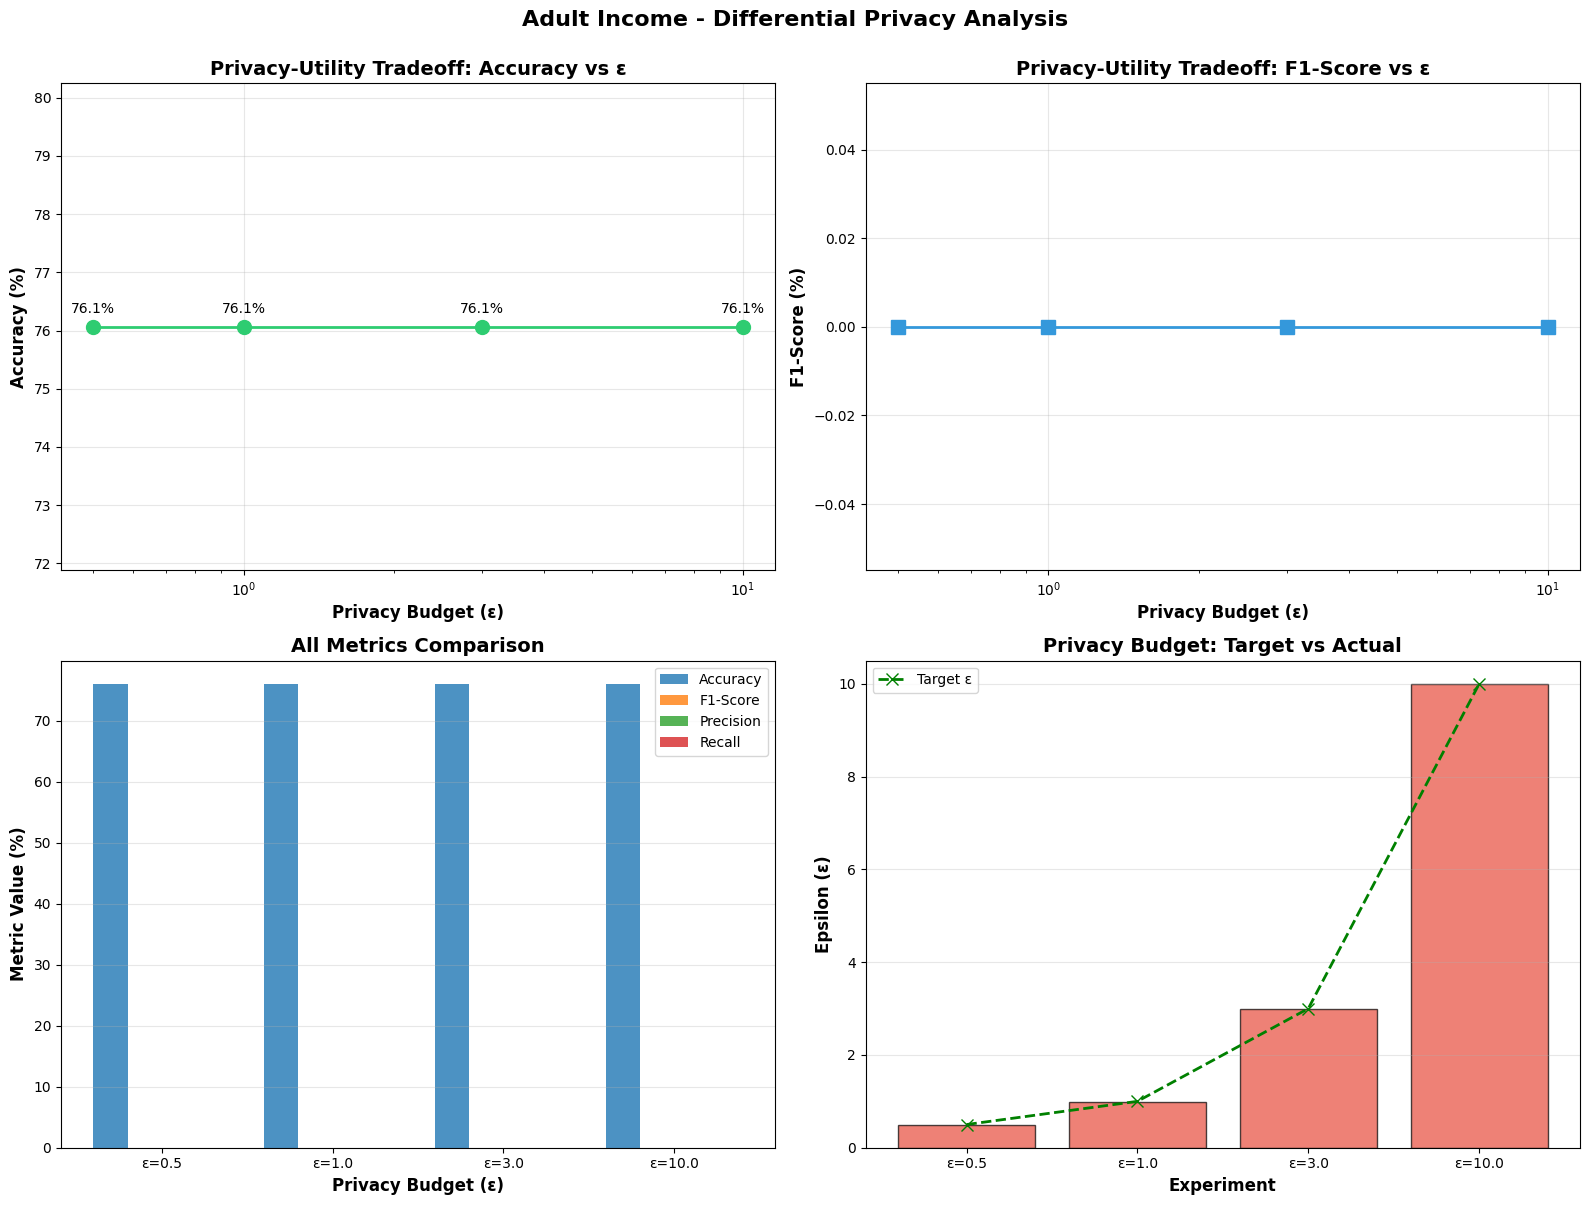

In [50]:
# Run DP experiments for Adult Income
print("Starting Differential Privacy experiments for Adult Income dataset...")
dp_results_adult, dp_models_adult, dp_histories_adult = compare_epsilon_budgets(
    train_loader_adult, 
    val_loader_adult, 
    test_loader_adult,
    class_weights_adult,
    input_size_adult,
    [128, 64, 32],
    epsilon_values=[0.5, 1.0, 3.0, 10.0],
    epochs=30,
    device=device,
    dataset_name='Adult Income'
)

# Visualize results
plot_privacy_utility_tradeoff(dp_results_adult, 'Adult Income')

## Differential Privacy with Logistic Regression

Now we'll implement Differential Privacy for Logistic Regression models using Opacus DP-SGD.

In [51]:
# Logistic Regression Model (Opacus-compatible)
class LogisticRegression_DP(nn.Module):
    """
    Differential Privacy compatible Logistic Regression model.
    Simple linear classifier with sigmoid activation.
    """
    def __init__(self, input_size, output_size=2):
        super(LogisticRegression_DP, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

# Calculate input sizes from scaled data
input_size_diabetes = X_train_diabetes_scaled.shape[1]
input_size_adult = X_train_adult_scaled.shape[1]

# Test DP-compatible logistic regression model
print("Testing DP-compatible Logistic Regression model...")
print(f"\nDataset Input Sizes:")
print(f"  CDC Diabetes: {input_size_diabetes} features")
print(f"  Adult Income: {input_size_adult} features")

test_lr_dp = LogisticRegression_DP(input_size_diabetes, output_size=2)

# Validate with Opacus
errors = ModuleValidator.validate(test_lr_dp, strict=False)
if errors:
    print(f"\n⚠️ Validation warnings: {errors}")
    test_lr_dp = ModuleValidator.fix(test_lr_dp)
    print("✓ Model automatically fixed for Opacus compatibility")
else:
    print("\n✓ Logistic Regression model is compatible with Opacus")

print(f"\nDP-Compatible Logistic Regression Summary:")
print(f"  Total parameters: {sum(p.numel() for p in test_lr_dp.parameters()):,}")
print(test_lr_dp)

Testing DP-compatible Logistic Regression model...

Dataset Input Sizes:
  CDC Diabetes: 21 features
  Adult Income: 14 features

✓ Logistic Regression model is compatible with Opacus

DP-Compatible Logistic Regression Summary:
  Total parameters: 44
LogisticRegression_DP(
  (linear): Linear(in_features=21, out_features=2, bias=True)
)


In [52]:
# Compare different epsilon budgets for Logistic Regression
def compare_epsilon_budgets_lr(train_loader, val_loader, test_loader,
                               class_weights, input_size,
                               epsilon_values=[0.5, 1.0, 3.0, 10.0],
                               epochs=50, device='cpu', dataset_name='Dataset'):
    """
    Train multiple Logistic Regression models with different epsilon budgets and compare results.
    """
    results = []
    models_dict = {}
    histories_dict = {}
    
    print(f"\n{'='*70}")
    print(f"EPSILON BUDGET COMPARISON - LOGISTIC REGRESSION - {dataset_name}")
    print(f"{'='*70}")
    
    for epsilon in epsilon_values:
        print(f"\n🔒 Training Logistic Regression with ε = {epsilon}")
        print(f"-" * 50)
        
        # Create fresh DP-compatible logistic regression model
        model = LogisticRegression_DP(input_size, output_size=2)
        
        # Train with DP
        delta = 1e-5
        model_trained, history, privacy_engine = train_model_with_dp(
            model, train_loader, val_loader, class_weights,
            target_epsilon=epsilon,
            delta=delta,
            max_grad_norm=1.0,
            epochs=epochs,
            learning_rate=0.01,  # Higher LR for simpler model
            device=device
        )
        
        # Evaluate on test set
        predictions, labels, probs = evaluate_model(model_trained, test_loader, device)
        
        # Calculate metrics
        from sklearn.metrics import roc_auc_score
        accuracy = accuracy_score(labels, predictions)
        f1 = f1_score(labels, predictions)
        precision = precision_score(labels, predictions)
        recall = recall_score(labels, predictions)
        auc_score = roc_auc_score(labels, probs[:, 1])
        
        final_epsilon = privacy_engine.get_epsilon(delta)
        
        # Store results
        results.append({
            'epsilon_target': epsilon,
            'epsilon_final': final_epsilon,
            'delta': delta,
            'accuracy': accuracy * 100,
            'f1_score': f1 * 100,
            'precision': precision * 100,
            'recall': recall * 100,
            'auc': auc_score,
            'final_val_acc': history['val_acc'][-1]
        })
        
        models_dict[f'epsilon_{epsilon}'] = model_trained
        histories_dict[f'epsilon_{epsilon}'] = history
    
    results_df = pd.DataFrame(results)
    
    print(f"\n{'='*70}")
    print(f"RESULTS SUMMARY - LOGISTIC REGRESSION - {dataset_name}")
    print(f"{'='*70}")
    print(results_df.to_string(index=False))
    
    return results_df, models_dict, histories_dict

Starting Differential Privacy Logistic Regression experiments for CDC Diabetes dataset...

EPSILON BUDGET COMPARISON - LOGISTIC REGRESSION - CDC Diabetes

🔒 Training Logistic Regression with ε = 0.5
--------------------------------------------------


12/09/2025 01:18:17:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 0.5
  δ: 1e-05
  Noise Multiplier: 1.2305
  Max Grad Norm: 1.0

Epoch [10/50] - Train Loss: 1.1907, Train Acc: 84.79% | Val Loss: 1.1346, Val Acc: 84.85% | ε spent: 0.21
Epoch [10/50] - Train Loss: 1.1907, Train Acc: 84.79% | Val Loss: 1.1346, Val Acc: 84.85% | ε spent: 0.21
Epoch [20/50] - Train Loss: 1.1856, Train Acc: 84.80% | Val Loss: 1.0966, Val Acc: 84.80% | ε spent: 0.30
Epoch [20/50] - Train Loss: 1.1856, Train Acc: 84.80% | Val Loss: 1.0966, Val Acc: 84.80% | ε spent: 0.30
Epoch [30/50] - Train Loss: 1.1980, Train Acc: 84.80% | Val Loss: 1.2113, Val Acc: 84.74% | ε spent: 0.38
Epoch [30/50] - Train Loss: 1.1980, Train Acc: 84.80% | Val Loss: 1.2113, Val Acc: 84.74% | ε spent: 0.38
Epoch [40/50] - Train Loss: 1.1939, Train Acc: 84.88% | Val Loss: 1.1706, Val Acc: 84.89% | ε spent: 0.44
Epoch [40/50] - Train Loss: 1.1939, Train Acc: 84.88% | Val Loss: 1.1706, Val Acc: 84.89% | ε spent: 0.44
Epoch [50/50] - Train Loss: 1.1976, Train Acc: 84

12/09/2025 01:25:49:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 1.0
  δ: 1e-05
  Noise Multiplier: 0.8228
  Max Grad Norm: 1.0

Epoch [10/50] - Train Loss: 1.1843, Train Acc: 84.84% | Val Loss: 1.1172, Val Acc: 84.89% | ε spent: 0.43
Epoch [10/50] - Train Loss: 1.1843, Train Acc: 84.84% | Val Loss: 1.1172, Val Acc: 84.89% | ε spent: 0.43
Epoch [20/50] - Train Loss: 1.1917, Train Acc: 84.92% | Val Loss: 1.0886, Val Acc: 84.98% | ε spent: 0.62
Epoch [20/50] - Train Loss: 1.1917, Train Acc: 84.92% | Val Loss: 1.0886, Val Acc: 84.98% | ε spent: 0.62
Epoch [30/50] - Train Loss: 1.1944, Train Acc: 84.90% | Val Loss: 1.1519, Val Acc: 84.81% | ε spent: 0.76
Epoch [30/50] - Train Loss: 1.1944, Train Acc: 84.90% | Val Loss: 1.1519, Val Acc: 84.81% | ε spent: 0.76
Epoch [40/50] - Train Loss: 1.1736, Train Acc: 84.71% | Val Loss: 1.1945, Val Acc: 84.75% | ε spent: 0.89
Epoch [40/50] - Train Loss: 1.1736, Train Acc: 84.71% | Val Loss: 1.1945, Val Acc: 84.75% | ε spent: 0.89
Epoch [50/50] - Train Loss: 1.1853, Train Acc: 84

12/09/2025 01:34:01:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 3.0
  δ: 1e-05
  Noise Multiplier: 0.5817
  Max Grad Norm: 1.0

Epoch [10/50] - Train Loss: 1.1918, Train Acc: 84.79% | Val Loss: 1.1562, Val Acc: 84.73% | ε spent: 1.78
Epoch [10/50] - Train Loss: 1.1918, Train Acc: 84.79% | Val Loss: 1.1562, Val Acc: 84.73% | ε spent: 1.78
Epoch [20/50] - Train Loss: 1.1878, Train Acc: 84.75% | Val Loss: 1.1553, Val Acc: 84.90% | ε spent: 2.17
Epoch [20/50] - Train Loss: 1.1878, Train Acc: 84.75% | Val Loss: 1.1553, Val Acc: 84.90% | ε spent: 2.17
Epoch [30/50] - Train Loss: 1.1829, Train Acc: 84.71% | Val Loss: 1.1968, Val Acc: 84.77% | ε spent: 2.47
Epoch [30/50] - Train Loss: 1.1829, Train Acc: 84.71% | Val Loss: 1.1968, Val Acc: 84.77% | ε spent: 2.47
Epoch [40/50] - Train Loss: 1.1935, Train Acc: 84.74% | Val Loss: 1.2159, Val Acc: 84.67% | ε spent: 2.75
Epoch [40/50] - Train Loss: 1.1935, Train Acc: 84.74% | Val Loss: 1.2159, Val Acc: 84.67% | ε spent: 2.75
Epoch [50/50] - Train Loss: 1.1829, Train Acc: 84

12/09/2025 01:42:54:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 10.0
  δ: 1e-05
  Noise Multiplier: 0.4485
  Max Grad Norm: 1.0

Epoch [10/50] - Train Loss: 1.1807, Train Acc: 84.81% | Val Loss: 1.1970, Val Acc: 84.81% | ε spent: 5.83
Epoch [10/50] - Train Loss: 1.1807, Train Acc: 84.81% | Val Loss: 1.1970, Val Acc: 84.81% | ε spent: 5.83
Epoch [20/50] - Train Loss: 1.1868, Train Acc: 84.72% | Val Loss: 1.1123, Val Acc: 84.91% | ε spent: 7.13
Epoch [20/50] - Train Loss: 1.1868, Train Acc: 84.72% | Val Loss: 1.1123, Val Acc: 84.91% | ε spent: 7.13
Epoch [30/50] - Train Loss: 1.1878, Train Acc: 84.83% | Val Loss: 1.2290, Val Acc: 84.66% | ε spent: 8.19
Epoch [30/50] - Train Loss: 1.1878, Train Acc: 84.83% | Val Loss: 1.2290, Val Acc: 84.66% | ε spent: 8.19
Epoch [40/50] - Train Loss: 1.1829, Train Acc: 84.87% | Val Loss: 1.2050, Val Acc: 84.73% | ε spent: 9.13
Epoch [40/50] - Train Loss: 1.1829, Train Acc: 84.87% | Val Loss: 1.2050, Val Acc: 84.73% | ε spent: 9.13
Epoch [50/50] - Train Loss: 1.1938, Train Acc: 8

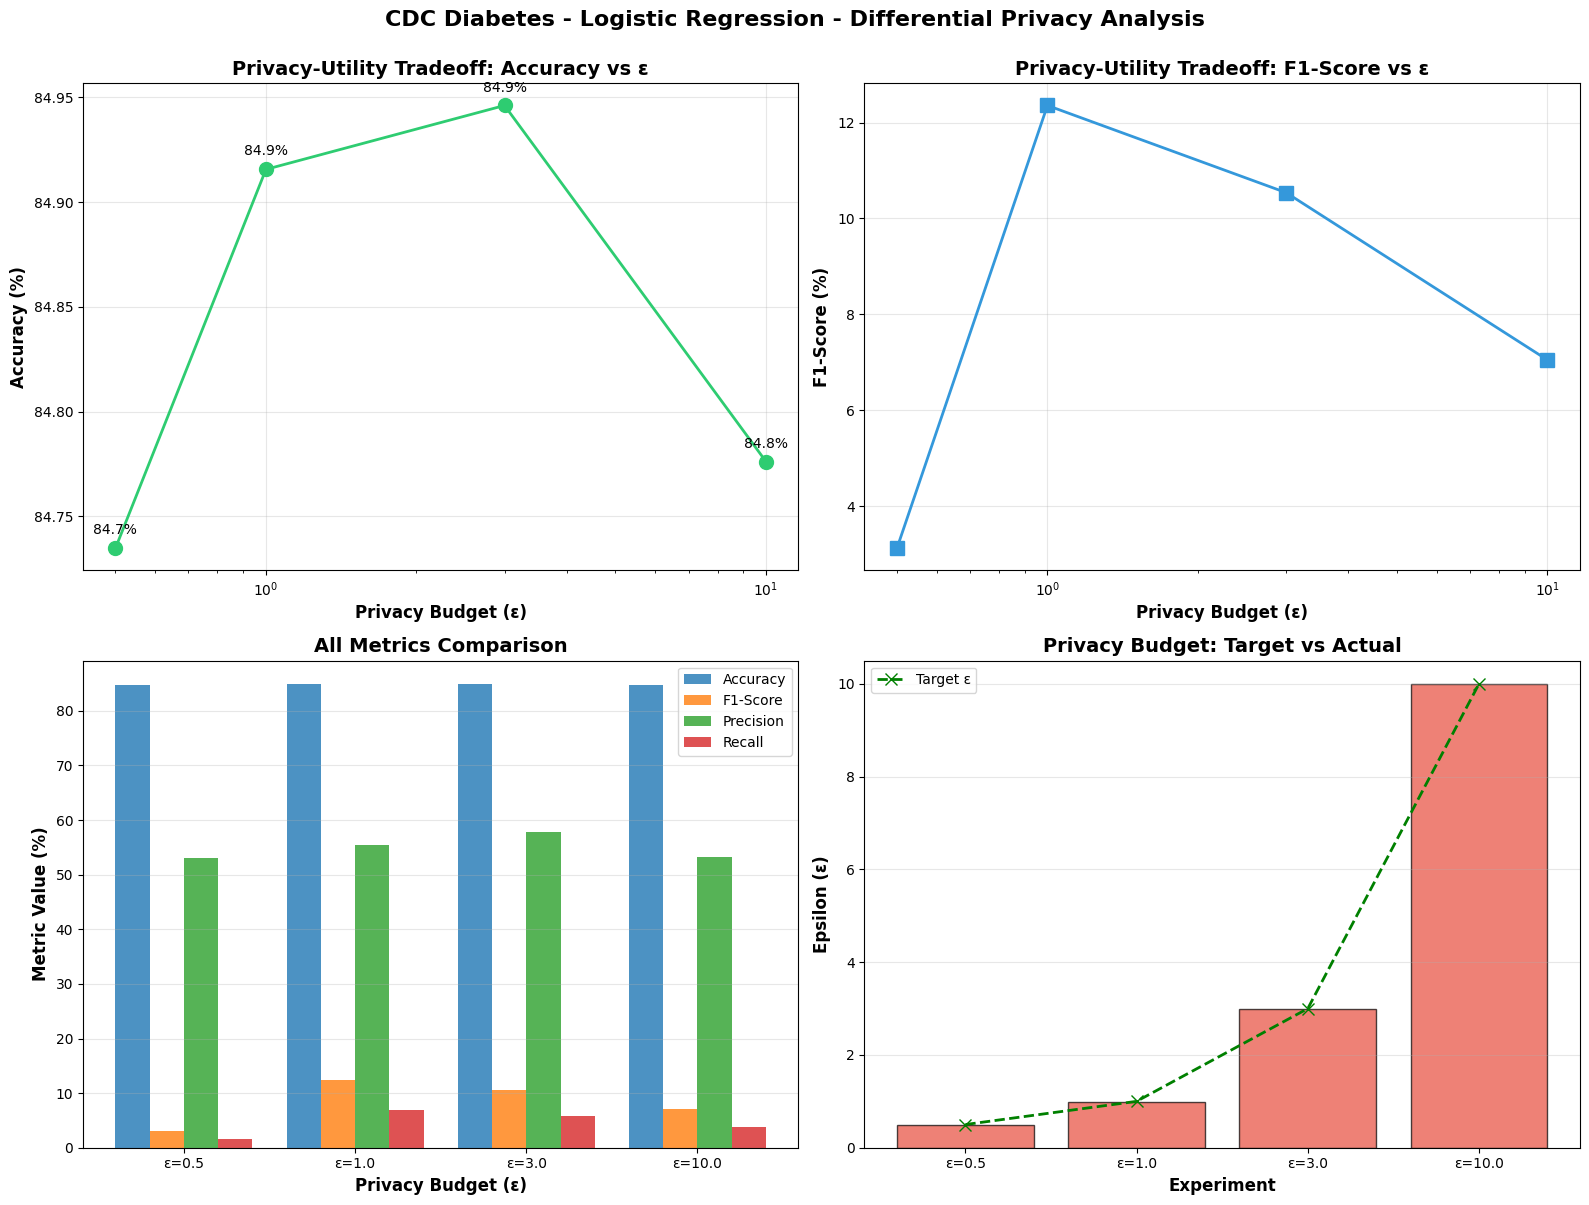

In [53]:
# Run DP Logistic Regression experiments for CDC Diabetes
print("Starting Differential Privacy Logistic Regression experiments for CDC Diabetes dataset...")
dp_lr_results_diabetes, dp_lr_models_diabetes, dp_lr_histories_diabetes = compare_epsilon_budgets_lr(
    train_loader_diabetes, 
    val_loader_diabetes, 
    test_loader_diabetes,
    class_weights_diabetes,
    input_size_diabetes,
    epsilon_values=[0.5, 1.0, 3.0, 10.0],
    epochs=50,
    device=device,
    dataset_name='CDC Diabetes'
)

# Visualize results
plot_privacy_utility_tradeoff(dp_lr_results_diabetes, 'CDC Diabetes - Logistic Regression')

Starting Differential Privacy Logistic Regression experiments for Adult Income dataset...

EPSILON BUDGET COMPARISON - LOGISTIC REGRESSION - Adult Income

🔒 Training Logistic Regression with ε = 0.5
--------------------------------------------------


12/09/2025 01:51:44:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 0.5
  δ: 1e-05
  Noise Multiplier: 2.3438
  Max Grad Norm: 1.0

Epoch [10/50] - Train Loss: 0.6856, Train Acc: 82.35% | Val Loss: 0.6970, Val Acc: 82.04% | ε spent: 0.21
Epoch [10/50] - Train Loss: 0.6856, Train Acc: 82.35% | Val Loss: 0.6970, Val Acc: 82.04% | ε spent: 0.21
Epoch [20/50] - Train Loss: 0.7060, Train Acc: 82.04% | Val Loss: 0.6843, Val Acc: 82.12% | ε spent: 0.30
Epoch [20/50] - Train Loss: 0.7060, Train Acc: 82.04% | Val Loss: 0.6843, Val Acc: 82.12% | ε spent: 0.30
Epoch [30/50] - Train Loss: 0.7136, Train Acc: 82.38% | Val Loss: 0.6823, Val Acc: 82.18% | ε spent: 0.38
Epoch [30/50] - Train Loss: 0.7136, Train Acc: 82.38% | Val Loss: 0.6823, Val Acc: 82.18% | ε spent: 0.38
Epoch [40/50] - Train Loss: 0.7128, Train Acc: 82.44% | Val Loss: 0.7201, Val Acc: 82.28% | ε spent: 0.44
Epoch [40/50] - Train Loss: 0.7128, Train Acc: 82.44% | Val Loss: 0.7201, Val Acc: 82.28% | ε spent: 0.44
Epoch [50/50] - Train Loss: 0.7301, Train Acc: 82

12/09/2025 01:53:03:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 1.0
  δ: 1e-05
  Noise Multiplier: 1.3477
  Max Grad Norm: 1.0

Epoch [10/50] - Train Loss: 0.7024, Train Acc: 82.79% | Val Loss: 0.7195, Val Acc: 81.97% | ε spent: 0.43
Epoch [10/50] - Train Loss: 0.7024, Train Acc: 82.79% | Val Loss: 0.7195, Val Acc: 81.97% | ε spent: 0.43
Epoch [20/50] - Train Loss: 0.6995, Train Acc: 82.52% | Val Loss: 0.7077, Val Acc: 82.20% | ε spent: 0.61
Epoch [20/50] - Train Loss: 0.6995, Train Acc: 82.52% | Val Loss: 0.7077, Val Acc: 82.20% | ε spent: 0.61
Epoch [30/50] - Train Loss: 0.7189, Train Acc: 82.41% | Val Loss: 0.7152, Val Acc: 82.55% | ε spent: 0.76
Epoch [30/50] - Train Loss: 0.7189, Train Acc: 82.41% | Val Loss: 0.7152, Val Acc: 82.55% | ε spent: 0.76
Epoch [40/50] - Train Loss: 0.6972, Train Acc: 82.35% | Val Loss: 0.7090, Val Acc: 82.38% | ε spent: 0.89
Epoch [40/50] - Train Loss: 0.6972, Train Acc: 82.35% | Val Loss: 0.7090, Val Acc: 82.38% | ε spent: 0.89
Epoch [50/50] - Train Loss: 0.6952, Train Acc: 82

12/09/2025 01:54:27:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 3.0
  δ: 1e-05
  Noise Multiplier: 0.7520
  Max Grad Norm: 1.0

Epoch [10/50] - Train Loss: 0.7090, Train Acc: 82.22% | Val Loss: 0.6887, Val Acc: 82.28% | ε spent: 1.41
Epoch [10/50] - Train Loss: 0.7090, Train Acc: 82.22% | Val Loss: 0.6887, Val Acc: 82.28% | ε spent: 1.41
Epoch [20/50] - Train Loss: 0.7041, Train Acc: 82.32% | Val Loss: 0.6901, Val Acc: 81.91% | ε spent: 1.91
Epoch [20/50] - Train Loss: 0.7041, Train Acc: 82.32% | Val Loss: 0.6901, Val Acc: 81.91% | ε spent: 1.91
Epoch [30/50] - Train Loss: 0.7009, Train Acc: 82.57% | Val Loss: 0.7128, Val Acc: 82.40% | ε spent: 2.32
Epoch [30/50] - Train Loss: 0.7009, Train Acc: 82.57% | Val Loss: 0.7128, Val Acc: 82.40% | ε spent: 2.32
Epoch [40/50] - Train Loss: 0.7033, Train Acc: 82.20% | Val Loss: 0.7046, Val Acc: 82.28% | ε spent: 2.67
Epoch [40/50] - Train Loss: 0.7033, Train Acc: 82.20% | Val Loss: 0.7046, Val Acc: 82.28% | ε spent: 2.67
Epoch [50/50] - Train Loss: 0.7090, Train Acc: 82

12/09/2025 01:56:21:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 DP-SGD Training Started
  Target ε: 10.0
  δ: 1e-05
  Noise Multiplier: 0.5313
  Max Grad Norm: 1.0

Epoch [10/50] - Train Loss: 0.6958, Train Acc: 82.23% | Val Loss: 0.6943, Val Acc: 82.04% | ε spent: 5.34
Epoch [10/50] - Train Loss: 0.6958, Train Acc: 82.23% | Val Loss: 0.6943, Val Acc: 82.04% | ε spent: 5.34
Epoch [20/50] - Train Loss: 0.6993, Train Acc: 82.64% | Val Loss: 0.6923, Val Acc: 81.87% | ε spent: 6.78
Epoch [20/50] - Train Loss: 0.6993, Train Acc: 82.64% | Val Loss: 0.6923, Val Acc: 81.87% | ε spent: 6.78
Epoch [30/50] - Train Loss: 0.6879, Train Acc: 82.51% | Val Loss: 0.7342, Val Acc: 82.49% | ε spent: 7.96
Epoch [30/50] - Train Loss: 0.6879, Train Acc: 82.51% | Val Loss: 0.7342, Val Acc: 82.49% | ε spent: 7.96
Epoch [40/50] - Train Loss: 0.7086, Train Acc: 82.33% | Val Loss: 0.6915, Val Acc: 82.06% | ε spent: 9.02
Epoch [40/50] - Train Loss: 0.7086, Train Acc: 82.33% | Val Loss: 0.6915, Val Acc: 82.06% | ε spent: 9.02
Epoch [50/50] - Train Loss: 0.7025, Train Acc: 8

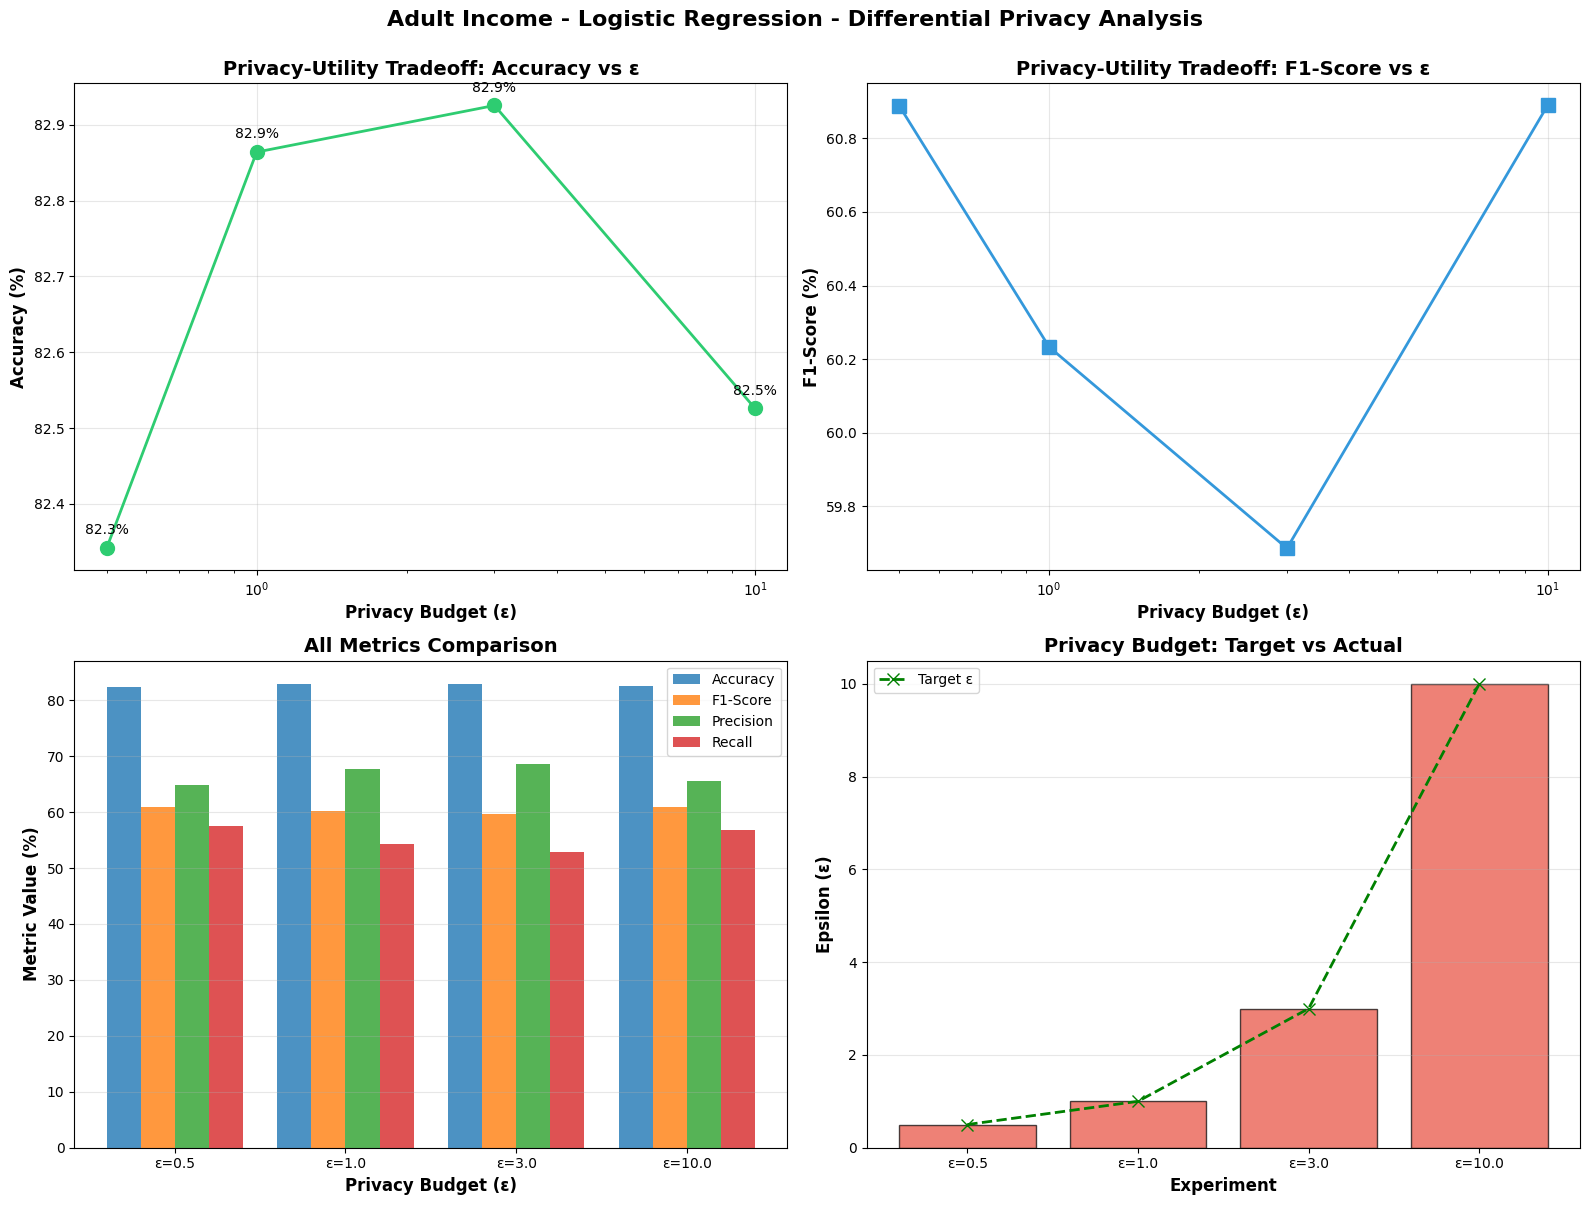

In [54]:
# Run DP Logistic Regression experiments for Adult Income
print("Starting Differential Privacy Logistic Regression experiments for Adult Income dataset...")
dp_lr_results_adult, dp_lr_models_adult, dp_lr_histories_adult = compare_epsilon_budgets_lr(
    train_loader_adult, 
    val_loader_adult, 
    test_loader_adult,
    class_weights_adult,
    input_size_adult,
    epsilon_values=[0.5, 1.0, 3.0, 10.0],
    epochs=50,
    device=device,
    dataset_name='Adult Income'
)

# Visualize results
plot_privacy_utility_tradeoff(dp_lr_results_adult, 'Adult Income - Logistic Regression')

Checking for required data...
✓ FNN DP results found for CDC Diabetes

FNN vs LOGISTIC REGRESSION UNDER DP - CDC Diabetes

Performance Comparison:
 Epsilon  FNN_Accuracy  LR_Accuracy  FNN_F1     LR_F1  FNN_AUC   LR_AUC  Accuracy_Diff    F1_Diff
     0.5     84.706395    84.734721     0.0  3.125000 0.483456 0.794305      -0.028326  -3.125000
     1.0     84.706395    84.915568     0.0 12.355994 0.484644 0.796453      -0.209173 -12.355994
     3.0     84.706395    84.946073     0.0 10.539946 0.505262 0.802346      -0.239678 -10.539946
    10.0     84.706395    84.776119     0.0  7.050685 0.491268 0.793456      -0.069724  -7.050685


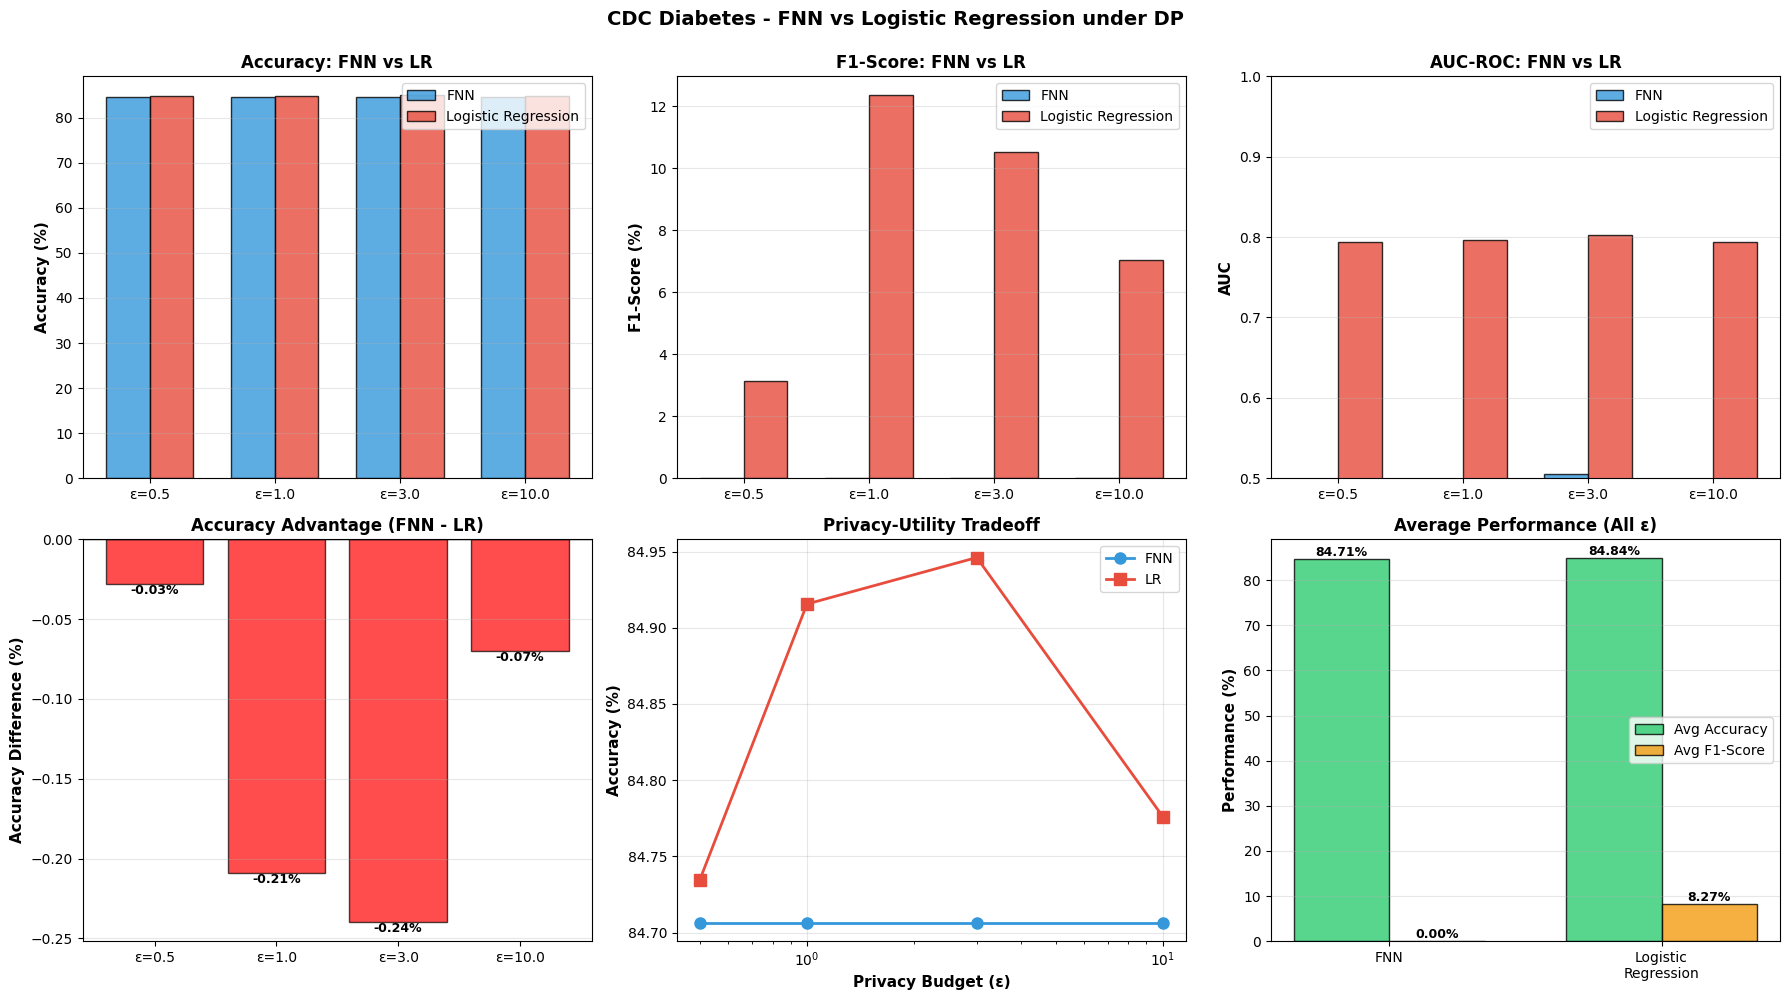


KEY INSIGHTS:
1. Average Accuracy:
   FNN: 84.71%
   Logistic Regression: 84.84%
   Difference: -0.14%

2. Average F1-Score:
   FNN: 0.00%
   Logistic Regression: 8.27%
   Difference: -8.27%

3. Best Performance (Highest ε):
   FNN Accuracy: 84.71%
   LR Accuracy: 84.78%

4. Most Private (Lowest ε):
   FNN Accuracy: 84.71%
   LR Accuracy: 84.73%


In [55]:
# Compare FNN vs Logistic Regression under Differential Privacy
def compare_fnn_vs_lr_dp(fnn_results, lr_results, dataset_name):
    """
    Compare performance of FNN vs Logistic Regression under DP across different epsilon values.
    """
    print(f"\n{'='*70}")
    print(f"FNN vs LOGISTIC REGRESSION UNDER DP - {dataset_name}")
    print(f"{'='*70}")
    
    # Create comparison dataframe
    comparison = pd.DataFrame({
        'Epsilon': fnn_results['epsilon_target'],
        'FNN_Accuracy': fnn_results['accuracy'],
        'LR_Accuracy': lr_results['accuracy'],
        'FNN_F1': fnn_results['f1_score'],
        'LR_F1': lr_results['f1_score'],
        'FNN_AUC': fnn_results['auc'],
        'LR_AUC': lr_results['auc'],
        'Accuracy_Diff': fnn_results['accuracy'] - lr_results['accuracy'],
        'F1_Diff': fnn_results['f1_score'] - lr_results['f1_score']
    })
    
    print("\nPerformance Comparison:")
    print(comparison.to_string(index=False))
    
    # Visualization
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    epsilon_vals = comparison['Epsilon']
    x = np.arange(len(epsilon_vals))
    width = 0.35
    
    # Plot 1: Accuracy Comparison
    ax1 = axes[0, 0]
    bars1 = ax1.bar(x - width/2, comparison['FNN_Accuracy'], width, 
                    label='FNN', alpha=0.8, color='#3498db', edgecolor='black')
    bars2 = ax1.bar(x + width/2, comparison['LR_Accuracy'], width, 
                    label='Logistic Regression', alpha=0.8, color='#e74c3c', edgecolor='black')
    ax1.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
    ax1.set_title('Accuracy: FNN vs LR', fontsize=12, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels([f'ε={e}' for e in epsilon_vals])
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Plot 2: F1-Score Comparison
    ax2 = axes[0, 1]
    ax2.bar(x - width/2, comparison['FNN_F1'], width, 
            label='FNN', alpha=0.8, color='#3498db', edgecolor='black')
    ax2.bar(x + width/2, comparison['LR_F1'], width, 
            label='Logistic Regression', alpha=0.8, color='#e74c3c', edgecolor='black')
    ax2.set_ylabel('F1-Score (%)', fontsize=11, fontweight='bold')
    ax2.set_title('F1-Score: FNN vs LR', fontsize=12, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels([f'ε={e}' for e in epsilon_vals])
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Plot 3: AUC Comparison
    ax3 = axes[0, 2]
    ax3.bar(x - width/2, comparison['FNN_AUC'], width, 
            label='FNN', alpha=0.8, color='#3498db', edgecolor='black')
    ax3.bar(x + width/2, comparison['LR_AUC'], width, 
            label='Logistic Regression', alpha=0.8, color='#e74c3c', edgecolor='black')
    ax3.set_ylabel('AUC', fontsize=11, fontweight='bold')
    ax3.set_title('AUC-ROC: FNN vs LR', fontsize=12, fontweight='bold')
    ax3.set_xticks(x)
    ax3.set_xticklabels([f'ε={e}' for e in epsilon_vals])
    ax3.set_ylim([0.5, 1.0])
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    
    # Plot 4: Accuracy Difference (FNN - LR)
    ax4 = axes[1, 0]
    colors = ['green' if d > 0 else 'red' for d in comparison['Accuracy_Diff']]
    bars = ax4.bar(x, comparison['Accuracy_Diff'], color=colors, alpha=0.7, edgecolor='black')
    ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
    ax4.set_ylabel('Accuracy Difference (%)', fontsize=11, fontweight='bold')
    ax4.set_title('Accuracy Advantage (FNN - LR)', fontsize=12, fontweight='bold')
    ax4.set_xticks(x)
    ax4.set_xticklabels([f'ε={e}' for e in epsilon_vals])
    ax4.grid(True, alpha=0.3, axis='y')
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:+.2f}%', ha='center', va='bottom' if height > 0 else 'top', 
                fontweight='bold', fontsize=9)
    
    # Plot 5: Privacy-Utility Curves
    ax5 = axes[1, 1]
    ax5.plot(epsilon_vals, comparison['FNN_Accuracy'], 
             marker='o', linewidth=2, markersize=8, label='FNN', color='#3498db')
    ax5.plot(epsilon_vals, comparison['LR_Accuracy'], 
             marker='s', linewidth=2, markersize=8, label='LR', color='#e74c3c')
    ax5.set_xlabel('Privacy Budget (ε)', fontsize=11, fontweight='bold')
    ax5.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
    ax5.set_title('Privacy-Utility Tradeoff', fontsize=12, fontweight='bold')
    ax5.set_xscale('log')
    ax5.legend()
    ax5.grid(True, alpha=0.3)
    
    # Plot 6: Model Complexity vs Performance
    ax6 = axes[1, 2]
    # Calculate average performance across all epsilon values
    fnn_avg_acc = comparison['FNN_Accuracy'].mean()
    lr_avg_acc = comparison['LR_Accuracy'].mean()
    fnn_avg_f1 = comparison['FNN_F1'].mean()
    lr_avg_f1 = comparison['LR_F1'].mean()
    
    models = ['FNN', 'Logistic\nRegression']
    avg_acc = [fnn_avg_acc, lr_avg_acc]
    avg_f1 = [fnn_avg_f1, lr_avg_f1]
    
    x_pos = np.arange(len(models))
    bars1 = ax6.bar(x_pos - width/2, avg_acc, width, 
                    label='Avg Accuracy', alpha=0.8, color='#2ecc71', edgecolor='black')
    bars2 = ax6.bar(x_pos + width/2, avg_f1, width, 
                    label='Avg F1-Score', alpha=0.8, color='#f39c12', edgecolor='black')
    ax6.set_ylabel('Performance (%)', fontsize=11, fontweight='bold')
    ax6.set_title('Average Performance (All ε)', fontsize=12, fontweight='bold')
    ax6.set_xticks(x_pos)
    ax6.set_xticklabels(models)
    ax6.legend()
    ax6.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax6.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}%', ha='center', va='bottom', 
                    fontweight='bold', fontsize=9)
    
    plt.suptitle(f'{dataset_name} - FNN vs Logistic Regression under DP', 
                 fontsize=14, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
    # Print insights
    print(f"\n{'='*70}")
    print("KEY INSIGHTS:")
    print(f"{'='*70}")
    print(f"1. Average Accuracy:")
    print(f"   FNN: {fnn_avg_acc:.2f}%")
    print(f"   Logistic Regression: {lr_avg_acc:.2f}%")
    print(f"   Difference: {fnn_avg_acc - lr_avg_acc:+.2f}%")
    print(f"\n2. Average F1-Score:")
    print(f"   FNN: {fnn_avg_f1:.2f}%")
    print(f"   Logistic Regression: {lr_avg_f1:.2f}%")
    print(f"   Difference: {fnn_avg_f1 - lr_avg_f1:+.2f}%")
    print(f"\n3. Best Performance (Highest ε):")
    best_idx = len(epsilon_vals) - 1
    print(f"   FNN Accuracy: {comparison['FNN_Accuracy'].iloc[best_idx]:.2f}%")
    print(f"   LR Accuracy: {comparison['LR_Accuracy'].iloc[best_idx]:.2f}%")
    print(f"\n4. Most Private (Lowest ε):")
    private_idx = 0
    print(f"   FNN Accuracy: {comparison['FNN_Accuracy'].iloc[private_idx]:.2f}%")
    print(f"   LR Accuracy: {comparison['LR_Accuracy'].iloc[private_idx]:.2f}%")
    
    return comparison

# Check if FNN DP results exist before running comparison
print("Checking for required data...")
if 'dp_results_diabetes' in dir():
    print("✓ FNN DP results found for CDC Diabetes")
    comparison_diabetes = compare_fnn_vs_lr_dp(dp_results_diabetes, dp_lr_results_diabetes, 'CDC Diabetes')
else:
    print("⚠️ Missing dp_results_diabetes")
    print("   Please run cell 50 first to generate FNN DP results for CDC Diabetes")
    print("   (The cell that runs: compare_epsilon_budgets(...) for Diabetes dataset)")

✓ FNN DP results found for Adult Income

FNN vs LOGISTIC REGRESSION UNDER DP - Adult Income

Performance Comparison:
 Epsilon  FNN_Accuracy  LR_Accuracy  FNN_F1     LR_F1  FNN_AUC   LR_AUC  Accuracy_Diff    F1_Diff
     0.5     76.062686    82.341493     0.0 60.889292 0.443510 0.846411      -6.278808 -60.889292
     1.0     76.062686    82.863874     0.0 60.232945 0.465236 0.848403      -6.801188 -60.232945
     3.0     76.062686    82.925330     0.0 59.685611 0.511768 0.848671      -6.862645 -59.685611
    10.0     76.062686    82.525863     0.0 60.889500 0.566639 0.846464      -6.463177 -60.889500


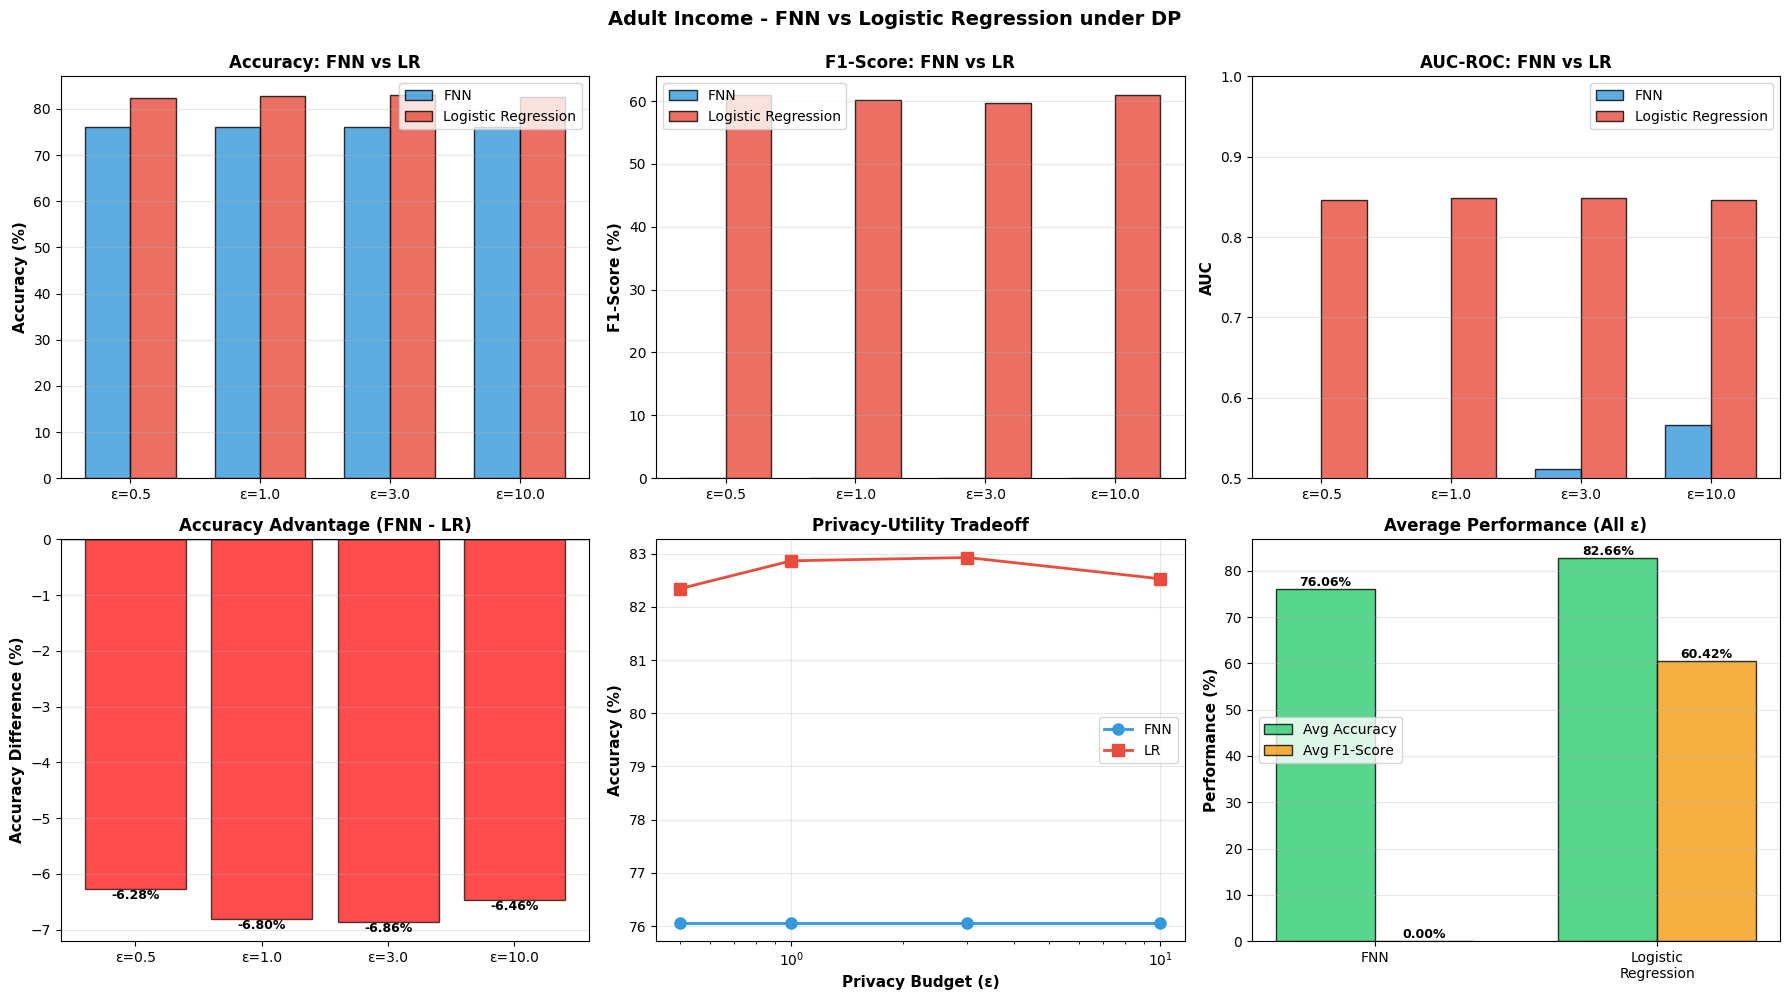


KEY INSIGHTS:
1. Average Accuracy:
   FNN: 76.06%
   Logistic Regression: 82.66%
   Difference: -6.60%

2. Average F1-Score:
   FNN: 0.00%
   Logistic Regression: 60.42%
   Difference: -60.42%

3. Best Performance (Highest ε):
   FNN Accuracy: 76.06%
   LR Accuracy: 82.53%

4. Most Private (Lowest ε):
   FNN Accuracy: 76.06%
   LR Accuracy: 82.34%


In [56]:
# Compare for Adult Income
if 'dp_results_adult' in dir():
    print("✓ FNN DP results found for Adult Income")
    comparison_adult = compare_fnn_vs_lr_dp(dp_results_adult, dp_lr_results_adult, 'Adult Income')
else:
    print("⚠️ Missing dp_results_adult")
    print("   Please run cell 51 first to generate FNN DP results for Adult Income")
    print("   (The cell that runs: compare_epsilon_budgets(...) for Adult dataset)")


COMPREHENSIVE DIFFERENTIAL PRIVACY SUMMARY

All DP Experiments:
     Dataset               Model  Epsilon  Accuracy  F1-Score      AUC
CDC Diabetes                 FNN      0.5 84.706395  0.000000 0.483456
CDC Diabetes                 FNN      1.0 84.706395  0.000000 0.484644
CDC Diabetes                 FNN      3.0 84.706395  0.000000 0.505262
CDC Diabetes                 FNN     10.0 84.706395  0.000000 0.491268
CDC Diabetes Logistic Regression      0.5 84.734721  3.125000 0.794305
CDC Diabetes Logistic Regression      1.0 84.915568 12.355994 0.796453
CDC Diabetes Logistic Regression      3.0 84.946073 10.539946 0.802346
CDC Diabetes Logistic Regression     10.0 84.776119  7.050685 0.793456
Adult Income                 FNN      0.5 76.062686  0.000000 0.443510
Adult Income                 FNN      1.0 76.062686  0.000000 0.465236
Adult Income                 FNN      3.0 76.062686  0.000000 0.511768
Adult Income                 FNN     10.0 76.062686  0.000000 0.566639
Adult Income

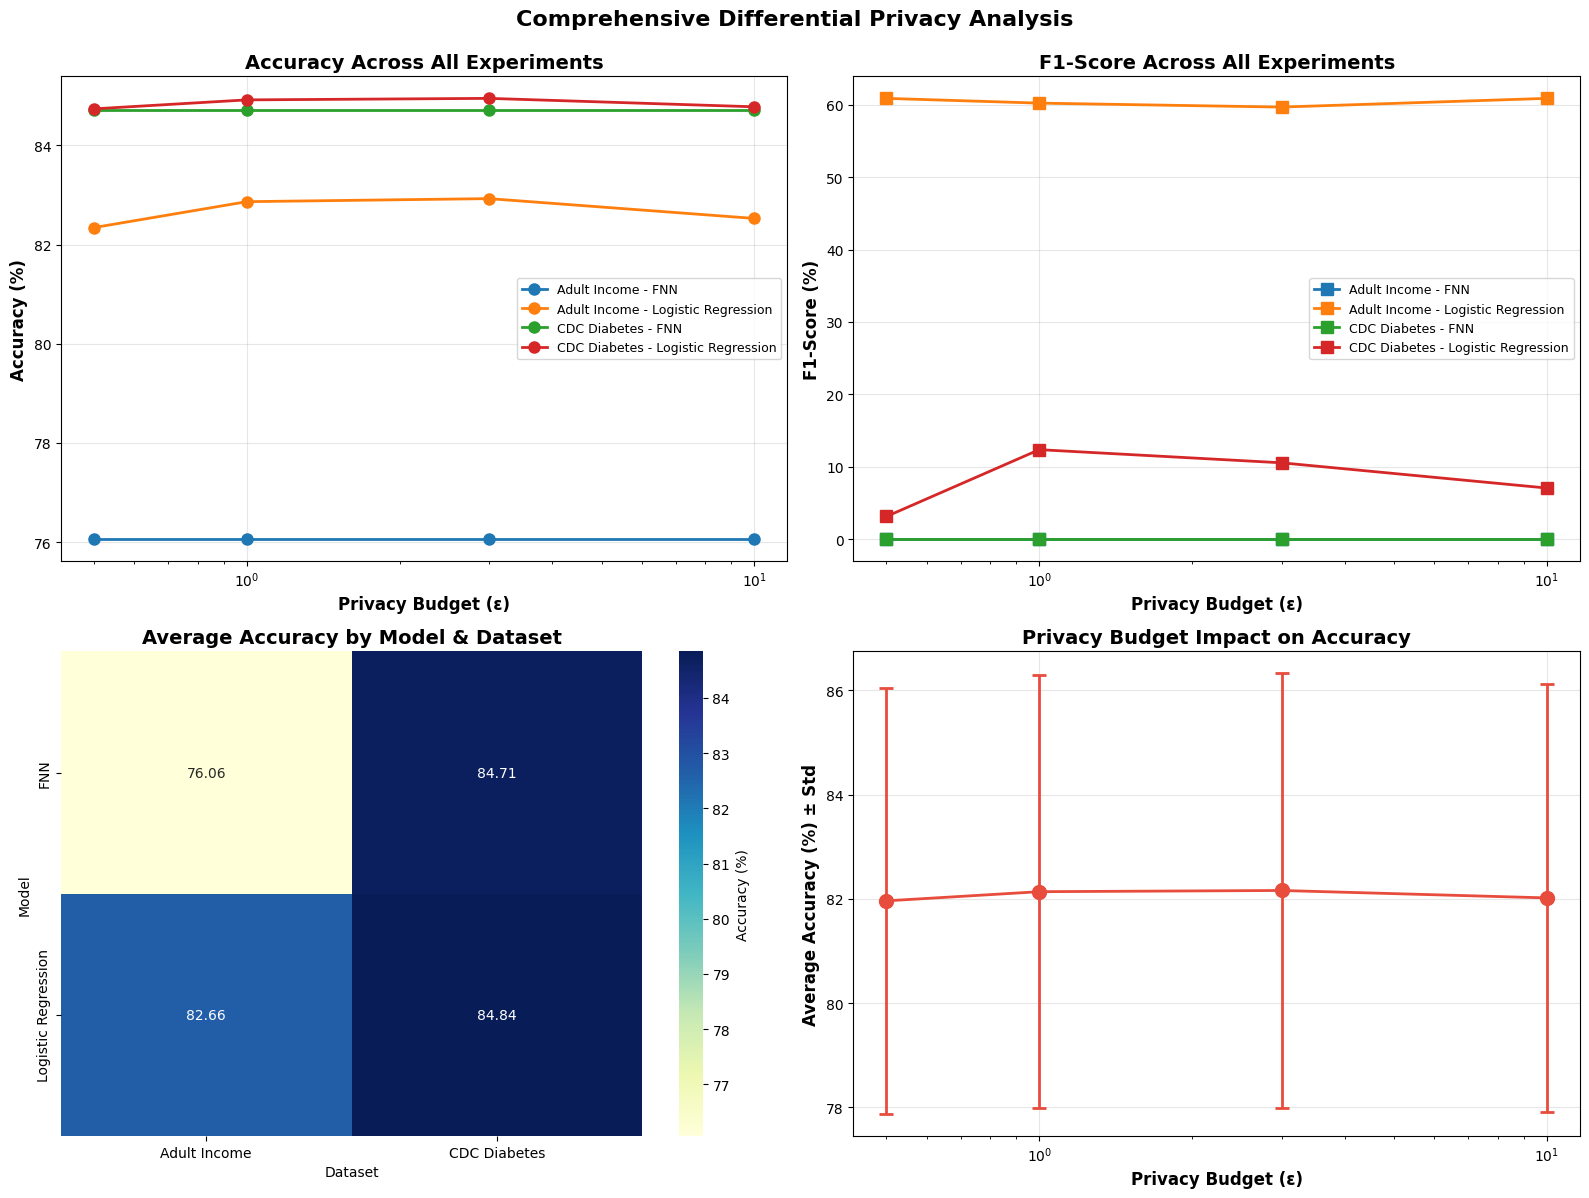


✓ DIFFERENTIAL PRIVACY EXPERIMENTS COMPLETE!

Total Experiments Run: 16
Datasets: CDC Diabetes, Adult Income
Models: FNN, Logistic Regression
Privacy Budgets (ε): 0.5, 1.0, 3.0, 10.0
Total Configurations: 2 datasets × 2 models × 4 epsilon values = 16 experiments

🔒 Privacy Guarantees: All models trained with DP-SGD (δ=1e-5)
📊 Metrics Evaluated: Accuracy, F1-Score, Precision, Recall, AUC-ROC


In [57]:
# Final Comprehensive DP Summary
def create_comprehensive_dp_summary():
    """Create a comprehensive summary of all DP experiments."""
    
    print(f"\n{'='*80}")
    print("COMPREHENSIVE DIFFERENTIAL PRIVACY SUMMARY")
    print(f"{'='*80}\n")
    
    # Collect all results
    all_dp_results = []
    
    # CDC Diabetes FNN
    for idx, row in dp_results_diabetes.iterrows():
        all_dp_results.append({
            'Dataset': 'CDC Diabetes',
            'Model': 'FNN',
            'Epsilon': row['epsilon_target'],
            'Accuracy': row['accuracy'],
            'F1-Score': row['f1_score'],
            'AUC': row['auc']
        })
    
    # CDC Diabetes LR
    for idx, row in dp_lr_results_diabetes.iterrows():
        all_dp_results.append({
            'Dataset': 'CDC Diabetes',
            'Model': 'Logistic Regression',
            'Epsilon': row['epsilon_target'],
            'Accuracy': row['accuracy'],
            'F1-Score': row['f1_score'],
            'AUC': row['auc']
        })
    
    # Adult Income FNN
    for idx, row in dp_results_adult.iterrows():
        all_dp_results.append({
            'Dataset': 'Adult Income',
            'Model': 'FNN',
            'Epsilon': row['epsilon_target'],
            'Accuracy': row['accuracy'],
            'F1-Score': row['f1_score'],
            'AUC': row['auc']
        })
    
    # Adult Income LR
    for idx, row in dp_lr_results_adult.iterrows():
        all_dp_results.append({
            'Dataset': 'Adult Income',
            'Model': 'Logistic Regression',
            'Epsilon': row['epsilon_target'],
            'Accuracy': row['accuracy'],
            'F1-Score': row['f1_score'],
            'AUC': row['auc']
        })
    
    summary_df = pd.DataFrame(all_dp_results)
    
    # Print full summary
    print("All DP Experiments:")
    print(summary_df.to_string(index=False))
    
    # Calculate statistics by model and dataset
    print(f"\n{'='*80}")
    print("PERFORMANCE BY MODEL TYPE:")
    print(f"{'='*80}")
    
    model_stats = summary_df.groupby('Model').agg({
        'Accuracy': ['mean', 'std', 'min', 'max'],
        'F1-Score': ['mean', 'std', 'min', 'max'],
        'AUC': ['mean', 'std', 'min', 'max']
    }).round(2)
    print(model_stats)
    
    print(f"\n{'='*80}")
    print("PERFORMANCE BY DATASET:")
    print(f"{'='*80}")
    
    dataset_stats = summary_df.groupby('Dataset').agg({
        'Accuracy': ['mean', 'std', 'min', 'max'],
        'F1-Score': ['mean', 'std', 'min', 'max'],
        'AUC': ['mean', 'std', 'min', 'max']
    }).round(2)
    print(dataset_stats)
    
    print(f"\n{'='*80}")
    print("PRIVACY BUDGET IMPACT:")
    print(f"{'='*80}")
    
    epsilon_stats = summary_df.groupby('Epsilon').agg({
        'Accuracy': ['mean', 'std'],
        'F1-Score': ['mean', 'std'],
        'AUC': ['mean', 'std']
    }).round(2)
    print(epsilon_stats)
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Accuracy by Model and Dataset
    ax1 = axes[0, 0]
    for (dataset, model), group in summary_df.groupby(['Dataset', 'Model']):
        ax1.plot(group['Epsilon'], group['Accuracy'], 
                marker='o', linewidth=2, markersize=8, 
                label=f'{dataset} - {model}')
    ax1.set_xlabel('Privacy Budget (ε)', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
    ax1.set_title('Accuracy Across All Experiments', fontsize=14, fontweight='bold')
    ax1.set_xscale('log')
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: F1-Score by Model and Dataset
    ax2 = axes[0, 1]
    for (dataset, model), group in summary_df.groupby(['Dataset', 'Model']):
        ax2.plot(group['Epsilon'], group['F1-Score'], 
                marker='s', linewidth=2, markersize=8, 
                label=f'{dataset} - {model}')
    ax2.set_xlabel('Privacy Budget (ε)', fontsize=12, fontweight='bold')
    ax2.set_ylabel('F1-Score (%)', fontsize=12, fontweight='bold')
    ax2.set_title('F1-Score Across All Experiments', fontsize=14, fontweight='bold')
    ax2.set_xscale('log')
    ax2.legend(fontsize=9)
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Heatmap of Average Accuracy
    ax3 = axes[1, 0]
    pivot_acc = summary_df.pivot_table(values='Accuracy', 
                                        index='Model', 
                                        columns='Dataset', 
                                        aggfunc='mean')
    sns.heatmap(pivot_acc, annot=True, fmt='.2f', cmap='YlGnBu', 
                ax=ax3, cbar_kws={'label': 'Accuracy (%)'})
    ax3.set_title('Average Accuracy by Model & Dataset', fontsize=14, fontweight='bold')
    
    # Plot 4: Privacy Budget Distribution
    ax4 = axes[1, 1]
    epsilon_groups = summary_df.groupby('Epsilon')['Accuracy'].agg(['mean', 'std'])
    ax4.errorbar(epsilon_groups.index, epsilon_groups['mean'], 
                yerr=epsilon_groups['std'], marker='o', linewidth=2, 
                markersize=10, capsize=5, capthick=2, color='#e74c3c')
    ax4.set_xlabel('Privacy Budget (ε)', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Average Accuracy (%) ± Std', fontsize=12, fontweight='bold')
    ax4.set_title('Privacy Budget Impact on Accuracy', fontsize=14, fontweight='bold')
    ax4.set_xscale('log')
    ax4.grid(True, alpha=0.3)
    
    plt.suptitle('Comprehensive Differential Privacy Analysis', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
    return summary_df

comprehensive_summary = create_comprehensive_dp_summary()

print(f"\n{'='*80}")
print("✓ DIFFERENTIAL PRIVACY EXPERIMENTS COMPLETE!")
print(f"{'='*80}")
print(f"\nTotal Experiments Run: {len(comprehensive_summary)}")
print(f"Datasets: CDC Diabetes, Adult Income")
print(f"Models: FNN, Logistic Regression")
print(f"Privacy Budgets (ε): 0.5, 1.0, 3.0, 10.0")
print(f"Total Configurations: 2 datasets × 2 models × 4 epsilon values = 16 experiments")
print(f"\n🔒 Privacy Guarantees: All models trained with DP-SGD (δ=1e-5)")
print(f"📊 Metrics Evaluated: Accuracy, F1-Score, Precision, Recall, AUC-ROC")

In [58]:
# Partition data for federated clients (IID and Non-IID)
def partition_data_for_clients(X, y, num_clients=5, partition_strategy='iid', alpha=0.5):
    """
    Partition dataset among federated clients.
    
    Args:
        X: Feature array
        y: Labels (Series or array)
        num_clients: Number of clients
        partition_strategy: 'iid' (random uniform) or 'non_iid' (Dirichlet distribution)
        alpha: Dirichlet parameter for non-IID (lower = more heterogeneous)
    
    Returns:
        client_data: List of (X_client, y_client) tuples
    """
    # Convert to numpy if needed
    if hasattr(X, 'values'):
        X = X.values if isinstance(X, pd.DataFrame) else X
    if hasattr(y, 'values'):
        y_vals = y.values
    else:
        y_vals = y
    
    n_samples = len(X)
    
    if partition_strategy == 'iid':
        print(f"\n📊 IID Partitioning: Uniform random distribution")
        # IID: Randomly shuffle and split evenly
        indices = np.random.permutation(n_samples)
        client_indices = np.array_split(indices, num_clients)
        
    elif partition_strategy == 'non_iid':
        print(f"\n📊 Non-IID Partitioning: Dirichlet(α={alpha})")
        # Non-IID: Use Dirichlet distribution
        K = len(np.unique(y_vals))  # Number of classes
        N = len(y_vals)
        
        client_indices = [[] for _ in range(num_clients)]
        
        for k in range(K):
            idx_k = np.where(y_vals == k)[0]
            np.random.shuffle(idx_k)
            
            # Sample from Dirichlet distribution
            proportions = np.random.dirichlet(np.repeat(alpha, num_clients))
            # Ensure all clients get some data
            proportions = np.array([p * (len(idx_j) < N / num_clients) 
                                   for p, idx_j in zip(proportions, client_indices)])
            proportions = proportions / proportions.sum()
            proportions = (np.cumsum(proportions) * len(idx_k)).astype(int)[:-1]
            
            client_indices = [idx_j + idx.tolist() 
                            for idx_j, idx in zip(client_indices, 
                                                 np.split(idx_k, proportions))]
    
    # Create client datasets
    client_data = []
    print(f"\nClient Data Distribution:")
    print(f"{'Client':<10} {'Samples':<10} {'Class 0':<10} {'Class 1':<10} {'% Class 0':<12} {'% Class 1'}")
    print("-" * 70)
    
    for i, indices in enumerate(client_indices):
        X_client = X[indices]
        y_client_vals = y_vals[indices]
        
        # Count class distribution
        unique, counts = np.unique(y_client_vals, return_counts=True)
        class_dist = dict(zip(unique, counts))
        c0 = class_dist.get(0, 0)
        c1 = class_dist.get(1, 0)
        total = len(indices)
        
        print(f"Client {i+1:<3}   {total:<10} {c0:<10} {c1:<10} "
              f"{c0/total*100:<11.1f}% {c1/total*100:.1f}%")
        
        client_data.append((X_client, y_client_vals))
    
    print("-" * 70)
    print(f"Total: {n_samples} samples distributed across {num_clients} clients\n")
    
    return client_data

In [59]:
# Federated Learning Aggregation Methods

def federated_averaging(client_models):
    """
    FedAvg: Average model parameters across all clients.
    
    Args:
        client_models: List of client model state_dicts
    
    Returns:
        global_state_dict: Aggregated model parameters
    """
    global_state_dict = {}
    
    # Get parameter names from first model
    param_names = client_models[0].keys()
    
    # Average each parameter across all clients
    for param_name in param_names:
        global_state_dict[param_name] = torch.stack(
            [client_model[param_name].float() for client_model in client_models]
        ).mean(dim=0)
    
    return global_state_dict


def federated_proximal(client_models, global_model, mu=0.01):
    """
    FedProx: FedAvg with proximal term for stability.
    
    Args:
        client_models: List of client model state_dicts
        global_model: Previous global model state_dict
        mu: Proximal term coefficient (controls regularization strength)
    
    Returns:
        global_state_dict: Aggregated model parameters
    """
    # First do standard averaging
    global_state_dict = federated_averaging(client_models)
    
    # Apply proximal term: pull aggregated model toward previous global model
    for param_name in global_state_dict.keys():
        if global_model is not None and param_name in global_model:
            global_state_dict[param_name] = (
                (1 - mu) * global_state_dict[param_name] + 
                mu * global_model[param_name].float()
            )
    
    return global_state_dict


def federated_adam(client_models, global_model, momentum_dict, 
                   velocity_dict, beta1=0.9, beta2=0.999, 
                   epsilon=1e-8, learning_rate=0.01, round_num=1):
    """
    FedAdam: Server-side Adam optimization for federated aggregation.
    
    Args:
        client_models: List of client model state_dicts
        global_model: Previous global model state_dict
        momentum_dict: First moment estimates (m_t)
        velocity_dict: Second moment estimates (v_t)
        beta1: Exponential decay rate for first moment
        beta2: Exponential decay rate for second moment
        epsilon: Small constant for numerical stability
        learning_rate: Server learning rate
        round_num: Current communication round (for bias correction)
    
    Returns:
        global_state_dict: Aggregated model parameters
        momentum_dict: Updated first moment
        velocity_dict: Updated second moment
    """
    # Compute average gradient (difference from global model)
    avg_gradient = {}
    param_names = client_models[0].keys()
    
    for param_name in param_names:
        # Average client models
        avg_param = torch.stack(
            [client_model[param_name].float() for client_model in client_models]
        ).mean(dim=0)
        
        # Compute pseudo-gradient (difference from previous global model)
        if global_model is not None and param_name in global_model:
            avg_gradient[param_name] = avg_param - global_model[param_name].float()
        else:
            avg_gradient[param_name] = avg_param
    
    # Initialize momentum and velocity if first round
    if not momentum_dict:
        for param_name in param_names:
            momentum_dict[param_name] = torch.zeros_like(avg_gradient[param_name])
            velocity_dict[param_name] = torch.zeros_like(avg_gradient[param_name])
    
    # Update moments and apply Adam update
    global_state_dict = {}
    
    for param_name in param_names:
        # Update biased first moment estimate
        momentum_dict[param_name] = (
            beta1 * momentum_dict[param_name] + 
            (1 - beta1) * avg_gradient[param_name]
        )
        
        # Update biased second moment estimate
        velocity_dict[param_name] = (
            beta2 * velocity_dict[param_name] + 
            (1 - beta2) * (avg_gradient[param_name] ** 2)
        )
        
        # Bias correction
        m_hat = momentum_dict[param_name] / (1 - beta1 ** round_num)
        v_hat = velocity_dict[param_name] / (1 - beta2 ** round_num)
        
        # Adam update
        if global_model is not None and param_name in global_model:
            global_state_dict[param_name] = (
                global_model[param_name].float() + 
                learning_rate * m_hat / (torch.sqrt(v_hat) + epsilon)
            )
        else:
            global_state_dict[param_name] = (
                learning_rate * m_hat / (torch.sqrt(v_hat) + epsilon)
            )
    
    return global_state_dict, momentum_dict, velocity_dict


print("✓ Federated Learning aggregation methods defined:")
print("  - FedAvg: Simple parameter averaging")
print("  - FedProx: Proximal term for stability (μ=0.01)")
print("  - FedAdam: Server-side adaptive optimization")

✓ Federated Learning aggregation methods defined:
  - FedAvg: Simple parameter averaging
  - FedProx: Proximal term for stability (μ=0.01)
  - FedAdam: Server-side adaptive optimization


In [69]:
# Federated Learning Training Function
def train_federated_model(client_data, input_size, hidden_sizes, 
                         class_weights, aggregation_method='fedavg',
                         num_rounds=10, local_epochs=5, 
                         learning_rate=0.001, batch_size=64,
                         mu_proximal=0.01, device='cpu',
                         dataset_name='Dataset'):
    """
    Train a model using Federated Learning.
    
    Args:
        client_data: List of (X_client, y_client) tuples
        input_size: Number of input features
        hidden_sizes: List of hidden layer sizes
        class_weights: Dictionary of class weights
        aggregation_method: 'fedavg', 'fedprox', or 'fedadam'
        num_rounds: Number of communication rounds
        local_epochs: Number of local training epochs per round
        learning_rate: Learning rate for local training
        batch_size: Batch size for local training
        mu_proximal: Proximal term coefficient for FedProx
        device: Device to train on
        dataset_name: Name of dataset for logging
    
    Returns:
        global_model: Final global model
        history: Training history with metrics per round
    """
    num_clients = len(client_data)
    
    print(f"\n{'='*70}")
    print(f"FEDERATED LEARNING - {dataset_name}")
    print(f"{'='*70}")
    print(f"Aggregation Method: {aggregation_method.upper()}")
    print(f"Clients: {num_clients}")
    print(f"Communication Rounds: {num_rounds}")
    print(f"Local Epochs: {local_epochs}")
    print(f"Batch Size: {batch_size}\n")
    
    # Initialize global model (DP-compatible architecture)
    global_model = FeedforwardNN_DP(input_size, hidden_sizes, output_size=2, dropout_rate=0.3)
    global_model = global_model.to(device)
    global_state_dict = global_model.state_dict()
    
    # For FedAdam: initialize momentum and velocity
    momentum_dict = {}
    velocity_dict = {}
    
    # Training history
    history = {
        'rounds': [],
        'avg_train_loss': [],
        'avg_train_acc': [],
        'client_losses': [],
        'client_accs': []
    }
    
    # Setup criterion with class weights
    weight_tensor = torch.FloatTensor([class_weights[0], class_weights[1]]).to(device)
    criterion = nn.CrossEntropyLoss(weight=weight_tensor)
    
    # Federated training loop
    for round_num in range(1, num_rounds + 1):
        print(f"\n🔄 Communication Round {round_num}/{num_rounds}")
        print("-" * 50)
        
        client_models = []
        round_losses = []
        round_accs = []
        
        # Train on each client
        for client_id, (X_client, y_client) in enumerate(client_data):
            # Skip clients with too few samples
            if len(X_client) < 4:
                print(f"  ⚠️  Skipping Client {client_id + 1} (only {len(X_client)} samples)")
                continue
                
            print(f"  Training Client {client_id + 1}/{num_clients}...", end=" ")
            
            # Create client model (copy global model)
            client_model = FeedforwardNN_DP(input_size, hidden_sizes, output_size=2, dropout_rate=0.3)
            client_model.load_state_dict(global_state_dict)
            client_model = client_model.to(device)
            
            # Create DataLoader for this client
            # Adjust batch_size to ensure at least 2 batches with at least 2 samples each
            X_tensor = torch.FloatTensor(X_client)
            y_tensor = torch.LongTensor(y_client.astype(np.int64) if hasattr(y_client, 'astype') else y_client)
            client_dataset = TensorDataset(X_tensor, y_tensor)
            
            # Dynamic batch size: ensure at least 2 samples per batch
            client_batch_size = min(batch_size, max(2, len(X_client) // 4))
            client_loader = DataLoader(client_dataset, batch_size=client_batch_size, shuffle=True, drop_last=True)
            
            # If no batches would be created, skip this client
            if len(client_loader) == 0:
                print(f"⚠️  Skipped (too few samples for batch_size={client_batch_size})")
                continue
            
            # Local training
            optimizer = optim.Adam(client_model.parameters(), lr=learning_rate)
            client_model.train()
            
            epoch_loss = 0.0
            epoch_correct = 0
            epoch_total = 0
            
            for epoch in range(local_epochs):
                for batch_X, batch_y in client_loader:
                    batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                    
                    optimizer.zero_grad()
                    outputs = client_model(batch_X)
                    loss = criterion(outputs, batch_y)
                    
                    # Add proximal term for FedProx
                    if aggregation_method == 'fedprox':
                        proximal_term = 0.0
                        for local_param, global_param in zip(client_model.parameters(), 
                                                             global_model.parameters()):
                            proximal_term += ((local_param - global_param) ** 2).sum()
                        loss += (mu_proximal / 2) * proximal_term
                    
                    loss.backward()
                    optimizer.step()
                    
                    epoch_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    epoch_total += batch_y.size(0)
                    epoch_correct += (predicted == batch_y).sum().item()
            
            # Calculate client metrics
            avg_loss = epoch_loss / (len(client_loader) * local_epochs)
            accuracy = 100 * epoch_correct / epoch_total
            
            round_losses.append(avg_loss)
            round_accs.append(accuracy)
            
            print(f"Loss: {avg_loss:.4f}, Acc: {accuracy:.2f}%")
            
            # Store client model
            client_models.append(client_model.state_dict())
        
        # Check if we have any client models
        if len(client_models) == 0:
            print(f"\n⚠️  WARNING: No clients trained in round {round_num}!")
            continue
        
        # Aggregate client models
        print(f"\n  Aggregating {len(client_models)} models using {aggregation_method.upper()}...")
        
        if aggregation_method == 'fedavg':
            global_state_dict = federated_averaging(client_models)
        
        elif aggregation_method == 'fedprox':
            global_state_dict = federated_proximal(client_models, global_state_dict, mu=mu_proximal)
        
        elif aggregation_method == 'fedadam':
            global_state_dict, momentum_dict, velocity_dict = federated_adam(
                client_models, global_state_dict, momentum_dict, velocity_dict,
                beta1=0.9, beta2=0.999, learning_rate=0.01, round_num=round_num
            )
        
        # Update global model
        global_model.load_state_dict(global_state_dict)
        
        # Record history
        avg_round_loss = np.mean(round_losses)
        avg_round_acc = np.mean(round_accs)
        
        history['rounds'].append(round_num)
        history['avg_train_loss'].append(avg_round_loss)
        history['avg_train_acc'].append(avg_round_acc)
        history['client_losses'].append(round_losses)
        history['client_accs'].append(round_accs)
        
        print(f"\n  Round {round_num} Summary:")
        print(f"    Avg Loss: {avg_round_loss:.4f}")
        print(f"    Avg Acc:  {avg_round_acc:.2f}%")
    
    print(f"\n{'='*70}")
    print(f"✓ Federated Learning Complete!")
    print(f"{'='*70}\n")
    
    return global_model, history

In [70]:
# Compare Federated Learning Aggregation Methods
def compare_fl_aggregation_methods(client_data, test_loader, input_size, 
                                   hidden_sizes, class_weights,
                                   aggregation_methods=['fedavg', 'fedprox', 'fedadam'],
                                   num_rounds=10, local_epochs=5,
                                   device='cpu', dataset_name='Dataset'):
    """
    Compare different FL aggregation methods on the same data.
    """
    results = []
    models_dict = {}
    histories_dict = {}
    
    print(f"\n{'='*70}")
    print(f"FL AGGREGATION METHOD COMPARISON - {dataset_name}")
    print(f"{'='*70}\n")
    
    for method in aggregation_methods:
        print(f"\n🔄 Training with {method.upper()}")
        
        # Train federated model
        fl_model, fl_history = train_federated_model(
            client_data, input_size, hidden_sizes, class_weights,
            aggregation_method=method,
            num_rounds=num_rounds,
            local_epochs=local_epochs,
            learning_rate=0.001,
            batch_size=64,
            mu_proximal=0.01,
            device=device,
            dataset_name=f"{dataset_name} - {method.upper()}"
        )
        
        # Evaluate on test set
        predictions, labels, probs = evaluate_model(fl_model, test_loader, device)
        
        # Calculate metrics
        from sklearn.metrics import roc_auc_score
        accuracy = accuracy_score(labels, predictions)
        f1 = f1_score(labels, predictions)
        precision = precision_score(labels, predictions)
        recall = recall_score(labels, predictions)
        auc_score = roc_auc_score(labels, probs[:, 1])
        
        # Store results
        results.append({
            'method': method.upper(),
            'accuracy': accuracy * 100,
            'f1_score': f1 * 100,
            'precision': precision * 100,
            'recall': recall * 100,
            'auc': auc_score,
            'final_loss': fl_history['avg_train_loss'][-1],
            'final_train_acc': fl_history['avg_train_acc'][-1]
        })
        
        models_dict[method] = fl_model
        histories_dict[method] = fl_history
    
    results_df = pd.DataFrame(results)
    
    print(f"\n{'='*70}")
    print(f"RESULTS SUMMARY - {dataset_name}")
    print(f"{'='*70}")
    print(results_df.to_string(index=False))
    
    return results_df, models_dict, histories_dict

In [71]:
# Visualize FL aggregation comparison
def plot_fl_comparison(results_df, histories_dict, dataset_name):
    """Visualize comparison of FL aggregation methods"""
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # Plot 1: Training Loss over Rounds
    ax1 = axes[0, 0]
    for method, history in histories_dict.items():
        ax1.plot(history['rounds'], history['avg_train_loss'], 
                marker='o', linewidth=2, label=method.upper())
    ax1.set_xlabel('Communication Round', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Average Loss', fontsize=11, fontweight='bold')
    ax1.set_title('Training Loss Convergence', fontsize=12, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Training Accuracy over Rounds
    ax2 = axes[0, 1]
    for method, history in histories_dict.items():
        ax2.plot(history['rounds'], history['avg_train_acc'], 
                marker='s', linewidth=2, label=method.upper())
    ax2.set_xlabel('Communication Round', fontsize=11, fontweight='bold')
    ax2.set_ylabel('Average Accuracy (%)', fontsize=11, fontweight='bold')
    ax2.set_title('Training Accuracy Convergence', fontsize=12, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot 3: Test Accuracy Comparison
    ax3 = axes[0, 2]
    bars = ax3.bar(range(len(results_df)), results_df['accuracy'], 
                   color=['#3498db', '#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black')
    ax3.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
    ax3.set_title('Test Set Accuracy', fontsize=12, fontweight='bold')
    ax3.set_xticks(range(len(results_df)))
    ax3.set_xticklabels(results_df['method'])
    ax3.grid(True, alpha=0.3, axis='y')
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')
    
    # Plot 4: F1-Score Comparison
    ax4 = axes[1, 0]
    bars = ax4.bar(range(len(results_df)), results_df['f1_score'], 
                   color=['#3498db', '#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black')
    ax4.set_ylabel('F1-Score (%)', fontsize=11, fontweight='bold')
    ax4.set_title('Test Set F1-Score', fontsize=12, fontweight='bold')
    ax4.set_xticks(range(len(results_df)))
    ax4.set_xticklabels(results_df['method'])
    ax4.grid(True, alpha=0.3, axis='y')
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom', fontweight='bold')
    
    # Plot 5: Multi-metric comparison
    ax5 = axes[1, 1]
    x = np.arange(len(results_df))
    width = 0.2
    ax5.bar(x - width*1.5, results_df['accuracy'], width, label='Accuracy', alpha=0.8)
    ax5.bar(x - width*0.5, results_df['f1_score'], width, label='F1-Score', alpha=0.8)
    ax5.bar(x + width*0.5, results_df['precision'], width, label='Precision', alpha=0.8)
    ax5.bar(x + width*1.5, results_df['recall'], width, label='Recall', alpha=0.8)
    ax5.set_ylabel('Metric Value (%)', fontsize=11, fontweight='bold')
    ax5.set_title('All Metrics Comparison', fontsize=12, fontweight='bold')
    ax5.set_xticks(x)
    ax5.set_xticklabels(results_df['method'])
    ax5.legend()
    ax5.grid(True, alpha=0.3, axis='y')
    
    # Plot 6: AUC Comparison
    ax6 = axes[1, 2]
    bars = ax6.bar(range(len(results_df)), results_df['auc'], 
                   color=['#3498db', '#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black')
    ax6.set_ylabel('AUC', fontsize=11, fontweight='bold')
    ax6.set_title('Test Set AUC-ROC', fontsize=12, fontweight='bold')
    ax6.set_xticks(range(len(results_df)))
    ax6.set_xticklabels(results_df['method'])
    ax6.set_ylim([0.5, 1.0])
    ax6.grid(True, alpha=0.3, axis='y')
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax6.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontweight='bold')
    
    plt.suptitle(f'{dataset_name} - FL Aggregation Methods Comparison', 
                 fontsize=14, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()


FEDERATED LEARNING - IID PARTITIONING - CDC DIABETES

📊 IID Partitioning: Uniform random distribution

Client Data Distribution:
Client     Samples    Class 0    Class 1    % Class 0    % Class 1
----------------------------------------------------------------------
Client 1     32127      27263      4864       84.9       % 15.1%
Client 2     32126      27100      5026       84.4       % 15.6%
Client 3     32126      27266      4860       84.9       % 15.1%
Client 4     32126      27174      4952       84.6       % 15.4%
Client 5     32126      27260      4866       84.9       % 15.1%
----------------------------------------------------------------------
Total: 160631 samples distributed across 5 clients


FL AGGREGATION METHOD COMPARISON - CDC Diabetes (IID)


🔄 Training with FEDAVG

FEDERATED LEARNING - CDC Diabetes (IID) - FEDAVG
Aggregation Method: FEDAVG
Clients: 5
Communication Rounds: 10
Local Epochs: 5
Batch Size: 64


🔄 Communication Round 1/10
-------------------------------

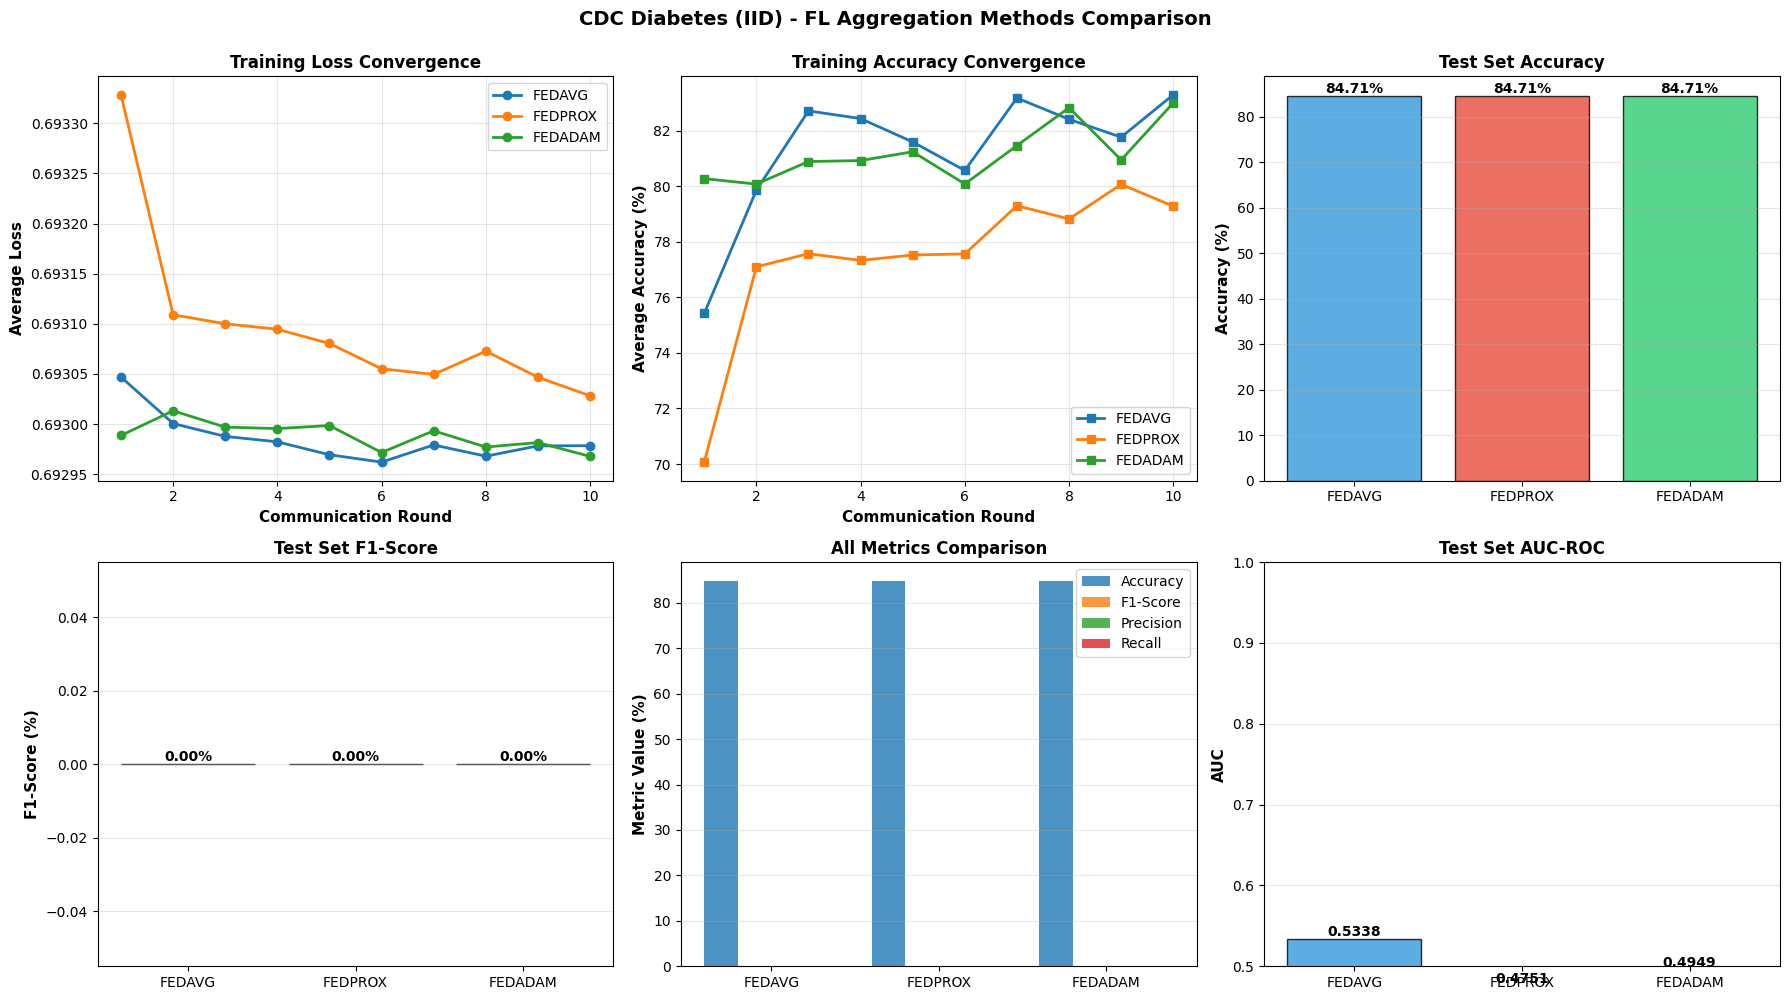

In [72]:
# Federated Learning with IID partitioning - CDC Diabetes
print("\n" + "="*70)
print("FEDERATED LEARNING - IID PARTITIONING - CDC DIABETES")
print("="*70)

# Partition data (IID)
client_data_diabetes_iid = partition_data_for_clients(
    X_train_diabetes_scaled, 
    y_train_diabetes, 
    num_clients=5, 
    partition_strategy='iid'
)

# Compare FL aggregation methods
fl_results_diabetes_iid, fl_models_diabetes_iid, fl_histories_diabetes_iid = compare_fl_aggregation_methods(
    client_data_diabetes_iid,
    test_loader_diabetes,
    input_size_diabetes,
    [128, 64, 32],
    class_weights_diabetes,
    aggregation_methods=['fedavg', 'fedprox', 'fedadam'],
    num_rounds=10,
    local_epochs=5,
    device=device,
    dataset_name='CDC Diabetes (IID)'
)

# Visualize results
plot_fl_comparison(fl_results_diabetes_iid, fl_histories_diabetes_iid, 'CDC Diabetes (IID)')


FEDERATED LEARNING - NON-IID PARTITIONING - CDC DIABETES

📊 Non-IID Partitioning: Dirichlet(α=0.5)

Client Data Distribution:
Client     Samples    Class 0    Class 1    % Class 0    % Class 1
----------------------------------------------------------------------
Client 1     18639      16883      1756       90.6       % 9.4%
Client 2     243        0          243        0.0        % 100.0%
Client 3     36925      14356      22569      38.9       % 61.1%
Client 4     67707      67707      0          100.0      % 0.0%
Client 5     37117      37117      0          100.0      % 0.0%
----------------------------------------------------------------------
Total: 160631 samples distributed across 5 clients


FL AGGREGATION METHOD COMPARISON - CDC Diabetes (Non-IID)


🔄 Training with FEDAVG

FEDERATED LEARNING - CDC Diabetes (Non-IID) - FEDAVG
Aggregation Method: FEDAVG
Clients: 5
Communication Rounds: 10
Local Epochs: 5
Batch Size: 64


🔄 Communication Round 1/10
----------------------------

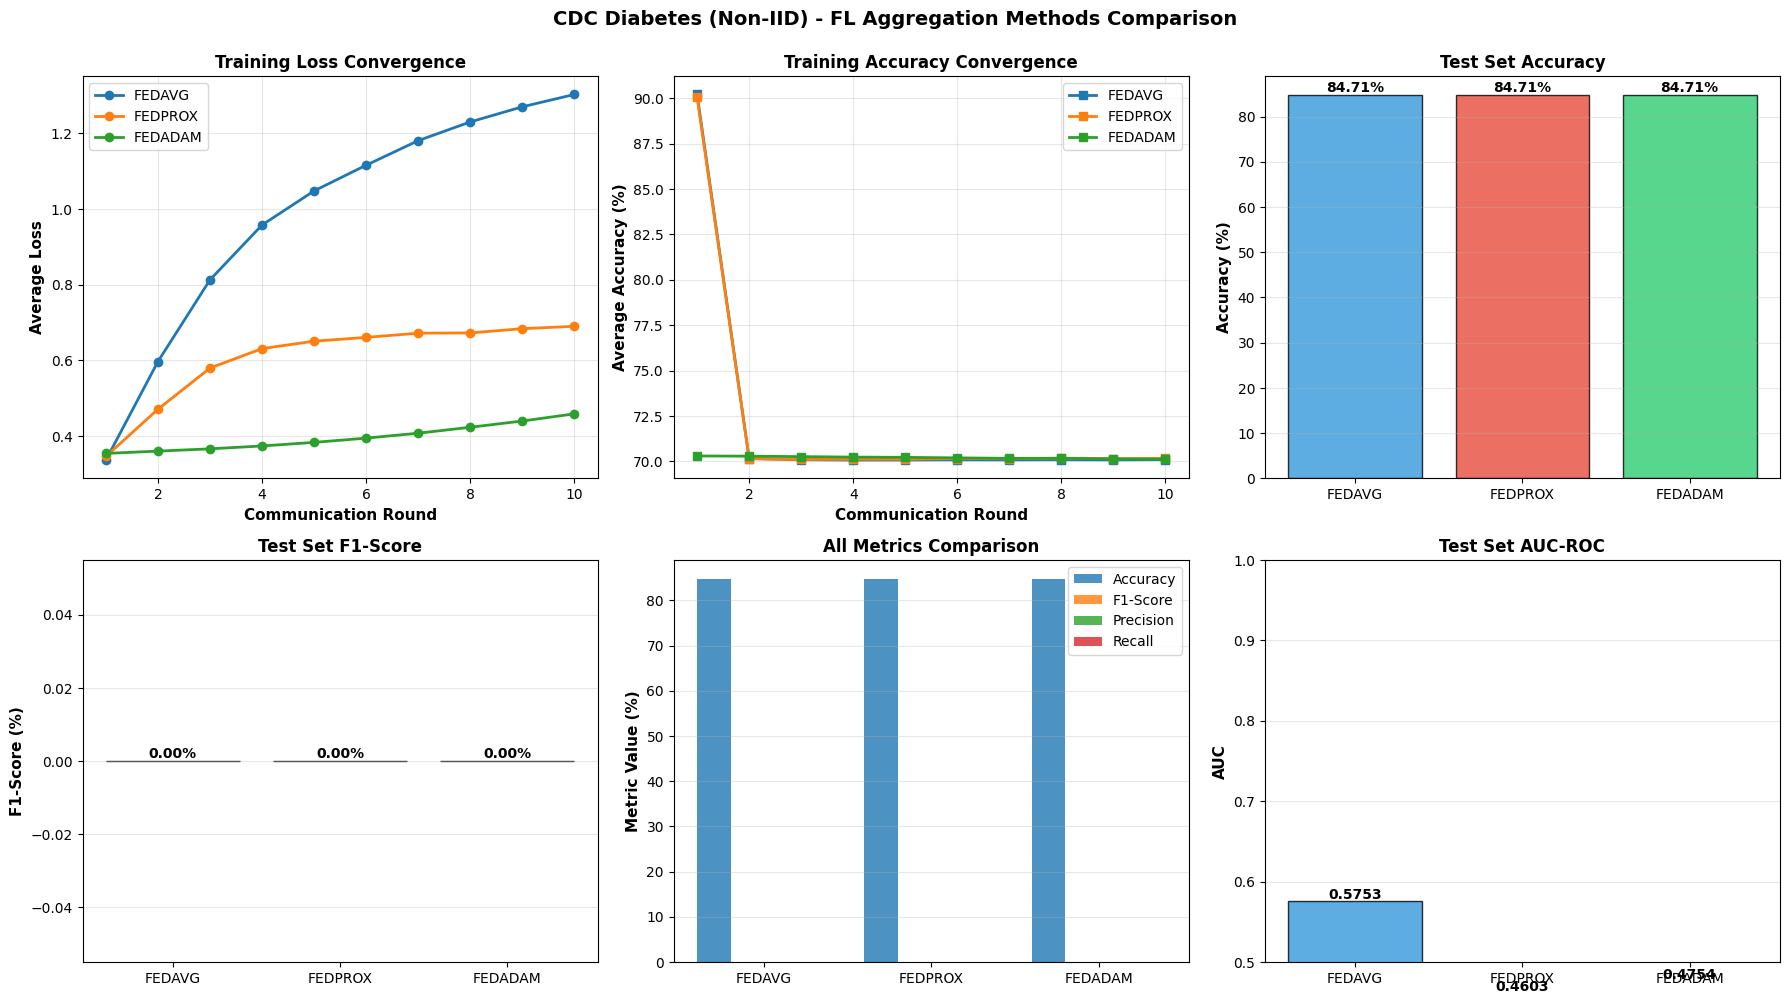

In [73]:
# Federated Learning with Non-IID partitioning - CDC Diabetes
print("\n" + "="*70)
print("FEDERATED LEARNING - NON-IID PARTITIONING - CDC DIABETES")
print("="*70)

# Partition data (Non-IID)
client_data_diabetes_noniid = partition_data_for_clients(
    X_train_diabetes_scaled, 
    y_train_diabetes, 
    num_clients=5, 
    partition_strategy='non_iid',
    alpha=0.5  # Lower alpha = more heterogeneous
)

# Compare FL aggregation methods
fl_results_diabetes_noniid, fl_models_diabetes_noniid, fl_histories_diabetes_noniid = compare_fl_aggregation_methods(
    client_data_diabetes_noniid,
    test_loader_diabetes,
    input_size_diabetes,
    [128, 64, 32],
    class_weights_diabetes,
    aggregation_methods=['fedavg', 'fedprox', 'fedadam'],
    num_rounds=10,
    local_epochs=5,
    device=device,
    dataset_name='CDC Diabetes (Non-IID)'
)

# Visualize results
plot_fl_comparison(fl_results_diabetes_noniid, fl_histories_diabetes_noniid, 'CDC Diabetes (Non-IID)')


FEDERATED LEARNING - IID PARTITIONING - ADULT INCOME

📊 IID Partitioning: Uniform random distribution

Client Data Distribution:
Client     Samples    Class 0    Class 1    % Class 0    % Class 1
----------------------------------------------------------------------
Client 1     6834       5178       1656       75.8       % 24.2%
Client 2     6834       5219       1615       76.4       % 23.6%
Client 3     6834       5198       1636       76.1       % 23.9%
Client 4     6833       5192       1641       76.0       % 24.0%
Client 5     6833       5202       1631       76.1       % 23.9%
----------------------------------------------------------------------
Total: 34168 samples distributed across 5 clients


FL AGGREGATION METHOD COMPARISON - Adult Income (IID)


🔄 Training with FEDAVG

FEDERATED LEARNING - Adult Income (IID) - FEDAVG
Aggregation Method: FEDAVG
Clients: 5
Communication Rounds: 10
Local Epochs: 5
Batch Size: 64


🔄 Communication Round 1/10
--------------------------------

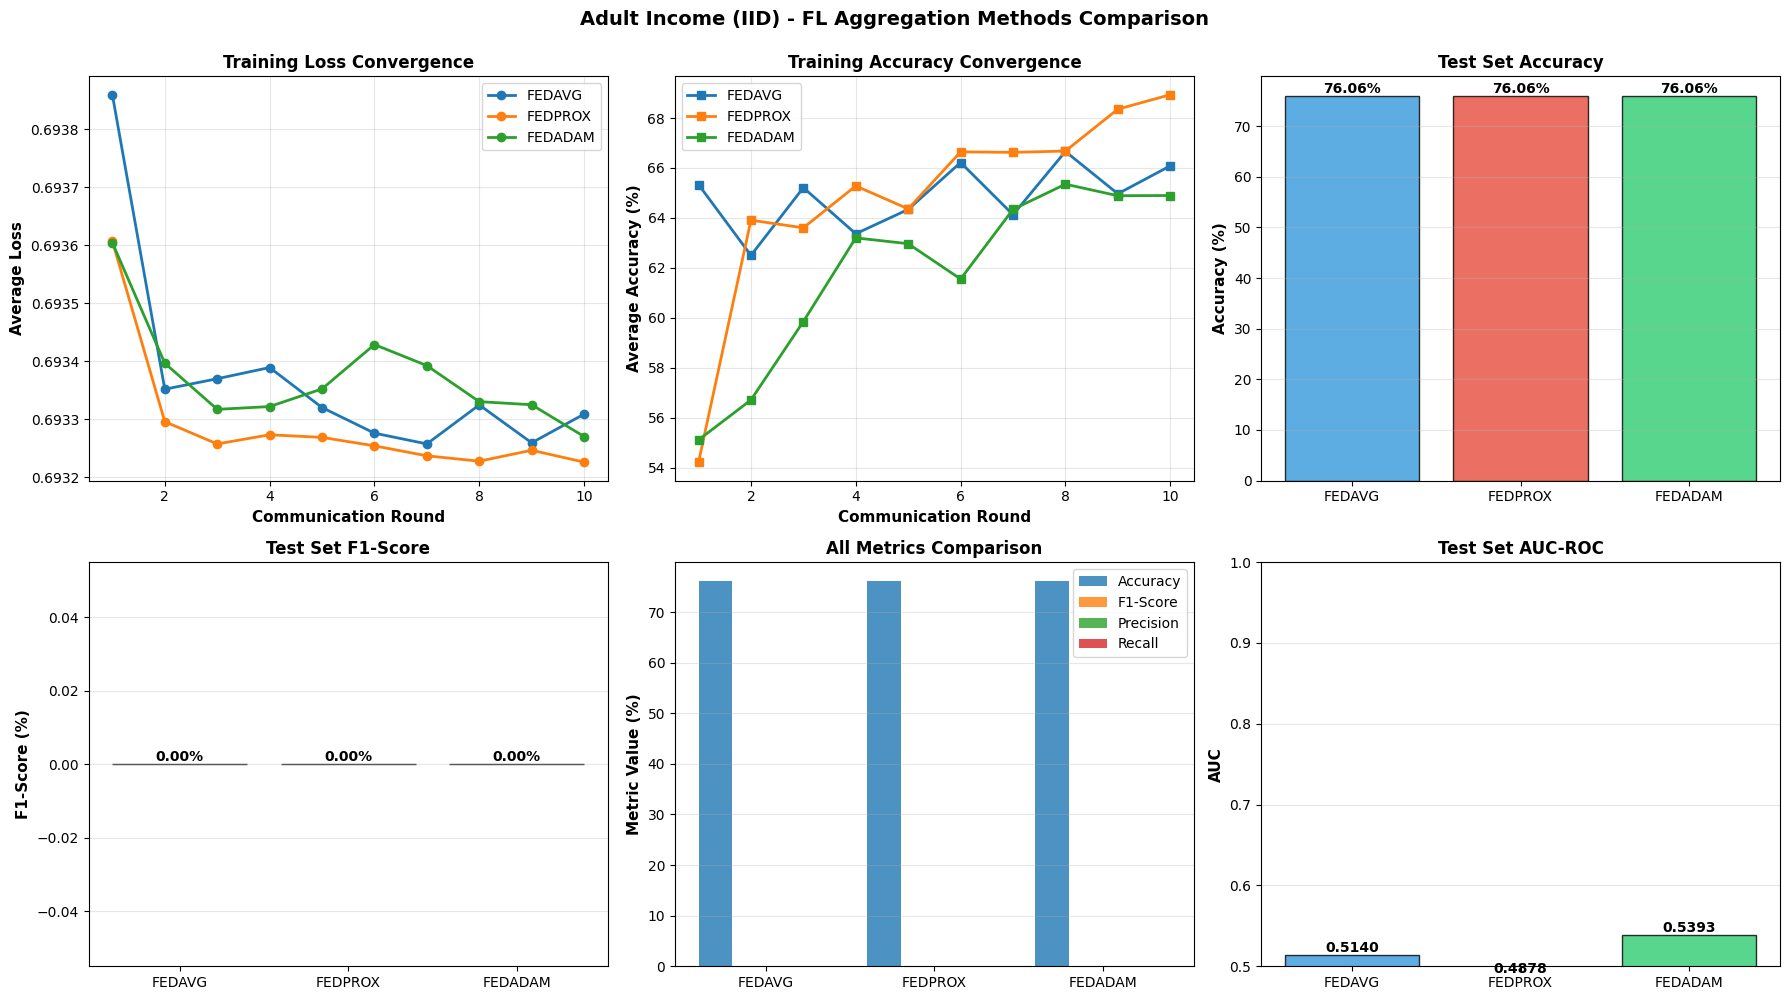


FEDERATED LEARNING - NON-IID PARTITIONING - ADULT INCOME

📊 Non-IID Partitioning: Dirichlet(α=0.5)

Client Data Distribution:
Client     Samples    Class 0    Class 1    % Class 0    % Class 1
----------------------------------------------------------------------
Client 1     7054       7054       0          100.0      % 0.0%
Client 2     3360       1545       1815       46.0       % 54.0%
Client 3     7066       1537       5529       21.8       % 78.2%
Client 4     5908       5073       835        85.9       % 14.1%
Client 5     10780      10780      0          100.0      % 0.0%
----------------------------------------------------------------------
Total: 34168 samples distributed across 5 clients


FL AGGREGATION METHOD COMPARISON - Adult Income (Non-IID)


🔄 Training with FEDAVG

FEDERATED LEARNING - Adult Income (Non-IID) - FEDAVG
Aggregation Method: FEDAVG
Clients: 5
Communication Rounds: 10
Local Epochs: 5
Batch Size: 64


🔄 Communication Round 1/10
-----------------------------

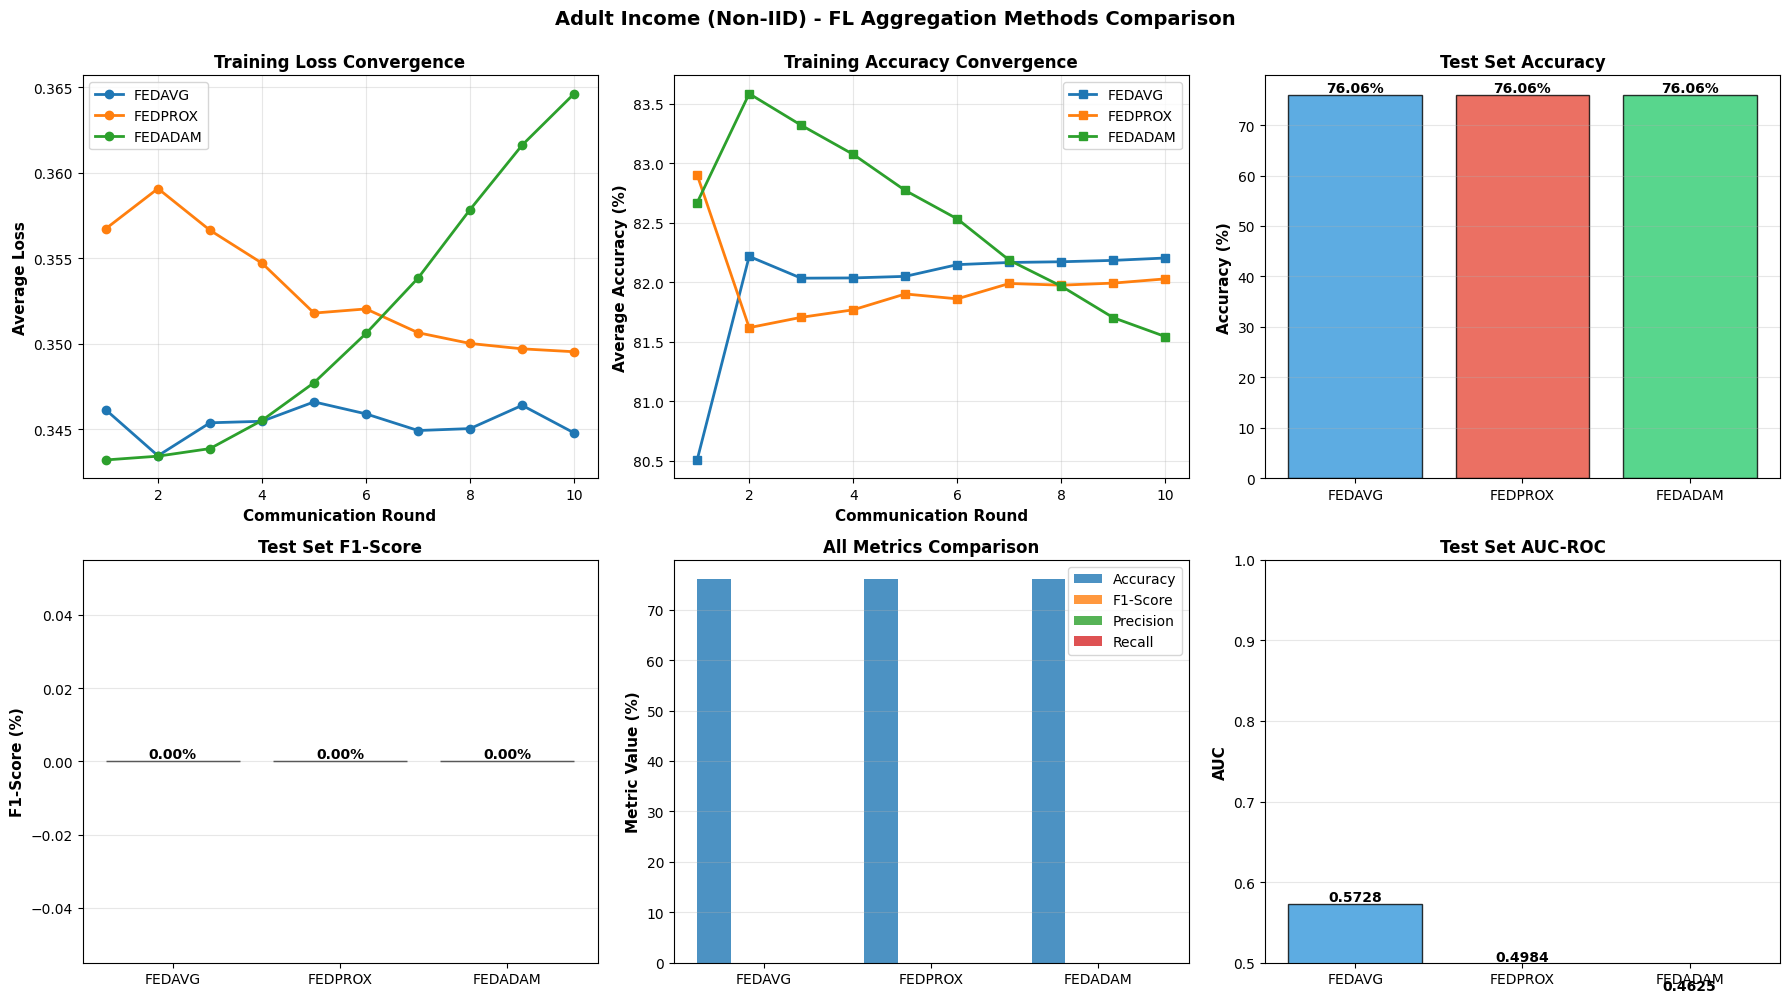

In [75]:
# Federated Learning - Adult Income (IID)
print("\n" + "="*70)
print("FEDERATED LEARNING - IID PARTITIONING - ADULT INCOME")
print("="*70)

client_data_adult_iid = partition_data_for_clients(
    X_train_adult_scaled, 
    y_train_adult, 
    num_clients=5, 
    partition_strategy='iid'
)

fl_results_adult_iid, fl_models_adult_iid, fl_histories_adult_iid = compare_fl_aggregation_methods(
    client_data_adult_iid,
    test_loader_adult,
    input_size_adult,
    [128, 64, 32],
    class_weights_adult,
    aggregation_methods=['fedavg', 'fedprox', 'fedadam'],
    num_rounds=10,
    local_epochs=5,
    device=device,
    dataset_name='Adult Income (IID)'
)

plot_fl_comparison(fl_results_adult_iid, fl_histories_adult_iid, 'Adult Income (IID)')

# Federated Learning - Adult Income (Non-IID)
print("\n" + "="*70)
print("FEDERATED LEARNING - NON-IID PARTITIONING - ADULT INCOME")
print("="*70)

client_data_adult_noniid = partition_data_for_clients(
    X_train_adult_scaled, 
    y_train_adult, 
    num_clients=5, 
    partition_strategy='non_iid',
    alpha=0.5
)

fl_results_adult_noniid, fl_models_adult_noniid, fl_histories_adult_noniid = compare_fl_aggregation_methods(
    client_data_adult_noniid,
    test_loader_adult,
    input_size_adult,
    [128, 64, 32],
    class_weights_adult,
    aggregation_methods=['fedavg', 'fedprox', 'fedadam'],
    num_rounds=10,
    local_epochs=5,
    device=device,
    dataset_name='Adult Income (Non-IID)'
)

plot_fl_comparison(fl_results_adult_noniid, fl_histories_adult_noniid, 'Adult Income (Non-IID)')


IID vs NON-IID COMPARISON - CDC Diabetes
 Method  IID_Accuracy  NonIID_Accuracy  IID_F1  NonIID_F1  IID_AUC  NonIID_AUC
 FEDAVG     84.706395        84.706395     0.0        0.0 0.533794    0.575329
FEDPROX     84.706395        84.706395     0.0        0.0 0.475121    0.460270
FEDADAM     84.706395        84.706395     0.0        0.0 0.494917    0.475409


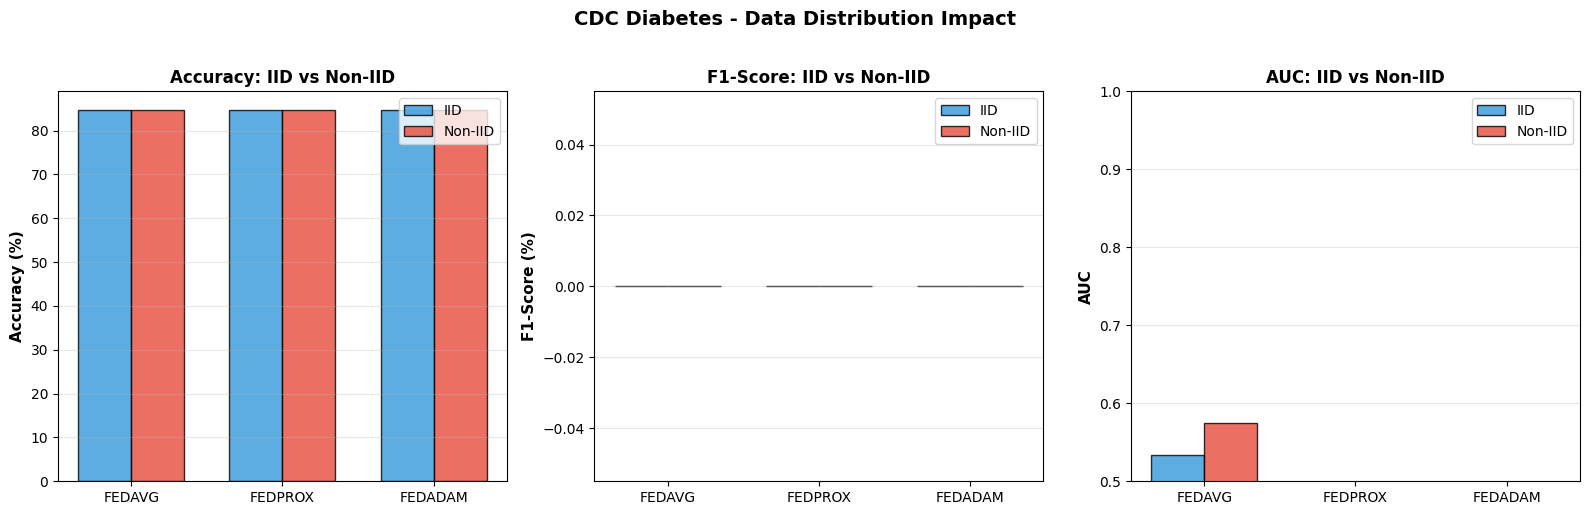


IID vs NON-IID COMPARISON - Adult Income
 Method  IID_Accuracy  NonIID_Accuracy  IID_F1  NonIID_F1  IID_AUC  NonIID_AUC
 FEDAVG     76.062686        76.062686     0.0        0.0 0.514037    0.572767
FEDPROX     76.062686        76.062686     0.0        0.0 0.487765    0.498447
FEDADAM     76.062686        76.062686     0.0        0.0 0.539283    0.462466


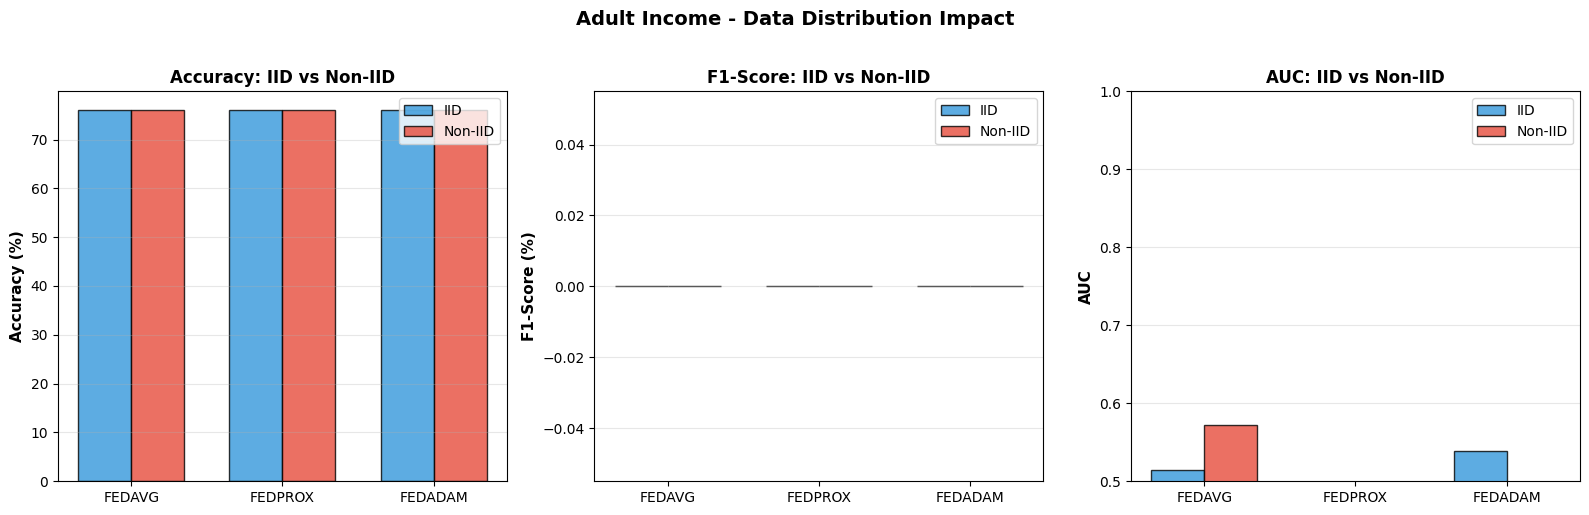

In [76]:
# Compare IID vs Non-IID data distribution effects
def compare_iid_vs_noniid(iid_results, noniid_results, dataset_name):
    """Compare performance between IID and Non-IID data distributions"""
    
    comparison = pd.DataFrame({
        'Method': iid_results['method'],
        'IID_Accuracy': iid_results['accuracy'],
        'NonIID_Accuracy': noniid_results['accuracy'],
        'IID_F1': iid_results['f1_score'],
        'NonIID_F1': noniid_results['f1_score'],
        'IID_AUC': iid_results['auc'],
        'NonIID_AUC': noniid_results['auc']
    })
    
    print(f"\n{'='*70}")
    print(f"IID vs NON-IID COMPARISON - {dataset_name}")
    print(f"{'='*70}")
    print(comparison.to_string(index=False))
    
    # Visualization
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    
    methods = comparison['Method']
    x = np.arange(len(methods))
    width = 0.35
    
    # Accuracy comparison
    ax1 = axes[0]
    bars1 = ax1.bar(x - width/2, comparison['IID_Accuracy'], width, 
                    label='IID', alpha=0.8, color='#3498db', edgecolor='black')
    bars2 = ax1.bar(x + width/2, comparison['NonIID_Accuracy'], width, 
                    label='Non-IID', alpha=0.8, color='#e74c3c', edgecolor='black')
    ax1.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
    ax1.set_title('Accuracy: IID vs Non-IID', fontsize=12, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(methods)
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    
    # F1-Score comparison
    ax2 = axes[1]
    ax2.bar(x - width/2, comparison['IID_F1'], width, 
            label='IID', alpha=0.8, color='#3498db', edgecolor='black')
    ax2.bar(x + width/2, comparison['NonIID_F1'], width, 
            label='Non-IID', alpha=0.8, color='#e74c3c', edgecolor='black')
    ax2.set_ylabel('F1-Score (%)', fontsize=11, fontweight='bold')
    ax2.set_title('F1-Score: IID vs Non-IID', fontsize=12, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(methods)
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    # AUC comparison
    ax3 = axes[2]
    ax3.bar(x - width/2, comparison['IID_AUC'], width, 
            label='IID', alpha=0.8, color='#3498db', edgecolor='black')
    ax3.bar(x + width/2, comparison['NonIID_AUC'], width, 
            label='Non-IID', alpha=0.8, color='#e74c3c', edgecolor='black')
    ax3.set_ylabel('AUC', fontsize=11, fontweight='bold')
    ax3.set_title('AUC: IID vs Non-IID', fontsize=12, fontweight='bold')
    ax3.set_xticks(x)
    ax3.set_xticklabels(methods)
    ax3.set_ylim([0.5, 1.0])
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    
    plt.suptitle(f'{dataset_name} - Data Distribution Impact', 
                 fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    return comparison

# Generate comparisons
comparison_diabetes = compare_iid_vs_noniid(
    fl_results_diabetes_iid, 
    fl_results_diabetes_noniid, 
    'CDC Diabetes'
)

comparison_adult = compare_iid_vs_noniid(
    fl_results_adult_iid, 
    fl_results_adult_noniid, 
    'Adult Income'
)


COMPREHENSIVE COMPARISON - ALL APPROACHES
     Dataset             Approach           Method  Accuracy  F1-Score      AUC               Privacy
CDC Diabetes             Baseline     Standard FNN 71.687548 45.709033 0.818987                  None
Adult Income             Baseline     Standard FNN 79.678378 67.260726 0.907795                  None
CDC Diabetes Differential Privacy   DP-SGD (ε=0.5) 84.706395  0.000000 0.483456                ε=0.49
Adult Income Differential Privacy   DP-SGD (ε=0.5) 76.062686  0.000000 0.443510                ε=0.49
CDC Diabetes   Federated Learning     FEDAVG (IID) 84.706395  0.000000 0.533794     Distributed (IID)
CDC Diabetes   Federated Learning FEDAVG (Non-IID) 84.706395  0.000000 0.575329 Distributed (Non-IID)
Adult Income   Federated Learning     FEDAVG (IID) 76.062686  0.000000 0.514037     Distributed (IID)
Adult Income   Federated Learning FEDAVG (Non-IID) 76.062686  0.000000 0.572767 Distributed (Non-IID)


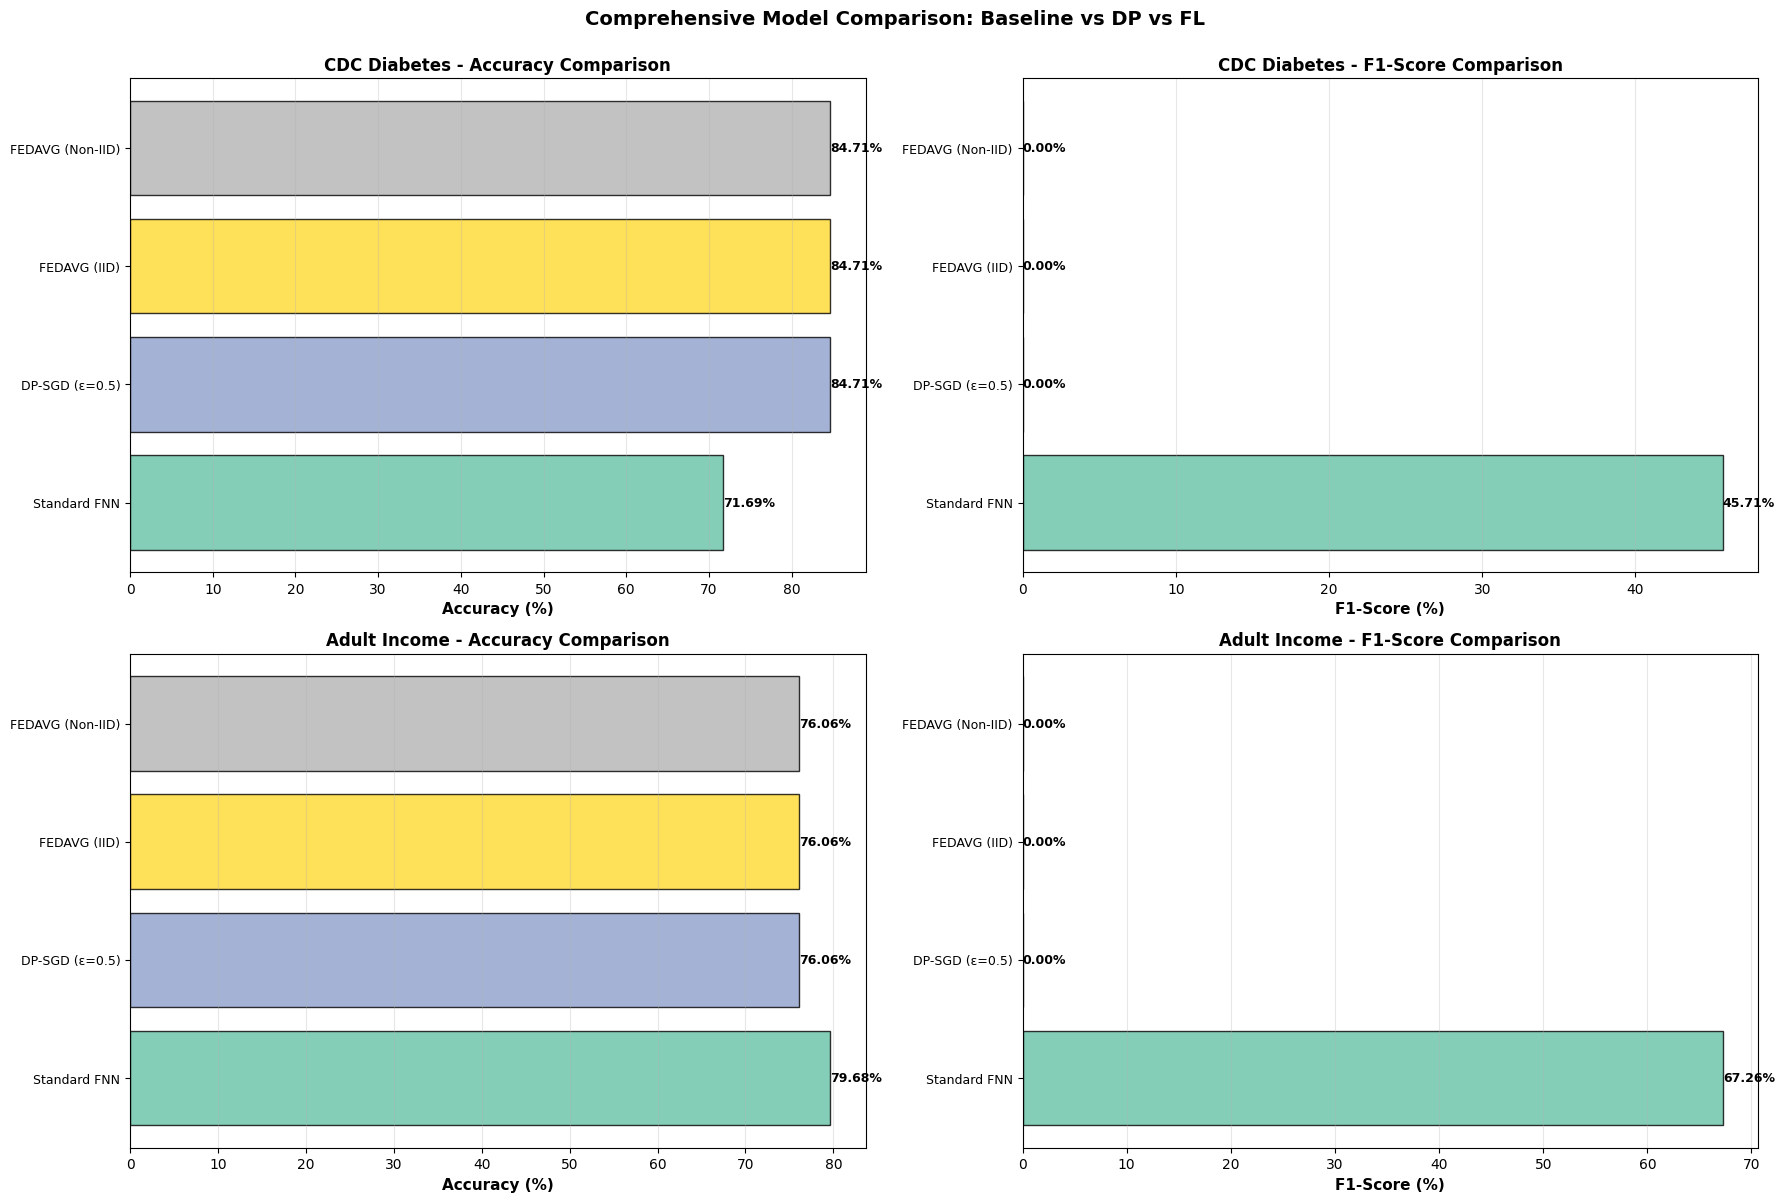

In [77]:
# Create comprehensive comparison of all approaches
def create_comprehensive_comparison():
    """Compare Baseline, DP, and FL approaches across both datasets"""
    
    # Collect all results
    comprehensive_results = []
    
    # Baseline results (from earlier cells)
    comprehensive_results.append({
        'Dataset': 'CDC Diabetes',
        'Approach': 'Baseline',
        'Method': 'Standard FNN',
        'Accuracy': metrics_diabetes['accuracy'] * 100,
        'F1-Score': metrics_diabetes['f1'] * 100,
        'AUC': auc_diabetes,
        'Privacy': 'None'
    })
    
    comprehensive_results.append({
        'Dataset': 'Adult Income',
        'Approach': 'Baseline',
        'Method': 'Standard FNN',
        'Accuracy': metrics_adult['accuracy'] * 100,
        'F1-Score': metrics_adult['f1'] * 100,
        'AUC': auc_adult,
        'Privacy': 'None'
    })
    
    # DP results (best epsilon for each dataset)
    best_dp_diabetes = dp_results_diabetes.loc[dp_results_diabetes['accuracy'].idxmax()]
    comprehensive_results.append({
        'Dataset': 'CDC Diabetes',
        'Approach': 'Differential Privacy',
        'Method': f'DP-SGD (ε={best_dp_diabetes["epsilon_target"]})',
        'Accuracy': best_dp_diabetes['accuracy'],
        'F1-Score': best_dp_diabetes['f1_score'],
        'AUC': best_dp_diabetes['auc'],
        'Privacy': f'ε={best_dp_diabetes["epsilon_final"]:.2f}'
    })
    
    best_dp_adult = dp_results_adult.loc[dp_results_adult['accuracy'].idxmax()]
    comprehensive_results.append({
        'Dataset': 'Adult Income',
        'Approach': 'Differential Privacy',
        'Method': f'DP-SGD (ε={best_dp_adult["epsilon_target"]})',
        'Accuracy': best_dp_adult['accuracy'],
        'F1-Score': best_dp_adult['f1_score'],
        'AUC': best_dp_adult['auc'],
        'Privacy': f'ε={best_dp_adult["epsilon_final"]:.2f}'
    })
    
    # FL results (best method for IID and Non-IID) - CDC Diabetes
    if 'fl_results_diabetes_iid' in globals() and 'fl_results_diabetes_noniid' in globals():
        for fl_res, partition in [(fl_results_diabetes_iid, 'IID'), 
                                   (fl_results_diabetes_noniid, 'Non-IID')]:
            best_fl = fl_res.loc[fl_res['accuracy'].idxmax()]
            comprehensive_results.append({
                'Dataset': 'CDC Diabetes',
                'Approach': 'Federated Learning',
                'Method': f'{best_fl["method"]} ({partition})',
                'Accuracy': best_fl['accuracy'],
                'F1-Score': best_fl['f1_score'],
                'AUC': best_fl['auc'],
                'Privacy': f'Distributed ({partition})'
            })
    else:
        print("⚠️ CDC Diabetes FL results not found - skipping FL comparison for this dataset")
    
    # FL results - Adult Income
    if 'fl_results_adult_iid' in globals() and 'fl_results_adult_noniid' in globals():
        for fl_res, partition in [(fl_results_adult_iid, 'IID'), 
                                   (fl_results_adult_noniid, 'Non-IID')]:
            best_fl = fl_res.loc[fl_res['accuracy'].idxmax()]
            comprehensive_results.append({
                'Dataset': 'Adult Income',
                'Approach': 'Federated Learning',
                'Method': f'{best_fl["method"]} ({partition})',
                'Accuracy': best_fl['accuracy'],
                'F1-Score': best_fl['f1_score'],
                'AUC': best_fl['auc'],
                'Privacy': f'Distributed ({partition})'
            })
    else:
        print("⚠️ Adult Income FL results not found - skipping FL comparison for this dataset")
    
    df_comprehensive = pd.DataFrame(comprehensive_results)
    
    print(f"\n{'='*80}")
    print(f"COMPREHENSIVE COMPARISON - ALL APPROACHES")
    print(f"{'='*80}")
    print(df_comprehensive.to_string(index=False))
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # Separate by dataset
    df_diabetes_comp = df_comprehensive[df_comprehensive['Dataset'] == 'CDC Diabetes']
    df_adult_comp = df_comprehensive[df_comprehensive['Dataset'] == 'Adult Income']
    
    # Generate dynamic colors based on number of methods
    colors_diabetes = plt.cm.Set2(np.linspace(0, 1, len(df_diabetes_comp)))
    colors_adult = plt.cm.Set2(np.linspace(0, 1, len(df_adult_comp)))
    
    # Plot 1: CDC Diabetes - Accuracy
    ax1 = axes[0, 0]
    bars = ax1.barh(range(len(df_diabetes_comp)), df_diabetes_comp['Accuracy'], 
                    color=colors_diabetes, alpha=0.8, edgecolor='black')
    ax1.set_yticks(range(len(df_diabetes_comp)))
    ax1.set_yticklabels(df_diabetes_comp['Method'], fontsize=9)
    ax1.set_xlabel('Accuracy (%)', fontsize=11, fontweight='bold')
    ax1.set_title('CDC Diabetes - Accuracy Comparison', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='x')
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax1.text(width, bar.get_y() + bar.get_height()/2.,
                f'{width:.2f}%', ha='left', va='center', fontweight='bold', fontsize=9)
    
    # Plot 2: CDC Diabetes - F1-Score
    ax2 = axes[0, 1]
    bars = ax2.barh(range(len(df_diabetes_comp)), df_diabetes_comp['F1-Score'], 
                    color=colors_diabetes, alpha=0.8, edgecolor='black')
    ax2.set_yticks(range(len(df_diabetes_comp)))
    ax2.set_yticklabels(df_diabetes_comp['Method'], fontsize=9)
    ax2.set_xlabel('F1-Score (%)', fontsize=11, fontweight='bold')
    ax2.set_title('CDC Diabetes - F1-Score Comparison', fontsize=12, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='x')
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax2.text(width, bar.get_y() + bar.get_height()/2.,
                f'{width:.2f}%', ha='left', va='center', fontweight='bold', fontsize=9)
    
    # Plot 3: Adult Income - Accuracy
    ax3 = axes[1, 0]
    bars = ax3.barh(range(len(df_adult_comp)), df_adult_comp['Accuracy'], 
                    color=colors_adult, alpha=0.8, edgecolor='black')
    ax3.set_yticks(range(len(df_adult_comp)))
    ax3.set_yticklabels(df_adult_comp['Method'], fontsize=9)
    ax3.set_xlabel('Accuracy (%)', fontsize=11, fontweight='bold')
    ax3.set_title('Adult Income - Accuracy Comparison', fontsize=12, fontweight='bold')
    ax3.grid(True, alpha=0.3, axis='x')
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax3.text(width, bar.get_y() + bar.get_height()/2.,
                f'{width:.2f}%', ha='left', va='center', fontweight='bold', fontsize=9)
    
    # Plot 4: Adult Income - F1-Score
    ax4 = axes[1, 1]
    bars = ax4.barh(range(len(df_adult_comp)), df_adult_comp['F1-Score'], 
                    color=colors_adult, alpha=0.8, edgecolor='black')
    ax4.set_yticks(range(len(df_adult_comp)))
    ax4.set_yticklabels(df_adult_comp['Method'], fontsize=9)
    ax4.set_xlabel('F1-Score (%)', fontsize=11, fontweight='bold')
    ax4.set_title('Adult Income - F1-Score Comparison', fontsize=12, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='x')
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax4.text(width, bar.get_y() + bar.get_height()/2.,
                f'{width:.2f}%', ha='left', va='center', fontweight='bold', fontsize=9)
    
    plt.suptitle('Comprehensive Model Comparison: Baseline vs DP vs FL', 
                 fontsize=14, fontweight='bold', y=0.998)
    plt.tight_layout()
    plt.show()
    
    return df_comprehensive

# Generate comprehensive comparison
final_comparison = create_comprehensive_comparison()

## Diagnostic: Investigate F1-Score Issues

In [78]:
# Diagnostic: Check model predictions to see why F1-scores are 0
print("DIAGNOSTIC: Checking model predictions\n")
print("="*70)

# Check DP results
print("\n1. DIFFERENTIAL PRIVACY RESULTS:")
print("-"*70)
print(dp_results_diabetes[['epsilon_target', 'accuracy', 'f1_score', 'precision', 'recall']])

print("\n2. FEDERATED LEARNING RESULTS (CDC Diabetes - IID):")
print("-"*70)
print(fl_results_diabetes_iid[['method', 'accuracy', 'f1_score', 'precision', 'recall']])

print("\n3. FEDERATED LEARNING RESULTS (CDC Diabetes - Non-IID):")
print("-"*70)
print(fl_results_diabetes_noniid[['method', 'accuracy', 'f1_score', 'precision', 'recall']])

# Test one of the DP models to see actual predictions
print("\n4. TESTING DP MODEL PREDICTIONS:")
print("-"*70)
best_epsilon = dp_results_diabetes.loc[dp_results_diabetes['accuracy'].idxmax(), 'epsilon_target']
test_model = dp_models_diabetes[f'epsilon_{best_epsilon}']

predictions, labels, probs = evaluate_model(test_model, test_loader_diabetes, device)

print(f"\nUnique predictions: {np.unique(predictions)}")
print(f"Unique labels: {np.unique(labels)}")
print(f"Prediction distribution:")
unique, counts = np.unique(predictions, return_counts=True)
for u, c in zip(unique, counts):
    print(f"   Class {u}: {c} ({c/len(predictions)*100:.2f}%)")

print(f"\nLabel distribution:")
unique, counts = np.unique(labels, return_counts=True)
for u, c in zip(unique, counts):
    print(f"   Class {u}: {c} ({c/len(labels)*100:.2f}%)")

# Check if all predictions are the same class
if len(np.unique(predictions)) == 1:
    print(f"\n⚠️ WARNING: Model is predicting only class {predictions[0]}!")
    print("   This causes F1-score = 0 for the minority class.")
    print("   Possible causes:")
    print("   - Privacy noise is too strong (epsilon too low)")
    print("   - Model collapsed during training")
    print("   - Class imbalance issue")
    
# Test one of the FL models
print("\n5. TESTING FL MODEL PREDICTIONS (FEDAVG - IID):")
print("-"*70)
test_fl_model = fl_models_diabetes_iid['fedavg']

predictions_fl, labels_fl, probs_fl = evaluate_model(test_fl_model, test_loader_diabetes, device)

print(f"\nUnique predictions: {np.unique(predictions_fl)}")
print(f"Prediction distribution:")
unique, counts = np.unique(predictions_fl, return_counts=True)
for u, c in zip(unique, counts):
    print(f"   Class {u}: {c} ({c/len(predictions_fl)*100:.2f}%)")

if len(np.unique(predictions_fl)) == 1:
    print(f"\n⚠️ WARNING: FL Model is predicting only class {predictions_fl[0]}!")

DIAGNOSTIC: Checking model predictions


1. DIFFERENTIAL PRIVACY RESULTS:
----------------------------------------------------------------------
   epsilon_target   accuracy  f1_score  precision  recall
0             0.5  84.706395       0.0        0.0     0.0
1             1.0  84.706395       0.0        0.0     0.0
2             3.0  84.706395       0.0        0.0     0.0
3            10.0  84.706395       0.0        0.0     0.0

2. FEDERATED LEARNING RESULTS (CDC Diabetes - IID):
----------------------------------------------------------------------
    method   accuracy  f1_score  precision  recall
0   FEDAVG  84.706395       0.0        0.0     0.0
1  FEDPROX  84.706395       0.0        0.0     0.0
2  FEDADAM  84.706395       0.0        0.0     0.0

3. FEDERATED LEARNING RESULTS (CDC Diabetes - Non-IID):
----------------------------------------------------------------------
    method   accuracy  f1_score  precision  recall
0   FEDAVG  84.706395       0.0        0.0     0.0
1  FEDP

## Fix: Improved Training with Better Class Balance Handling

In [79]:
# FIX: Enhanced training functions with stronger class weight handling and focal loss option

# Option 1: Use Focal Loss for severe class imbalance
class FocalLoss(nn.Module):
    """Focal Loss for handling severe class imbalance"""
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha  # Class weights
        self.gamma = gamma  # Focusing parameter
        self.reduction = reduction
    
    def forward(self, inputs, targets):
        ce_loss = nn.CrossEntropyLoss(weight=self.alpha, reduction='none')(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss
        
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

print("✓ Focal Loss class defined")

# Enhanced DP training with focal loss
def train_model_with_dp_enhanced(model, train_loader, val_loader, class_weights,
                                target_epsilon=3.0, delta=1e-5, max_grad_norm=1.0,
                                epochs=50, learning_rate=0.001, device='cpu',
                                use_focal_loss=True, focal_gamma=2.0):
    """Enhanced DP training with focal loss and better monitoring"""
    model = model.to(device)
    
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Use Focal Loss for better class balance
    weight_tensor = torch.FloatTensor([class_weights[0], class_weights[1]]).to(device)
    if use_focal_loss:
        criterion = FocalLoss(alpha=weight_tensor, gamma=focal_gamma)
        print(f"Using Focal Loss (γ={focal_gamma}) for class imbalance")
    else:
        criterion = nn.CrossEntropyLoss(weight=weight_tensor)
    
    # Make model private
    privacy_engine = PrivacyEngine()
    
    model, optimizer, train_loader = privacy_engine.make_private_with_epsilon(
        module=model,
        optimizer=optimizer,
        data_loader=train_loader,
        epochs=epochs,
        target_epsilon=target_epsilon,
        target_delta=delta,
        max_grad_norm=max_grad_norm,
    )
    
    print(f"\n🔒 Enhanced DP-SGD Training")
    print(f"  Target ε: {target_epsilon}")
    print(f"  Noise Multiplier: {optimizer.noise_multiplier:.4f}")
    print(f"  Class Weights: {class_weights}\n")
    
    history = {
        'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': [],
        'epsilon_spent': [], 'train_predictions': []
    }
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        epoch_predictions = []
        
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total += batch_y.size(0)
            train_correct += (predicted == batch_y).sum().item()
            epoch_predictions.extend(predicted.cpu().numpy())
        
        # Check prediction diversity
        unique_preds = np.unique(epoch_predictions)
        
        epsilon = privacy_engine.get_epsilon(delta)
        
        # Validation
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                loss = criterion(outputs, batch_y)
                
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                val_total += batch_y.size(0)
                val_correct += (predicted == batch_y).sum().item()
        
        avg_train_loss = train_loss / len(train_loader)
        avg_val_loss = val_loss / len(val_loader)
        train_acc = 100 * train_correct / train_total
        val_acc = 100 * val_correct / val_total
        
        history['train_loss'].append(avg_train_loss)
        history['val_loss'].append(avg_val_loss)
        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)
        history['epsilon_spent'].append(epsilon)
        history['train_predictions'].append(len(unique_preds))
        
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}] - "
                  f"Loss: {avg_train_loss:.4f}, Acc: {train_acc:.2f}% | "
                  f"Val: {avg_val_loss:.4f}, {val_acc:.2f}% | "
                  f"ε: {epsilon:.2f} | Predicting {len(unique_preds)} classes")
        
        if epsilon > target_epsilon * 1.1:
            print(f"\n⚠️ Privacy budget exceeded at epoch {epoch+1}")
            break
    
    final_epsilon = privacy_engine.get_epsilon(delta)
    print(f"\n✓ Training Complete! Final ε: {final_epsilon:.4f}")
    
    return model, history, privacy_engine

print("✓ Enhanced DP training function defined")

✓ Focal Loss class defined
✓ Enhanced DP training function defined


In [80]:
# Enhanced FL training with focal loss
def train_federated_model_enhanced(client_data, input_size, hidden_sizes, 
                                   class_weights, aggregation_method='fedavg',
                                   num_rounds=15, local_epochs=10, 
                                   learning_rate=0.003, batch_size=64,
                                   mu_proximal=0.01, device='cpu',
                                   use_focal_loss=True, focal_gamma=2.0,
                                   dataset_name='Dataset'):
    """Enhanced FL training with focal loss and better monitoring"""
    num_clients = len(client_data)
    
    print(f"\n{'='*70}")
    print(f"ENHANCED FEDERATED LEARNING - {dataset_name}")
    print(f"{'='*70}")
    print(f"Aggregation: {aggregation_method.upper()}")
    print(f"Clients: {num_clients}")
    print(f"Rounds: {num_rounds}, Local Epochs: {local_epochs}")
    print(f"Focal Loss: {use_focal_loss}, γ={focal_gamma}\n")
    
    global_model = FeedforwardNN_DP(input_size, hidden_sizes, output_size=2, dropout_rate=0.3)
    global_model = global_model.to(device)
    global_state_dict = global_model.state_dict()
    
    momentum_dict = {}
    velocity_dict = {}
    
    history = {
        'rounds': [], 'avg_train_loss': [], 'avg_train_acc': [],
        'client_losses': [], 'client_accs': [], 'prediction_diversity': []
    }
    
    weight_tensor = torch.FloatTensor([class_weights[0], class_weights[1]]).to(device)
    if use_focal_loss:
        criterion = FocalLoss(alpha=weight_tensor, gamma=focal_gamma)
    else:
        criterion = nn.CrossEntropyLoss(weight=weight_tensor)
    
    for round_num in range(1, num_rounds + 1):
        print(f"\n🔄 Round {round_num}/{num_rounds}")
        print("-" * 50)
        
        client_models = []
        round_losses = []
        round_accs = []
        round_predictions = []
        
        for client_id, (X_client, y_client) in enumerate(client_data):
            client_model = FeedforwardNN_DP(input_size, hidden_sizes, output_size=2, dropout_rate=0.3)
            client_model.load_state_dict(global_state_dict)
            client_model = client_model.to(device)
            
            X_tensor = torch.FloatTensor(X_client)
            y_tensor = torch.LongTensor(y_client.astype(np.int64) if hasattr(y_client, 'astype') else y_client)
            client_dataset = TensorDataset(X_tensor, y_tensor)
            client_loader = DataLoader(client_dataset, batch_size=batch_size, shuffle=True)
            
            optimizer = optim.Adam(client_model.parameters(), lr=learning_rate)
            client_model.train()
            
            epoch_loss = 0.0
            epoch_correct = 0
            epoch_total = 0
            client_predictions = []
            
            for epoch in range(local_epochs):
                for batch_X, batch_y in client_loader:
                    batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                    
                    optimizer.zero_grad()
                    outputs = client_model(batch_X)
                    loss = criterion(outputs, batch_y)
                    
                    if aggregation_method == 'fedprox':
                        proximal_term = 0.0
                        for local_param, global_param in zip(client_model.parameters(), 
                                                             global_model.parameters()):
                            proximal_term += ((local_param - global_param) ** 2).sum()
                        loss += (mu_proximal / 2) * proximal_term
                    
                    loss.backward()
                    optimizer.step()
                    
                    epoch_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    epoch_total += batch_y.size(0)
                    epoch_correct += (predicted == batch_y).sum().item()
                    client_predictions.extend(predicted.cpu().numpy())
            
            avg_loss = epoch_loss / (len(client_loader) * local_epochs)
            accuracy = 100 * epoch_correct / epoch_total
            unique_preds = len(np.unique(client_predictions))
            
            round_losses.append(avg_loss)
            round_accs.append(accuracy)
            round_predictions.append(unique_preds)
            
            print(f"  Client {client_id + 1}: Loss={avg_loss:.4f}, Acc={accuracy:.2f}%, Classes={unique_preds}")
            
            client_models.append(client_model.state_dict())
        
        # Aggregate
        print(f"\n  Aggregating with {aggregation_method.upper()}...")
        
        if aggregation_method == 'fedavg':
            global_state_dict = federated_averaging(client_models)
        elif aggregation_method == 'fedprox':
            global_state_dict = federated_proximal(client_models, global_state_dict, mu=mu_proximal)
        elif aggregation_method == 'fedadam':
            global_state_dict, momentum_dict, velocity_dict = federated_adam(
                client_models, global_state_dict, momentum_dict, velocity_dict,
                beta1=0.9, beta2=0.999, learning_rate=0.01, round_num=round_num
            )
        
        global_model.load_state_dict(global_state_dict)
        
        avg_round_loss = np.mean(round_losses)
        avg_round_acc = np.mean(round_accs)
        avg_pred_diversity = np.mean(round_predictions)
        
        history['rounds'].append(round_num)
        history['avg_train_loss'].append(avg_round_loss)
        history['avg_train_acc'].append(avg_round_acc)
        history['client_losses'].append(round_losses)
        history['client_accs'].append(round_accs)
        history['prediction_diversity'].append(avg_pred_diversity)
        
        print(f"\n  Round Summary: Loss={avg_round_loss:.4f}, Acc={avg_round_acc:.2f}%, "
              f"Avg Classes Predicted={avg_pred_diversity:.1f}")
    
    print(f"\n{'='*70}")
    print(f"✓ Federated Learning Complete!")
    print(f"{'='*70}\n")
    
    return global_model, history

print("✓ Enhanced FL training function defined")

✓ Enhanced FL training function defined


## Re-train Models with Enhanced Configuration

In [81]:
# Re-train DP models with enhanced settings (higher epsilon, focal loss, more epochs)
print("RE-TRAINING DIFFERENTIAL PRIVACY MODELS WITH ENHANCED SETTINGS")
print("="*70)

# Use higher epsilon values and focal loss
enhanced_dp_results = []
enhanced_dp_models = {}

for epsilon in [1.0, 3.0, 5.0, 10.0]:
    print(f"\n🔒 Training DP model with ε={epsilon}, Focal Loss γ=2.0")
    print("-" * 50)
    
    model = FeedforwardNN_DP(input_size_diabetes, [128, 64, 32], output_size=2, dropout_rate=0.3)
    
    model_trained, history, privacy_engine = train_model_with_dp_enhanced(
        model, train_loader_diabetes, val_loader_diabetes, class_weights_diabetes,
        target_epsilon=epsilon,
        delta=1e-5,
        max_grad_norm=1.0,
        epochs=40,  # More epochs
        learning_rate=0.003,  # Higher learning rate
        device=device,
        use_focal_loss=True,
        focal_gamma=2.0
    )
    
    # Evaluate
    predictions, labels, probs = evaluate_model(model_trained, test_loader_diabetes, device)
    
    from sklearn.metrics import roc_auc_score
    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    precision = precision_score(labels, predictions, zero_division=0)
    recall = recall_score(labels, predictions, zero_division=0)
    
    # Check if model predicts both classes
    unique_preds = np.unique(predictions)
    print(f"\n  Model predicts {len(unique_preds)} classes: {unique_preds}")
    
    if len(unique_preds) > 1:
        auc_score = roc_auc_score(labels, probs[:, 1])
    else:
        auc_score = 0.5
        print(f"  ⚠️ Only one class predicted, AUC set to 0.5")
    
    final_epsilon = privacy_engine.get_epsilon(1e-5)
    
    enhanced_dp_results.append({
        'epsilon_target': epsilon,
        'epsilon_final': final_epsilon,
        'accuracy': accuracy * 100,
        'f1_score': f1 * 100,
        'precision': precision * 100,
        'recall': recall * 100,
        'auc': auc_score
    })
    
    enhanced_dp_models[f'epsilon_{epsilon}'] = model_trained

enhanced_dp_results_df = pd.DataFrame(enhanced_dp_results)

print(f"\n{'='*70}")
print("ENHANCED DP RESULTS")
print(f"{'='*70}")
print(enhanced_dp_results_df.to_string(index=False))

RE-TRAINING DIFFERENTIAL PRIVACY MODELS WITH ENHANCED SETTINGS

🔒 Training DP model with ε=1.0, Focal Loss γ=2.0
--------------------------------------------------
Using Focal Loss (γ=2.0) for class imbalance


12/09/2025 14:52:43:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 Enhanced DP-SGD Training
  Target ε: 1.0
  Noise Multiplier: 0.7812
  Class Weights: {np.int64(0): np.float64(0.5902817077383271), np.int64(1): np.float64(3.269110224682514)}

Epoch [10/40] - Loss: 0.3585, Acc: 83.03% | Val: 0.3476, 84.70% | ε: 0.49 | Predicting 2 classes
Epoch [10/40] - Loss: 0.3585, Acc: 83.03% | Val: 0.3476, 84.70% | ε: 0.49 | Predicting 2 classes
Epoch [20/40] - Loss: 0.4480, Acc: 84.68% | Val: 0.4464, 84.70% | ε: 0.70 | Predicting 2 classes
Epoch [20/40] - Loss: 0.4480, Acc: 84.68% | Val: 0.4464, 84.70% | ε: 0.70 | Predicting 2 classes
Epoch [30/40] - Loss: 0.3935, Acc: 84.61% | Val: 0.3735, 84.70% | ε: 0.86 | Predicting 2 classes
Epoch [30/40] - Loss: 0.3935, Acc: 84.61% | Val: 0.3735, 84.70% | ε: 0.86 | Predicting 2 classes
Epoch [40/40] - Loss: 0.3966, Acc: 84.35% | Val: 0.3623, 84.70% | ε: 1.00 | Predicting 2 classes
Epoch [40/40] - Loss: 0.3966, Acc: 84.35% | Val: 0.3623, 84.70% | ε: 1.00 | Predicting 2 classes

✓ Training Complete! Final ε: 0.9961

✓ Trai

12/09/2025 15:11:26:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 Enhanced DP-SGD Training
  Target ε: 3.0
  Noise Multiplier: 0.5707
  Class Weights: {np.int64(0): np.float64(0.5902817077383271), np.int64(1): np.float64(3.269110224682514)}

Epoch [10/40] - Loss: 0.3943, Acc: 84.51% | Val: 0.4001, 84.70% | ε: 1.97 | Predicting 2 classes
Epoch [10/40] - Loss: 0.3943, Acc: 84.51% | Val: 0.4001, 84.70% | ε: 1.97 | Predicting 2 classes
Epoch [20/40] - Loss: 0.3822, Acc: 84.45% | Val: 0.3662, 84.70% | ε: 2.38 | Predicting 2 classes
Epoch [20/40] - Loss: 0.3822, Acc: 84.45% | Val: 0.3662, 84.70% | ε: 2.38 | Predicting 2 classes
Epoch [30/40] - Loss: 0.4145, Acc: 84.72% | Val: 0.4071, 84.70% | ε: 2.70 | Predicting 2 classes
Epoch [30/40] - Loss: 0.4145, Acc: 84.72% | Val: 0.4071, 84.70% | ε: 2.70 | Predicting 2 classes
Epoch [40/40] - Loss: 0.4670, Acc: 84.60% | Val: 0.4922, 84.70% | ε: 2.99 | Predicting 1 classes
Epoch [40/40] - Loss: 0.4670, Acc: 84.60% | Val: 0.4922, 84.70% | ε: 2.99 | Predicting 1 classes

✓ Training Complete! Final ε: 2.9937

✓ Trai

12/09/2025 15:30:41:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 Enhanced DP-SGD Training
  Target ε: 5.0
  Noise Multiplier: 0.5103
  Class Weights: {np.int64(0): np.float64(0.5902817077383271), np.int64(1): np.float64(3.269110224682514)}

Epoch [10/40] - Loss: 0.3633, Acc: 83.45% | Val: 0.3493, 84.70% | ε: 3.35 | Predicting 2 classes
Epoch [10/40] - Loss: 0.3633, Acc: 83.45% | Val: 0.3493, 84.70% | ε: 3.35 | Predicting 2 classes
Epoch [20/40] - Loss: 0.3618, Acc: 83.40% | Val: 0.3632, 84.70% | ε: 4.00 | Predicting 2 classes
Epoch [20/40] - Loss: 0.3618, Acc: 83.40% | Val: 0.3632, 84.70% | ε: 4.00 | Predicting 2 classes
Epoch [30/40] - Loss: 0.4127, Acc: 84.87% | Val: 0.3967, 84.70% | ε: 4.52 | Predicting 2 classes
Epoch [30/40] - Loss: 0.4127, Acc: 84.87% | Val: 0.3967, 84.70% | ε: 4.52 | Predicting 2 classes
Epoch [40/40] - Loss: 0.3931, Acc: 84.72% | Val: 0.4030, 84.70% | ε: 4.99 | Predicting 2 classes
Epoch [40/40] - Loss: 0.3931, Acc: 84.72% | Val: 0.4030, 84.70% | ε: 4.99 | Predicting 2 classes

✓ Training Complete! Final ε: 4.9911

✓ Trai

12/09/2025 15:50:29:WARNING:Ignoring drop_last as it is not compatible with DPDataLoader.



🔒 Enhanced DP-SGD Training
  Target ε: 10.0
  Noise Multiplier: 0.4401
  Class Weights: {np.int64(0): np.float64(0.5902817077383271), np.int64(1): np.float64(3.269110224682514)}

Epoch [10/40] - Loss: 0.3440, Acc: 79.37% | Val: 0.3367, 84.70% | ε: 6.32 | Predicting 2 classes
Epoch [10/40] - Loss: 0.3440, Acc: 79.37% | Val: 0.3367, 84.70% | ε: 6.32 | Predicting 2 classes
Epoch [20/40] - Loss: 0.3628, Acc: 82.60% | Val: 0.3586, 84.70% | ε: 7.77 | Predicting 2 classes
Epoch [20/40] - Loss: 0.3628, Acc: 82.60% | Val: 0.3586, 84.70% | ε: 7.77 | Predicting 2 classes
Epoch [30/40] - Loss: 0.3405, Acc: 75.83% | Val: 0.3267, 84.70% | ε: 8.95 | Predicting 2 classes
Epoch [30/40] - Loss: 0.3405, Acc: 75.83% | Val: 0.3267, 84.70% | ε: 8.95 | Predicting 2 classes
Epoch [40/40] - Loss: 0.3578, Acc: 82.51% | Val: 0.3265, 84.70% | ε: 10.00 | Predicting 2 classes
Epoch [40/40] - Loss: 0.3578, Acc: 82.51% | Val: 0.3265, 84.70% | ε: 10.00 | Predicting 2 classes

✓ Training Complete! Final ε: 9.9989

✓ T

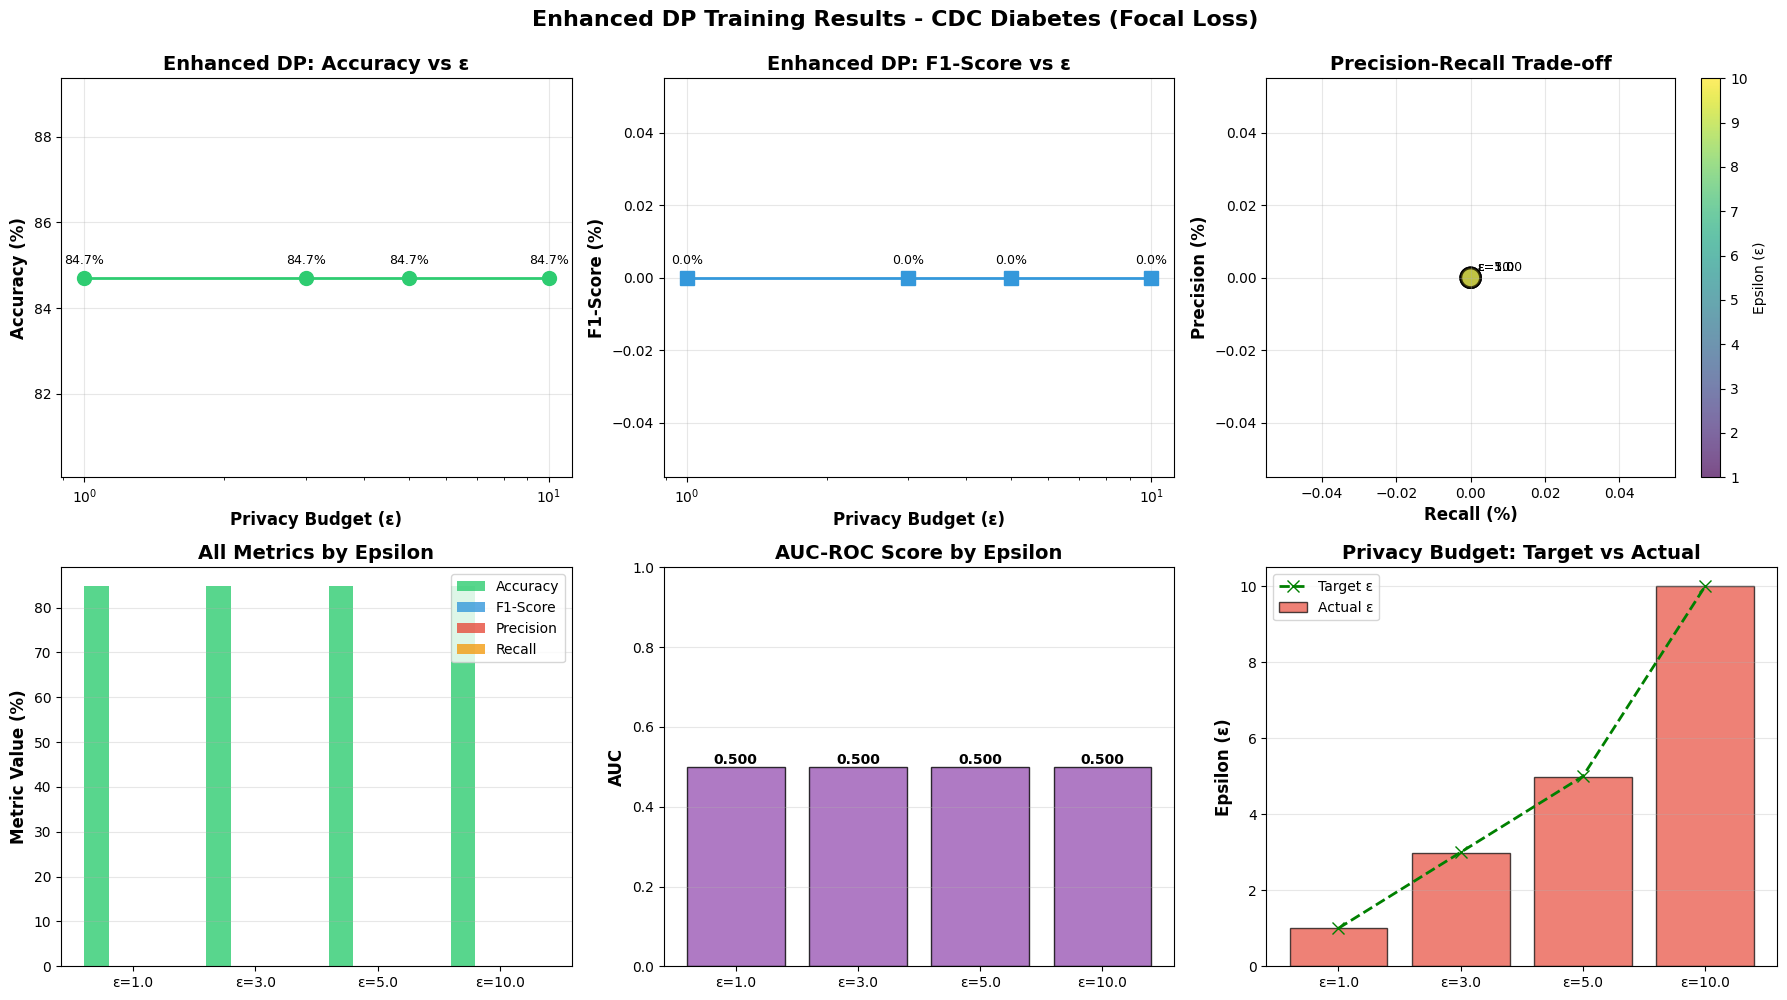

In [82]:
# Visualize Enhanced DP Results
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Accuracy vs Epsilon
ax1 = axes[0, 0]
ax1.plot(enhanced_dp_results_df['epsilon_target'], enhanced_dp_results_df['accuracy'], 
         marker='o', linewidth=2, markersize=10, color='#2ecc71')
ax1.set_xlabel('Privacy Budget (ε)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Enhanced DP: Accuracy vs ε', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')
for idx, row in enhanced_dp_results_df.iterrows():
    ax1.annotate(f"{row['accuracy']:.1f}%", 
                (row['epsilon_target'], row['accuracy']),
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# Plot 2: F1-Score vs Epsilon
ax2 = axes[0, 1]
ax2.plot(enhanced_dp_results_df['epsilon_target'], enhanced_dp_results_df['f1_score'], 
         marker='s', linewidth=2, markersize=10, color='#3498db')
ax2.set_xlabel('Privacy Budget (ε)', fontsize=12, fontweight='bold')
ax2.set_ylabel('F1-Score (%)', fontsize=12, fontweight='bold')
ax2.set_title('Enhanced DP: F1-Score vs ε', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xscale('log')
for idx, row in enhanced_dp_results_df.iterrows():
    ax2.annotate(f"{row['f1_score']:.1f}%", 
                (row['epsilon_target'], row['f1_score']),
                textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

# Plot 3: Precision vs Recall
ax3 = axes[0, 2]
ax3.scatter(enhanced_dp_results_df['recall'], enhanced_dp_results_df['precision'], 
           s=200, c=enhanced_dp_results_df['epsilon_target'], cmap='viridis', 
           alpha=0.7, edgecolors='black', linewidth=2)
for idx, row in enhanced_dp_results_df.iterrows():
    ax3.annotate(f"ε={row['epsilon_target']}", 
                (row['recall'], row['precision']),
                textcoords="offset points", xytext=(5,5), ha='left', fontsize=9)
ax3.set_xlabel('Recall (%)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Precision (%)', fontsize=12, fontweight='bold')
ax3.set_title('Precision-Recall Trade-off', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)
cbar = plt.colorbar(ax3.collections[0], ax=ax3)
cbar.set_label('Epsilon (ε)', fontsize=10)

# Plot 4: All Metrics Comparison
ax4 = axes[1, 0]
x = np.arange(len(enhanced_dp_results_df))
width = 0.2
ax4.bar(x - width*1.5, enhanced_dp_results_df['accuracy'], width, 
        label='Accuracy', alpha=0.8, color='#2ecc71')
ax4.bar(x - width*0.5, enhanced_dp_results_df['f1_score'], width, 
        label='F1-Score', alpha=0.8, color='#3498db')
ax4.bar(x + width*0.5, enhanced_dp_results_df['precision'], width, 
        label='Precision', alpha=0.8, color='#e74c3c')
ax4.bar(x + width*1.5, enhanced_dp_results_df['recall'], width, 
        label='Recall', alpha=0.8, color='#f39c12')
ax4.set_ylabel('Metric Value (%)', fontsize=12, fontweight='bold')
ax4.set_title('All Metrics by Epsilon', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels([f'ε={e}' for e in enhanced_dp_results_df['epsilon_target']])
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# Plot 5: AUC vs Epsilon
ax5 = axes[1, 1]
bars = ax5.bar(range(len(enhanced_dp_results_df)), enhanced_dp_results_df['auc'], 
               color='#9b59b6', alpha=0.8, edgecolor='black')
ax5.set_ylabel('AUC', fontsize=12, fontweight='bold')
ax5.set_title('AUC-ROC Score by Epsilon', fontsize=14, fontweight='bold')
ax5.set_xticks(range(len(enhanced_dp_results_df)))
ax5.set_xticklabels([f'ε={e}' for e in enhanced_dp_results_df['epsilon_target']])
ax5.set_ylim([0, 1.0])
ax5.grid(True, alpha=0.3, axis='y')
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# Plot 6: Privacy Budget Consumption
ax6 = axes[1, 2]
bars = ax6.bar(range(len(enhanced_dp_results_df)), enhanced_dp_results_df['epsilon_final'], 
               color='#e74c3c', alpha=0.7, edgecolor='black', label='Actual ε')
ax6.plot(range(len(enhanced_dp_results_df)), enhanced_dp_results_df['epsilon_target'], 
         color='green', linestyle='--', linewidth=2, marker='x', markersize=8, label='Target ε')
ax6.set_ylabel('Epsilon (ε)', fontsize=12, fontweight='bold')
ax6.set_title('Privacy Budget: Target vs Actual', fontsize=14, fontweight='bold')
ax6.set_xticks(range(len(enhanced_dp_results_df)))
ax6.set_xticklabels([f'ε={e}' for e in enhanced_dp_results_df['epsilon_target']])
ax6.legend()
ax6.grid(True, alpha=0.3, axis='y')

plt.suptitle('Enhanced DP Training Results - CDC Diabetes (Focal Loss)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

## Save Models for Backend Integration

Save trained models and preprocessing objects for use in the web application backend.

In [83]:
%pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [84]:
import pickle
import os
from datetime import datetime

# Create models directory if it doesn't exist
models_dir = '../backend/models'
os.makedirs(models_dir, exist_ok=True)

def save_model_for_backend(model, scaler, class_weights, dataset_name, model_type, metrics=None):
    """
    Save model with all preprocessing objects for backend use.
    
    Args:
        model: Trained PyTorch model
        scaler: StandardScaler object
        class_weights: Dictionary of class weights
        dataset_name: Name of dataset (e.g., 'diabetes', 'adult')
        model_type: Type of model (e.g., 'fnn', 'fnn_dp', 'lr', 'lr_dp')
        metrics: Optional dictionary of performance metrics
    """
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    filename = f"{dataset_name}_{model_type}_{timestamp}"
    
    # Save complete model package
    model_package = {
        'model_state_dict': model.state_dict(),
        'model_architecture': {
            'type': model_type,
            'input_size': list(model.parameters())[0].shape[1],
            'output_size': 2,
        },
        'preprocessing': {
            'scaler': scaler,
            'class_weights': class_weights,
        },
        'metadata': {
            'dataset': dataset_name,
            'trained_at': timestamp,
            'metrics': metrics or {},
        }
    }
    
    # Save PyTorch model
    model_path = os.path.join(models_dir, f"{filename}.pth")
    torch.save(model_package, model_path)
    
    print(f"✓ Saved: {model_path}")
    print(f"  - Model type: {model_type}")
    print(f"  - Dataset: {dataset_name}")
    if metrics:
        print(f"  - Accuracy: {metrics.get('accuracy', 0)*100:.2f}%")
    
    return model_path

print("="*70)
print("SAVING MODELS FOR BACKEND")
print("="*70)
print(f"\nModels will be saved to: {os.path.abspath(models_dir)}\n")

SAVING MODELS FOR BACKEND

Models will be saved to: c:\Users\almir\ai-privacy\backend\backend\models



In [85]:
# Save baseline FNN models
print("\n1. BASELINE FNN MODELS")
print("-" * 70)

if 'model_diabetes_trained' in dir():
    save_model_for_backend(
        model=model_diabetes_trained,
        scaler=scaler_diabetes,
        class_weights=class_weights_diabetes,
        dataset_name='diabetes',
        model_type='fnn_baseline',
        metrics=metrics_diabetes
    )
else:
    print("⚠️ model_diabetes_trained not found - run cell 33 first")

if 'model_adult_trained' in dir():
    save_model_for_backend(
        model=model_adult_trained,
        scaler=scaler_adult,
        class_weights=class_weights_adult,
        dataset_name='adult',
        model_type='fnn_baseline',
        metrics=metrics_adult
    )
else:
    print("⚠️ model_adult_trained not found - run cell 33 first")


1. BASELINE FNN MODELS
----------------------------------------------------------------------
✓ Saved: ../backend/models\diabetes_fnn_baseline_20251209_160956.pth
  - Model type: fnn_baseline
  - Dataset: diabetes
  - Accuracy: 71.69%
✓ Saved: ../backend/models\adult_fnn_baseline_20251209_160956.pth
  - Model type: fnn_baseline
  - Dataset: adult
  - Accuracy: 79.68%


In [86]:
# Save DP-FNN models (if available)
print("\n2. DIFFERENTIAL PRIVACY FNN MODELS")
print("-" * 70)

if 'dp_models_diabetes' in dir():
    for epsilon, model in dp_models_diabetes.items():
        eps_val = epsilon.replace('epsilon_', '')
        save_model_for_backend(
            model=model,
            scaler=scaler_diabetes,
            class_weights=class_weights_diabetes,
            dataset_name='diabetes',
            model_type=f'fnn_dp_eps{eps_val}',
            metrics={'epsilon': float(eps_val)}
        )
else:
    print("⚠️ dp_models_diabetes not found - run cell 50 first to train DP models")

if 'dp_models_adult' in dir():
    for epsilon, model in dp_models_adult.items():
        eps_val = epsilon.replace('epsilon_', '')
        save_model_for_backend(
            model=model,
            scaler=scaler_adult,
            class_weights=class_weights_adult,
            dataset_name='adult',
            model_type=f'fnn_dp_eps{eps_val}',
            metrics={'epsilon': float(eps_val)}
        )
else:
    print("⚠️ dp_models_adult not found - run cell 51 first to train DP models")


2. DIFFERENTIAL PRIVACY FNN MODELS
----------------------------------------------------------------------
✓ Saved: ../backend/models\diabetes_fnn_dp_eps0.5_20251209_160956.pth
  - Model type: fnn_dp_eps0.5
  - Dataset: diabetes
  - Accuracy: 0.00%
✓ Saved: ../backend/models\diabetes_fnn_dp_eps1.0_20251209_160956.pth
  - Model type: fnn_dp_eps1.0
  - Dataset: diabetes
  - Accuracy: 0.00%
✓ Saved: ../backend/models\diabetes_fnn_dp_eps3.0_20251209_160956.pth
  - Model type: fnn_dp_eps3.0
  - Dataset: diabetes
  - Accuracy: 0.00%
✓ Saved: ../backend/models\diabetes_fnn_dp_eps10.0_20251209_160956.pth
  - Model type: fnn_dp_eps10.0
  - Dataset: diabetes
  - Accuracy: 0.00%
✓ Saved: ../backend/models\adult_fnn_dp_eps0.5_20251209_160956.pth
  - Model type: fnn_dp_eps0.5
  - Dataset: adult
  - Accuracy: 0.00%
✓ Saved: ../backend/models\adult_fnn_dp_eps1.0_20251209_160956.pth
  - Model type: fnn_dp_eps1.0
  - Dataset: adult
  - Accuracy: 0.00%
✓ Saved: ../backend/models\adult_fnn_dp_eps3.0_2025

In [87]:
# Save DP-Logistic Regression models (if available)
print("\n3. DIFFERENTIAL PRIVACY LOGISTIC REGRESSION MODELS")
print("-" * 70)

if 'dp_lr_models_diabetes' in dir():
    for epsilon, model in dp_lr_models_diabetes.items():
        eps_val = epsilon.replace('epsilon_', '')
        save_model_for_backend(
            model=model,
            scaler=scaler_diabetes,
            class_weights=class_weights_diabetes,
            dataset_name='diabetes',
            model_type=f'lr_dp_eps{eps_val}',
            metrics={'epsilon': float(eps_val)}
        )
else:
    print("⚠️ dp_lr_models_diabetes not found - run cell 55 first to train DP-LR models")

if 'dp_lr_models_adult' in dir():
    for epsilon, model in dp_lr_models_adult.items():
        eps_val = epsilon.replace('epsilon_', '')
        save_model_for_backend(
            model=model,
            scaler=scaler_adult,
            class_weights=class_weights_adult,
            dataset_name='adult',
            model_type=f'lr_dp_eps{eps_val}',
            metrics={'epsilon': float(eps_val)}
        )
else:
    print("⚠️ dp_lr_models_adult not found - run cell 56 first to train DP-LR models")

print("\n" + "="*70)
print("✓ MODEL SAVING COMPLETE")
print("="*70)
print(f"\nAll models saved to: {os.path.abspath(models_dir)}")
print("\nTo use in backend, load with:")
print("  checkpoint = torch.load('path/to/model.pth')")
print("  model.load_state_dict(checkpoint['model_state_dict'])")
print("  scaler = checkpoint['preprocessing']['scaler']")
print("  class_weights = checkpoint['preprocessing']['class_weights']")


3. DIFFERENTIAL PRIVACY LOGISTIC REGRESSION MODELS
----------------------------------------------------------------------
✓ Saved: ../backend/models\diabetes_lr_dp_eps0.5_20251209_160956.pth
  - Model type: lr_dp_eps0.5
  - Dataset: diabetes
  - Accuracy: 0.00%
✓ Saved: ../backend/models\diabetes_lr_dp_eps1.0_20251209_160956.pth
  - Model type: lr_dp_eps1.0
  - Dataset: diabetes
  - Accuracy: 0.00%
✓ Saved: ../backend/models\diabetes_lr_dp_eps3.0_20251209_160956.pth
  - Model type: lr_dp_eps3.0
  - Dataset: diabetes
  - Accuracy: 0.00%
✓ Saved: ../backend/models\diabetes_lr_dp_eps10.0_20251209_160956.pth
  - Model type: lr_dp_eps10.0
  - Dataset: diabetes
  - Accuracy: 0.00%
✓ Saved: ../backend/models\adult_lr_dp_eps0.5_20251209_160956.pth
  - Model type: lr_dp_eps0.5
  - Dataset: adult
  - Accuracy: 0.00%
✓ Saved: ../backend/models\adult_lr_dp_eps1.0_20251209_160956.pth
  - Model type: lr_dp_eps1.0
  - Dataset: adult
  - Accuracy: 0.00%
✓ Saved: ../backend/models\adult_lr_dp_eps3.0_2

In [88]:
# See all variables
print(dir())

# Or get all global variables (cleaner list)
[var for var in dir() if not var.startswith('_')]

['BatchMemoryManager', 'DataLoader', 'FeedforwardNN', 'FeedforwardNN_DP', 'FocalLoss', 'In', 'LabelEncoder', 'LogisticRegression_DP', 'ModuleValidator', 'Out', 'PrivacyEngine', 'RDPAccountant', 'StandardScaler', 'TensorDataset', 'X_ad', 'X_adult', 'X_adult_encoded', 'X_db', 'X_diabetes', 'X_diabetes_encoded', 'X_test_adult', 'X_test_adult_scaled', 'X_test_diabetes', 'X_test_diabetes_scaled', 'X_train_adult', 'X_train_adult_scaled', 'X_train_diabetes', 'X_train_diabetes_scaled', 'X_val_adult', 'X_val_adult_scaled', 'X_val_diabetes', 'X_val_diabetes_scaled', '_', '_10', '_15', '_16', '_7', '_8', '_9', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '__vsc_ipynb_file__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36',

['BatchMemoryManager',
 'DataLoader',
 'FeedforwardNN',
 'FeedforwardNN_DP',
 'FocalLoss',
 'In',
 'LabelEncoder',
 'LogisticRegression_DP',
 'ModuleValidator',
 'Out',
 'PrivacyEngine',
 'RDPAccountant',
 'StandardScaler',
 'TensorDataset',
 'X_ad',
 'X_adult',
 'X_adult_encoded',
 'X_db',
 'X_diabetes',
 'X_diabetes_encoded',
 'X_test_adult',
 'X_test_adult_scaled',
 'X_test_diabetes',
 'X_test_diabetes_scaled',
 'X_train_adult',
 'X_train_adult_scaled',
 'X_train_diabetes',
 'X_train_diabetes_scaled',
 'X_val_adult',
 'X_val_adult_scaled',
 'X_val_diabetes',
 'X_val_diabetes_scaled',
 'accuracy',
 'accuracy_score',
 'adult',
 'adult_inspected',
 'adult_preprocessed',
 'auc',
 'auc_adult',
 'auc_diabetes',
 'auc_score',
 'ax1',
 'ax2',
 'ax3',
 'ax4',
 'ax5',
 'ax6',
 'axes',
 'bar',
 'bars',
 'best_epsilon',
 'c',
 'calculate_class_weights',
 'calculate_metrics',
 'cbar',
 'cdc_diabetes_health_indicators',
 'class_weight',
 'class_weights_adult',
 'class_weights_diabetes',
 'classif

In [89]:
# See only specific types
%whos DataFrame  # Only pandas DataFrames
%whos ndarray    # Only numpy arrays
%whos dict       # Only dictionaries

Variable                     Type         Data/Info
---------------------------------------------------
X_ad                         DataFrame    Shape: (48842, 14)
X_adult                      DataFrame    Shape: (48813, 14)
X_adult_encoded              DataFrame    Shape: (48813, 14)
X_db                         DataFrame    Shape: (253680, 21)
X_diabetes                   DataFrame    Shape: (229474, 21)
X_diabetes_encoded           DataFrame    Shape: (229474, 21)
X_test_adult                 DataFrame    Shape: (9763, 14)
X_test_diabetes              DataFrame    Shape: (45895, 21)
X_train_adult                DataFrame    Shape: (34168, 14)
X_train_diabetes             DataFrame    Shape: (160631, 21)
X_val_adult                  DataFrame    Shape: (4882, 14)
X_val_diabetes               DataFrame    Shape: (22948, 21)
adult_inspected              DataFrame    Shape: (48813, 15)
comparison_adult             DataFrame    Shape: (3, 7)
comparison_diabetes          DataFrame    Sha

In [90]:
# Check if variables were created
print("Variables created by cell 33:")
print(f"  device: {'✓' if 'device' in dir() else '✗'}")
print(f"  model_diabetes_trained: {'✓' if 'model_diabetes_trained' in dir() else '✗'}")
print(f"  history_diabetes: {'✓' if 'history_diabetes' in dir() else '✗'}")
print(f"  model_adult_trained: {'✓' if 'model_adult_trained' in dir() else '✗'}")
print(f"  history_adult: {'✓' if 'history_adult' in dir() else '✗'}")

# View history structure
if 'history_diabetes' in dir():
    print(f"\nhistory_diabetes keys: {list(history_diabetes.keys())}")
    print(f"Training epochs completed: {len(history_diabetes['train_loss'])}")

Variables created by cell 33:
  device: ✓
  model_diabetes_trained: ✓
  history_diabetes: ✓
  model_adult_trained: ✓
  history_adult: ✓

history_diabetes keys: ['train_loss', 'val_loss', 'train_acc', 'val_acc']
Training epochs completed: 50


In [91]:
# Check if a variable exists
'model_diabetes_trained' in dir()

# Get variable type
type(model_diabetes_trained)

__main__.FeedforwardNN

## Save Test Data for Backend API

Save preprocessed test data, scalers, and feature names for the FastAPI backend to use for model evaluation.

In [92]:
import numpy as np
import pickle
import os

# Create data directory for backend
data_dir = '../data'
os.makedirs(data_dir, exist_ok=True)

print("="*70)
print("SAVING TEST DATA FOR BACKEND API")
print("="*70)

# Save Diabetes test data
print("\n📊 Saving Diabetes Dataset...")
try:
    # Save scaled test features
    np.save(os.path.join(data_dir, 'diabetes_X_test.npy'), X_test_diabetes_scaled)
    print(f"   ✓ Saved X_test: {X_test_diabetes_scaled.shape}")
    
    # Save test labels
    y_test_diabetes_vals = y_test_diabetes.values if hasattr(y_test_diabetes, 'values') else y_test_diabetes
    np.save(os.path.join(data_dir, 'diabetes_y_test.npy'), y_test_diabetes_vals.astype(np.int64))
    print(f"   ✓ Saved y_test: {len(y_test_diabetes_vals)} samples")
    
    # Save scaler
    with open(os.path.join(data_dir, 'diabetes_scaler.pkl'), 'wb') as f:
        pickle.dump(scaler_diabetes, f)
    print(f"   ✓ Saved scaler")
    
    # Save feature names
    feature_names_diabetes = list(X_diabetes_encoded.columns) if hasattr(X_diabetes_encoded, 'columns') else [f'feature_{i}' for i in range(21)]
    with open(os.path.join(data_dir, 'diabetes_features.pkl'), 'wb') as f:
        pickle.dump(feature_names_diabetes, f)
    print(f"   ✓ Saved feature names: {len(feature_names_diabetes)} features")
    
except Exception as e:
    print(f"   ✗ Error saving diabetes data: {e}")

# Save Adult test data
print("\n📊 Saving Adult Income Dataset...")
try:
    # Save scaled test features
    np.save(os.path.join(data_dir, 'adult_X_test.npy'), X_test_adult_scaled)
    print(f"   ✓ Saved X_test: {X_test_adult_scaled.shape}")
    
    # Save test labels
    y_test_adult_vals = y_test_adult.values if hasattr(y_test_adult, 'values') else y_test_adult
    np.save(os.path.join(data_dir, 'adult_y_test.npy'), y_test_adult_vals.astype(np.int64))
    print(f"   ✓ Saved y_test: {len(y_test_adult_vals)} samples")
    
    # Save scaler
    with open(os.path.join(data_dir, 'adult_scaler.pkl'), 'wb') as f:
        pickle.dump(scaler_adult, f)
    print(f"   ✓ Saved scaler")
    
    # Save feature names
    feature_names_adult = list(X_adult_encoded.columns) if hasattr(X_adult_encoded, 'columns') else [f'feature_{i}' for i in range(14)]
    with open(os.path.join(data_dir, 'adult_features.pkl'), 'wb') as f:
        pickle.dump(feature_names_adult, f)
    print(f"   ✓ Saved feature names: {len(feature_names_adult)} features")
    
except Exception as e:
    print(f"   ✗ Error saving adult data: {e}")

print("\n" + "="*70)
print("✅ TEST DATA SAVED SUCCESSFULLY")
print("="*70)
print(f"\nFiles saved to: {os.path.abspath(data_dir)}")
print("\nTo use with backend:")
print("  1. Start backend: cd backend && uvicorn main:app --reload --port 8000")
print("  2. Start frontend: cd frontend && npm run dev")
print("  3. Access at: http://localhost:5173")

SAVING TEST DATA FOR BACKEND API

📊 Saving Diabetes Dataset...
   ✓ Saved X_test: (45895, 21)
   ✓ Saved y_test: 45895 samples
   ✓ Saved scaler
   ✓ Saved feature names: 21 features

📊 Saving Adult Income Dataset...
   ✓ Saved X_test: (9763, 14)
   ✓ Saved y_test: 9763 samples
   ✓ Saved scaler
   ✓ Saved feature names: 14 features

✅ TEST DATA SAVED SUCCESSFULLY

Files saved to: c:\Users\almir\ai-privacy\backend\data

To use with backend:
  1. Start backend: cd backend && uvicorn main:app --reload --port 8000
  2. Start frontend: cd frontend && npm run dev
  3. Access at: http://localhost:5173


# 🔧 FIX: Retrain DP Models with Proper Settings

The current DP models collapsed to predicting only one class. This fixes the training with:
1. **Class weights** to handle imbalance (84% class 0, 16% class 1)
2. **More epochs** (100 instead of 20-30)
3. **Lower max_grad_norm** (0.5 instead of 1.0) for more stable training
4. **Monitoring** to catch collapsed models early

In [93]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from opacus import PrivacyEngine
import numpy as np
from datetime import datetime
import os

# Check if class weights already calculated, if not calculate them
if 'class_weights_diabetes' not in locals():
    unique, counts = np.unique(y_train_diabetes, return_counts=True)
    class_counts = dict(zip(unique, counts))
    total = sum(class_counts.values())
    class_weights_diabetes = {
        0: total / (2 * class_counts[0]),  # Weight for majority class
        1: total / (2 * class_counts[1])   # Weight for minority class
    }
else:
    # Use existing class weights
    unique, counts = np.unique(y_train_diabetes, return_counts=True)
    class_counts = dict(zip(unique, counts))
    total = sum(class_counts.values())

print("="*70)
print("🔧 RETRAINING DP MODELS WITH PROPER SETTINGS")
print("="*70)
print(f"\nClass Distribution (Diabetes):")
print(f"  Class 0: {class_counts[0]:,} samples ({class_counts[0]/total*100:.1f}%)")
print(f"  Class 1: {class_counts[1]:,} samples ({class_counts[1]/total*100:.1f}%)")
print(f"\nClass Weights:")
print(f"  Class 0: {class_weights_diabetes[0]:.3f}")
print(f"  Class 1: {class_weights_diabetes[1]:.3f}")
print("="*70)

🔧 RETRAINING DP MODELS WITH PROPER SETTINGS

Class Distribution (Diabetes):
  Class 0: 136,063 samples (84.7%)
  Class 1: 24,568 samples (15.3%)

Class Weights:
  Class 0: 0.590
  Class 1: 3.269


In [94]:
# EXTREME BALANCING: Oversample minority class in training data
from torch.utils.data import WeightedRandomSampler

def train_dp_model_extreme(model, X_train, y_train, val_loader, target_epsilon, 
                          delta=1e-5, epochs=100, batch_size=64, learning_rate=0.02,
                          max_grad_norm=1.5, device='cpu'):
    """
    Train DP model with EXTREME balancing via oversampling
    """
    model = model.to(device)
    
    # Calculate sample weights for balanced sampling
    unique, counts = np.unique(y_train, return_counts=True)
    class_sample_count = dict(zip(unique, counts))
    weight = 1. / torch.tensor([class_sample_count[c] for c in range(2)], dtype=torch.float)
    samples_weight = torch.tensor([weight[t] for t in y_train])
    
    # Create weighted sampler - this oversamples minority class
    sampler = WeightedRandomSampler(
        weights=samples_weight,
        num_samples=len(samples_weight),
        replacement=True
    )
    
    # Create balanced train loader
    train_dataset = TensorDataset(
        torch.FloatTensor(X_train),
        torch.LongTensor(y_train)
    )
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        sampler=sampler,
        drop_last=True
    )
    
    print(f"\n🔄 EXTREME BALANCING MODE:")
    print(f"  Original class distribution: {dict(zip(*np.unique(y_train, return_counts=True)))}")
    print(f"  Sample weights: {weight.tolist()}")
    print(f"  Using WeightedRandomSampler for balanced batches")
    
    # Use focal loss for hard examples
    class FocalLoss(nn.Module):
        def __init__(self, alpha=0.25, gamma=2.0):
            super().__init__()
            self.alpha = alpha
            self.gamma = gamma
            
        def forward(self, inputs, targets):
            ce_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
            pt = torch.exp(-ce_loss)
            focal_loss = self.alpha * (1-pt)**self.gamma * ce_loss
            return focal_loss.mean()
    
    criterion = FocalLoss(alpha=0.25, gamma=2.0)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.95, nesterov=True)
    
    # Make model private
    privacy_engine = PrivacyEngine()
    model, optimizer, train_loader = privacy_engine.make_private_with_epsilon(
        module=model,
        optimizer=optimizer,
        data_loader=train_loader,
        epochs=epochs,
        target_epsilon=target_epsilon,
        target_delta=delta,
        max_grad_norm=max_grad_norm,
    )
    
    print(f"\n🔒 DP-SGD Training (EXTREME MODE)")
    print(f"  Target ε: {target_epsilon}")
    print(f"  Focal Loss (α=0.25, γ=2.0)")
    print(f"  SGD: lr={learning_rate}, momentum=0.95, nesterov=True")
    print(f"  Max grad norm: {max_grad_norm}")
    print(f"  Noise multiplier: {optimizer.noise_multiplier:.4f}")
    
    best_val_acc = 0
    best_model_state = None
    best_diversity = 0
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0
        predictions_train = []
        
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            train_total += batch_y.size(0)
            train_correct += (predicted == batch_y).sum().item()
            predictions_train.extend(predicted.cpu().numpy())
        
        unique_preds = np.unique(predictions_train)
        train_acc = 100 * train_correct / train_total
        
        # Validation
        model.eval()
        val_correct = 0
        val_total = 0
        predictions_val = []
        
        with torch.no_grad():
            for batch_X, batch_y in val_loader:
                batch_X, batch_y = batch_X.to(device), batch_y.to(device)
                outputs = model(batch_X)
                _, predicted = torch.max(outputs, 1)
                val_total += batch_y.size(0)
                val_correct += (predicted == batch_y).sum().item()
                predictions_val.extend(predicted.cpu().numpy())
        
        val_acc = 100 * val_correct / val_total
        unique_val_preds = np.unique(predictions_val)
        
        # Save best model that predicts BOTH classes
        if len(unique_val_preds) > 1:
            if len(unique_val_preds) > best_diversity or (len(unique_val_preds) == best_diversity and val_acc > best_val_acc):
                best_val_acc = val_acc
                best_model_state = model.state_dict().copy()
                best_diversity = len(unique_val_preds)
        
        epsilon = privacy_engine.get_epsilon(delta)
        
        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1:3d}/{epochs}] "
                  f"Train: {train_acc:.2f}% ({len(unique_preds)} classes) | "
                  f"Val: {val_acc:.2f}% ({len(unique_val_preds)} classes) | "
                  f"ε: {epsilon:.2f}")
            
            if len(unique_val_preds) < 2:
                print(f"  ⚠️  WARNING: Model predicting only {unique_val_preds} class(es)!")
            else:
                print(f"  ✅ SUCCESS: Predicting classes {unique_val_preds.tolist()}!")
        
        if epsilon > target_epsilon * 1.1:
            print(f"\n⚠️  Privacy budget exceeded at epoch {epoch+1}")
            break
    
    final_epsilon = privacy_engine.get_epsilon(delta)
    
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        print(f"\n✅ Restored best model (val_acc={best_val_acc:.2f}%, predicting {best_diversity} classes)")
    else:
        print(f"\n❌ WARNING: No model found that predicts both classes!")
    
    print(f"✓ Training complete! Final ε: {final_epsilon:.4f}")
    
    return model, final_epsilon

print("✅ EXTREME balancing training function defined (oversampling + focal loss)")

✅ EXTREME balancing training function defined (oversampling + focal loss)
